In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df_clean = pd.read_csv('D:\\Springboard\\Technical Project\\7_Capstone Two\\data\\clean_data.csv', index_col=0, parse_dates=['date'])
df_clean.head()

sequence_name tag_position                    date activity   x_coord  \
9            A01   Ankle_Left 2009-05-27 14:03:25.453  walking  4.016991   
13           A01   Ankle_Left 2009-05-27 14:03:25.560  walking  3.828994   
15           A01   Ankle_Left 2009-05-27 14:03:25.670  walking  3.812251   
19           A01   Ankle_Left 2009-05-27 14:03:25.777  walking  3.933596   
21           A01   Ankle_Left 2009-05-27 14:03:25.883  walking  3.960349   

          vx   y_coord        vy   z_coord        vz  
9   0.531769  1.734065  0.277292  0.193167 -2.889769  
13 -0.999414  1.996723  1.734022  0.162716 -1.146888  
15 -0.454163  2.071353  1.089579  0.020249 -1.356480  
19  0.169504  2.020375  0.486483  0.225701 -0.085057  
21  0.135383  2.024298  0.403346  0.298244  0.036066

In [3]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161214 entries, 9 to 164857
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   sequence_name  161214 non-null  object        
 1   tag_position   161214 non-null  object        
 2   date           161214 non-null  datetime64[ns]
 3   activity       161214 non-null  object        
 4   x_coord        161214 non-null  float64       
 5   vx             161214 non-null  float64       
 6   y_coord        161214 non-null  float64       
 7   vy             161214 non-null  float64       
 8   z_coord        161214 non-null  float64       
 9   vz             161214 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 13.5+ MB


In [4]:
def resamp(df, tag, freq='S'):
    df1 = df.resample(freq).mean()
    df1['activity'] = df.resample(freq)['activity'].describe()['top']
    df1.rename(columns={'x_coord':'x_'+tag, 'y_coord':'y_'+tag, 'z_coord':'z_'+tag, 'vx':'vx_'+tag, 'vy':'vy_'+tag, 'vz':'vz_'+tag, 'activity':'activity_'+tag}, inplace=True)
    return df1

In [5]:
df = pd.DataFrame()
for i in df_clean.sequence_name.unique():
    df_temp2 = pd.DataFrame()
    for j in df_clean.tag_position.unique():
        df_temp1 = resamp(df_clean[(df_clean['sequence_name']==i)&(df_clean['tag_position']==j)].set_index('date'), j)
        df_temp2 = pd.concat([df_temp2, df_temp1], axis=1)
    df_temp2['sequence_name']=i
    df = df.append(df_temp2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5478 entries, 2009-05-27 14:03:25 to 2009-05-27 11:50:42
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   x_Ankle_Left          5444 non-null   float64
 1   vx_Ankle_Left         5444 non-null   float64
 2   y_Ankle_Left          5444 non-null   float64
 3   vy_Ankle_Left         5444 non-null   float64
 4   z_Ankle_Left          5444 non-null   float64
 5   vz_Ankle_Left         5444 non-null   float64
 6   activity_Ankle_Left   5444 non-null   object 
 7   x_Ankle_Right         5453 non-null   float64
 8   vx_Ankle_Right        5453 non-null   float64
 9   y_Ankle_Right         5453 non-null   float64
 10  vy_Ankle_Right        5453 non-null   float64
 11  z_Ankle_Right         5453 non-null   float64
 12  vz_Ankle_Right        5453 non-null   float64
 13  activity_Ankle_Right  5453 non-null   object 
 14  x_Belt                5431 non-null 

In [7]:
df.loc[df.isnull().any(axis=1), :]

x_Ankle_Left  vx_Ankle_Left  y_Ankle_Left  vy_Ankle_Left  \
date                                                                            
2009-05-27 14:03:42      3.271199      -0.009923      1.894754       0.009055   
2009-05-27 14:03:43      3.222656      -0.020925      1.903674       0.009495   
2009-05-27 14:03:44      3.181914      -0.024764      1.967666       0.021435   
2009-05-27 14:03:45      3.190349      -0.015552      1.932634       0.005734   
2009-05-27 14:06:37           NaN            NaN           NaN            NaN   
...                           ...            ...           ...            ...   
2009-05-27 11:36:05      4.235549       0.092261      1.770460       0.032843   
2009-05-27 11:46:24      2.291314      -0.217530      1.759371      -0.036299   
2009-05-27 11:47:32           NaN            NaN           NaN            NaN   
2009-05-27 11:48:32      3.033281      -0.085758      1.967206       0.003288   
2009-05-27 11:50:42      2.828719       0.240960      1.941431       0.093132   

                     z_Ankle_Left  vz_Ankle_Left       activity_Ankle_Left  \
date                                                                         
2009-05-27 14:03:42      0.086879       0.015664                   sitting   
2009-05-27 14:03:43      0.054330       0.000666                   sitting   
2009-05-27 14:03:44     -0.071298      -0.034368                   sitting   
2009-05-27 14:03:45     -0.030141      -0.010317  standing up from sitting   
2009-05-27 14:06:37           NaN            NaN                       NaN   
...                           ...            ...                       ...   
2009-05-27 11:36:05      0.493547       0.069547                     lying   
2009-05-27 11:46:24      0.036099       0.013196                   walking   
2009-05-27 11:47:32           NaN            NaN                       NaN   
2009-05-27 11:48:32     -0.001690       0.006367                   walking   
2009-05-27 11:50:42      0.269345       0.053840                   walking   

                     x_Ankle_Right  vx_Ankle_Right  y_Ankle_Right  ...  \
date                                                               ...   
2009-05-27 14:03:42            NaN             NaN            NaN  ...   
2009-05-27 14:03:43            NaN             NaN            NaN  ...   
2009-05-27 14:03:44            NaN             NaN            NaN  ...   
2009-05-27 14:03:45            NaN             NaN            NaN  ...   
2009-05-27 14:06:37       2.602435        0.100719       1.710469  ...   
...                            ...             ...            ...  ...   
2009-05-27 11:36:05            NaN             NaN            NaN  ...   
2009-05-27 11:46:24       2.426020       -0.154782       1.850845  ...   
2009-05-27 11:47:32       2.434980       -0.034640       1.997761  ...   
2009-05-27 11:48:32            NaN             NaN            NaN  ...   
2009-05-27 11:50:42       2.635305        0.257407       1.851862  ...   

                      vz_Belt             activity_Belt   x_Chest  vx_Chest  \
date                                                                          
2009-05-27 14:03:42 -0.012238                   sitting  2.926695  0.016932   
2009-05-27 14:03:43 -0.010848                   sitting  2.936983  0.014948   
2009-05-27 14:03:44 -0.009587                   sitting  2.931808  0.009272   
2009-05-27 14:03:45 -0.014219  standing up from sitting  2.994932  0.027390   
2009-05-27 14:06:37       NaN                       NaN  2.974372  0.271603   
...                       ...                       ...       ...       ...   
2009-05-27 11:36:05  0.000925                     lying  2.981680  0.036626   
2009-05-27 11:46:24  0.042904                   walking       NaN       NaN   
2009-05-27 11:47:32 -0.144952                     lying  1.218840  0.008756   
2009-05-27 11:48:32  0.010965                   walking  2.921220 -0.068273   
2009-05-27 11:50:42       NaN            

In [8]:
df.dropna(inplace=True)

In [9]:
df.loc[df.isnull().any(axis=1), :]

Empty DataFrame
Columns: [x_Ankle_Left, vx_Ankle_Left, y_Ankle_Left, vy_Ankle_Left, z_Ankle_Left, vz_Ankle_Left, activity_Ankle_Left, x_Ankle_Right, vx_Ankle_Right, y_Ankle_Right, vy_Ankle_Right, z_Ankle_Right, vz_Ankle_Right, activity_Ankle_Right, x_Belt, vx_Belt, y_Belt, vy_Belt, z_Belt, vz_Belt, activity_Belt, x_Chest, vx_Chest, y_Chest, vy_Chest, z_Chest, vz_Chest, activity_Chest, sequence_name]
Index: []

[0 rows x 29 columns]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5328 entries, 2009-05-27 14:03:25 to 2009-05-27 11:50:41
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   x_Ankle_Left          5328 non-null   float64
 1   vx_Ankle_Left         5328 non-null   float64
 2   y_Ankle_Left          5328 non-null   float64
 3   vy_Ankle_Left         5328 non-null   float64
 4   z_Ankle_Left          5328 non-null   float64
 5   vz_Ankle_Left         5328 non-null   float64
 6   activity_Ankle_Left   5328 non-null   object 
 7   x_Ankle_Right         5328 non-null   float64
 8   vx_Ankle_Right        5328 non-null   float64
 9   y_Ankle_Right         5328 non-null   float64
 10  vy_Ankle_Right        5328 non-null   float64
 11  z_Ankle_Right         5328 non-null   float64
 12  vz_Ankle_Right        5328 non-null   float64
 13  activity_Ankle_Right  5328 non-null   object 
 14  x_Belt                5328 non-null 

In [11]:
mask = (df['activity_Ankle_Left']==df['activity_Ankle_Right'])&(df['activity_Ankle_Right']==df['activity_Belt'])&(df['activity_Belt']==df['activity_Chest'])

In [12]:
df[~mask]

x_Ankle_Left  vx_Ankle_Left  y_Ankle_Left  vy_Ankle_Left  \
date                                                                            
2009-05-27 14:04:40      2.928269       0.209034      1.250884      -0.134942   
2009-05-27 14:05:06      2.884028      -0.095585      1.616716      -0.067132   
2009-05-27 14:06:12      2.081559      -0.112897      2.105321      -0.086380   
2009-05-27 14:10:51      2.922216       0.046935      1.474402       0.013670   
2009-05-27 14:11:17      2.339730      -0.068217      2.062429       0.114557   
...                           ...            ...           ...            ...   
2009-05-27 11:36:13      4.157085      -0.004565      1.776658       0.000723   
2009-05-27 11:46:34      3.011771       0.268528      1.395594       0.017786   
2009-05-27 11:47:43      2.038963      -0.006621      1.878675       0.018339   
2009-05-27 11:48:27      3.453987      -0.030324      1.843042       0.033922   
2009-05-27 11:50:02      1.942788      -0.091640      1.788210      -0.010624   

                     z_Ankle_Left  vz_Ankle_Left     activity_Ankle_Left  \
date                                                                       
2009-05-27 14:04:40      0.205062      -0.012509                 falling   
2009-05-27 14:05:06     -0.029270      -0.031304                 sitting   
2009-05-27 14:06:12      0.255809      -0.033988                 walking   
2009-05-27 14:10:51      0.254127       0.008839                   lying   
2009-05-27 14:11:17      0.409469       0.067843              lying down   
...                           ...            ...                     ...   
2009-05-27 11:36:13      0.516118      -0.003499  standing up from lying   
2009-05-27 11:46:34      0.378616       0.078294                 falling   
2009-05-27 11:47:43      0.115311      -0.023344                 walking   
2009-05-27 11:48:27     -0.118320      -0.047227                 walking   
2009-05-27 11:50:02      0.173899      -0.004608  standing up from lying   

                     x_Ankle_Right  vx_Ankle_Right  y_Ankle_Right  ...  \
date                                                               ...   
2009-05-27 14:04:40       3.145773        0.255677       1.133457  ...   
2009-05-27 14:05:06       3.084815       -0.026294       1.653455  ...   
2009-05-27 14:06:12       2.449987       -0.010021       2.598923  ...   
2009-05-27 14:10:51       3.089859        0.104216       1.306937  ...   
2009-05-27 14:11:17       1.938719       -0.186030       1.925527  ...   
...                            ...             ...            ...  ...   
2009-05-27 11:36:13       4.076218        0.003925       2.123334  ...   
2009-05-27 11:46:34       3.136456        0.328789       1.195093  ...   
2009-05-27 11:47:43       1.937209       -0.007058       1.803713  ...   
2009-05-27 11:48:27       3.595260       -0.104757       1.952451  ...   
2009-05-27 11:50:02       1.860931       -0.078294       1.927488  ...   

                      vz_Belt           activity_Belt   x_Chest  vx_Chest  \
date                                                                        
2009-05-27 14:04:40  0.079508                 walking  3.372377  0.357266   
2009-05-27 14:05:06  0.005456                 sitting  2.799574 -0.106875   
2009-05-27 14:06:12  0.259626  standing up from lying  1.928998  0.166190   
2009-05-27 14:10:51 -0.062656                 falling  3.712613  0.294793   
2009-05-27 14:11:17 -0.081788                   lying  0.985026 -0.369885   
...                       ...                     ...       ...       ...   
2009-05-27 11:36:13  0.004178  standing up from lying  2.785283  0.048649   
2009-05-27 11:46:34 -0.055947                 falling  3.840232  0.481402   
2009-05-27 11:47:43  0.079152                 walking  2.110255  0.066053   
2009-05-27 11:48:27  0.078895                 walking  3.133677  0.067986   
2009-05-27 11:50:02  0.117370                 walking  2.136936  0.047867   

             

In [13]:
df.drop(index=df[~mask].index, inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5219 entries, 2009-05-27 14:03:25 to 2009-05-27 11:50:41
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   x_Ankle_Left          5219 non-null   float64
 1   vx_Ankle_Left         5219 non-null   float64
 2   y_Ankle_Left          5219 non-null   float64
 3   vy_Ankle_Left         5219 non-null   float64
 4   z_Ankle_Left          5219 non-null   float64
 5   vz_Ankle_Left         5219 non-null   float64
 6   activity_Ankle_Left   5219 non-null   object 
 7   x_Ankle_Right         5219 non-null   float64
 8   vx_Ankle_Right        5219 non-null   float64
 9   y_Ankle_Right         5219 non-null   float64
 10  vy_Ankle_Right        5219 non-null   float64
 11  z_Ankle_Right         5219 non-null   float64
 12  vz_Ankle_Right        5219 non-null   float64
 13  activity_Ankle_Right  5219 non-null   object 
 14  x_Belt                5219 non-null 

In [15]:
df.drop(columns=['activity_Ankle_Left', 'activity_Ankle_Right', 'activity_Belt'], inplace=True)

In [16]:
df.rename(columns={'activity_Chest':'activity'}, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5219 entries, 2009-05-27 14:03:25 to 2009-05-27 11:50:41
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   x_Ankle_Left    5219 non-null   float64
 1   vx_Ankle_Left   5219 non-null   float64
 2   y_Ankle_Left    5219 non-null   float64
 3   vy_Ankle_Left   5219 non-null   float64
 4   z_Ankle_Left    5219 non-null   float64
 5   vz_Ankle_Left   5219 non-null   float64
 6   x_Ankle_Right   5219 non-null   float64
 7   vx_Ankle_Right  5219 non-null   float64
 8   y_Ankle_Right   5219 non-null   float64
 9   vy_Ankle_Right  5219 non-null   float64
 10  z_Ankle_Right   5219 non-null   float64
 11  vz_Ankle_Right  5219 non-null   float64
 12  x_Belt          5219 non-null   float64
 13  vx_Belt         5219 non-null   float64
 14  y_Belt          5219 non-null   float64
 15  vy_Belt         5219 non-null   float64
 16  z_Belt          5219 non-null   float64
 1

In [18]:
df.head()

x_Ankle_Left  vx_Ankle_Left  y_Ankle_Left  vy_Ankle_Left  \
date                                                                            
2009-05-27 14:03:25      3.922608      -0.081295      1.976652       0.714780   
2009-05-27 14:03:26      3.927530      -0.019645      2.013225       0.162073   
2009-05-27 14:03:27      3.962971       0.018879      1.964259       0.036619   
2009-05-27 14:03:28      3.932827      -0.005486      1.952206       0.017331   
2009-05-27 14:03:29      3.397903      -0.194564      1.928649       0.002062   

                     z_Ankle_Left  vz_Ankle_Left  x_Ankle_Right  \
date                                                              
2009-05-27 14:03:25      0.203040      -0.906830       4.439350   
2009-05-27 14:03:26      0.346198      -0.012300       4.404619   
2009-05-27 14:03:27      0.305494      -0.035767       4.361193   
2009-05-27 14:03:28      0.232573      -0.056339       3.744408   
2009-05-27 14:03:29     -0.022706      -0.129799       3.285603   

                     vx_Ankle_Right  y_Ankle_Right  vy_Ankle_Right  ...  \
date                                                                ...   
2009-05-27 14:03:25        0.388298       1.779095       -0.977111  ...   
2009-05-27 14:03:26        0.020506       1.905761       -0.002381  ...   
2009-05-27 14:03:27       -0.026134       1.904278       -0.011708  ...   
2009-05-27 14:03:28       -0.330314       2.060462        0.075077  ...   
2009-05-27 14:03:29       -0.382366       2.108837        0.066798  ...   

                       z_Belt   vz_Belt   x_Chest  vx_Chest   y_Chest  \
date                                                                    
2009-05-27 14:03:25  0.955430 -0.092348  4.207817 -0.360407  2.149823   
2009-05-27 14:03:26  0.993127  0.023981  4.165354 -0.187873  2.212793   
2009-05-27 14:03:27  0.950439 -0.026080  4.233524 -0.026258  1.881978   
2009-05-27 14:03:28  0.851442 -0.060518  3.948216 -0.149978  1.675021   
2009-05-27 14:03:29  0.720151 -0.086906  3.452815 -0.288704  1.767990   

                     vy_Chest   z_Chest  vz_Chest      activity  sequence_name  
date                                                                            
2009-05-27 14:03:25  0.809654  1.402181  0.376278       walking            A01  
2009-05-27 14:03:26  0.290206  1.382435  0.043771       walking            A01  
2009-05-27 14:03:27 -0.102102  1.285968 -0.041707       walking            A01  
2009-05-27 14:03:28 -0.136642  1.161378 -0.076906       walking            A01  
2009-05-27 14:03:29 -0.061253  1.084874 -0.082749  sitting down            A01  

[5 rows x 26 columns]

In [19]:
df.describe()

x_Ankle_Left  vx_Ankle_Left  y_Ankle_Left  vy_Ankle_Left  z_Ankle_Left  \
count   5219.000000    5219.000000   5219.000000    5219.000000   5219.000000   
mean       2.887938      -0.001806      1.733764       0.001414      0.244266   
std        0.718030       0.117166      0.439303       0.067959      0.219532   
min        0.578856      -0.717031      0.332244      -1.124259     -0.696094   
25%        2.473317      -0.035058      1.381569      -0.026389      0.096936   
50%        2.940600       0.000423      1.676954       0.000659      0.245274   
75%        3.396464       0.033275      2.024627       0.030062      0.407181   
max        5.347127       0.733414      2.929612       0.986303      2.285422   

       vz_Ankle_Left  x_Ankle_Right  vx_Ankle_Right  y_Ankle_Right  \
count    5219.000000    5219.000000     5219.000000    5219.000000   
mean        0.000385       2.851245       -0.002688       1.677110   
std         0.051532       0.750920        0.119710       0.436450   
min        -0.906830       0.609611       -0.916679       0.187676   
25%        -0.020250       2.381280       -0.036168       1.335241   
50%        -0.000596       2.878693        0.000013       1.671798   
75%         0.019335       3.412781        0.036865       2.010358   
max         0.715122       5.275882        1.095327       2.856707   

       vy_Ankle_Right  ...       y_Belt      vy_Belt       z_Belt  \
count     5219.000000  ...  5219.000000  5219.000000  5219.000000   
mean         0.000466  ...     1.685488    -0.001600     0.524896   
std          0.067496  ...     0.477755     0.113128     0.302289   
min         -0.977111  ...    -0.264459    -5.979789    -0.921148   
25%         -0.028971  ...     1.321653    -0.025455     0.300549   
50%         -0.000934  ...     1.560453     0.000363     0.509016   
75%          0.027080  ...     2.092177     0.029233     0.777112   
max          0.783771  ...     3.020760     0.690914     2.007296   

           vz_Belt      x_Chest     vx_Chest      y_Chest     vy_Chest  \
count  5219.000000  5219.000000  5219.000000  5219.000000  5219.000000   
mean     -0.001927     2.722937    -0.002734     1.696395     0.001221   
std       0.105128     1.233475     0.172477     0.507045     0.075661   
min      -5.872170     0.368652    -0.897900    -0.092995    -1.447522   
25%      -0.028965     1.602775    -0.057328     1.315686    -0.028615   
50%      -0.000730     2.754974     0.000533     1.582248    -0.000409   
75%       0.023877     3.531625     0.053611     2.156266     0.031534   
max       0.626696     5.872383     0.858839     2.819969     0.809654   

           z_Chest     vz_Chest  
count  5219.000000  5219.000000  
mean      0.685351    -0.001434  
std       0.430308     0.082720  
min      -0.342419    -0.483239  
25%       0.313223    -0.041293  
50%       0.661199    -0.000675  
75%       1.010827     0.033952  
max       1.701676     0.510323  

[8 rows x 24 columns]

In [20]:
df.describe(include='object')

activity sequence_name
count      5219          5219
unique       11            25
top       lying           E01
freq       1747           296

In [21]:
df.activity.value_counts()

lying                                     1747
walking                                   1046
sitting                                    857
standing up from lying                     584
sitting on the ground                      384
lying down                                 180
on all fours                               166
standing up from sitting on the ground      88
falling                                     78
sitting down                                48
standing up from sitting                    41
Name: activity, dtype: int64

In [22]:
df.activity.value_counts(normalize=True)

lying                                     0.334738
walking                                   0.200422
sitting                                   0.164208
standing up from lying                    0.111899
sitting on the ground                     0.073577
lying down                                0.034489
on all fours                              0.031807
standing up from sitting on the ground    0.016861
falling                                   0.014945
sitting down                              0.009197
standing up from sitting                  0.007856
Name: activity, dtype: float64

In [23]:
# Defining a function to calculate distance between two z coordinates
def z_dist(z1, z2):
    z_d = z2-z1
    return z_d

# Defining a function to calculate absolute distance
def abs_dist(x1, y1, z1, x2, y2, z2):
    abs_d = np.sqrt((x2-x1)**2+(y2-y1)**2+(z2-z1)**2)
    return abs_d

# Defining a function to calculate absolute distance between each combination of tag
def abs_dist_calc(df, tag, name):
    df2=pd.DataFrame()
    for i in range(len(tag)-1):
        for j in range(i+1, len(tag)):
            df_temp = abs_dist(df['x_'+tag[i]], df['y_'+tag[i]], df['z_'+tag[i]], df['x_'+tag[j]], df['y_'+tag[j]], df['z_'+tag[j]])
            df_temp = pd.DataFrame(df_temp, columns=[name+'_'+tag[i]+'_'+tag[j]])
            df2 = pd.concat([df2, df_temp], axis=1)
    return df2

# Defining a function to distance in z direction between each combination of tag
def z_dist_calc(df, tag, name):
    df2=pd.DataFrame()
    for i in range(len(tag)-1):
        for j in range(i+1, len(tag)):
            df_temp = z_dist(df['z_'+tag[i]], df['z_'+tag[j]])
            df_temp = pd.DataFrame(df_temp, columns=[name+'_'+tag[i]+'_'+tag[j]])
            df2 = pd.concat([df2, df_temp], axis=1)
    return df2

In [24]:
# Defining reference attributes (initializing this as dataframe RA)

# Defining z coordinate of each tag and vz of each tag
RA = df[['z_Ankle_Left', 'z_Ankle_Right', 'z_Belt', 'z_Chest', 'vz_Ankle_Left', 'vz_Ankle_Right', 'vz_Belt', 'vz_Chest']]

# Defining absolute velocity of each tag
RA['abs_v_Ankle_Left'] = np.sqrt(df['vx_Ankle_Left']**2+df['vy_Ankle_Left']**2+df['vz_Ankle_Left']**2)
RA['abs_v_Ankle_Right'] = np.sqrt(df['vx_Ankle_Right']**2+df['vy_Ankle_Right']**2+df['vz_Ankle_Right']**2)
RA['abs_v_Belt'] = np.sqrt(df['vx_Belt']**2+df['vy_Belt']**2+df['vz_Belt']**2)
RA['abs_v_Chest'] = np.sqrt(df['vx_Chest']**2+df['vy_Chest']**2+df['vz_Chest']**2)

tag = ['Ankle_Left', 'Ankle_Right', 'Belt', 'Chest']

# Defining absolute distance between each combination of tags
RA = pd.concat([RA, abs_dist_calc(df, tag, 'abs_dist')], axis=1)

# Defining distance in z direction between each combination of tags
RA = pd.concat([RA, z_dist_calc(df, tag, 'z_dist')], axis=1)

C:\Users\prash\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\prash\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\prash\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

In [25]:
RA.head()

z_Ankle_Left  z_Ankle_Right    z_Belt   z_Chest  \
date                                                                   
2009-05-27 14:03:25      0.203040       0.581533  0.955430  1.402181   
2009-05-27 14:03:26      0.346198       0.461169  0.993127  1.382435   
2009-05-27 14:03:27      0.305494       0.411469  0.950439  1.285968   
2009-05-27 14:03:28      0.232573       0.299551  0.851442  1.161378   
2009-05-27 14:03:29     -0.022706       0.110323  0.720151  1.084874   

                     vz_Ankle_Left  vz_Ankle_Right   vz_Belt  vz_Chest  \
date                                                                     
2009-05-27 14:03:25      -0.906830        0.369606 -0.092348  0.376278   
2009-05-27 14:03:26      -0.012300       -0.089324  0.023981  0.043771   
2009-05-27 14:03:27      -0.035767       -0.056710 -0.026080 -0.041707   
2009-05-27 14:03:28      -0.056339       -0.084703 -0.060518 -0.076906   
2009-05-27 14:03:29      -0.129799       -0.128802 -0.086906 -0.082749   

                     abs_v_Ankle_Left  abs_v_Ankle_Right  ...  \
date                                                      ...   
2009-05-27 14:03:25          1.157523           1.114508  ...   
2009-05-27 14:03:26          0.163722           0.091679  ...   
2009-05-27 14:03:27          0.054559           0.063530  ...   
2009-05-27 14:03:28          0.059200           0.349169  ...   
2009-05-27 14:03:29          0.233896           0.408969  ...   

                     abs_dist_Ankle_Left_Chest  abs_dist_Ankle_Right_Belt  \
date                                                                        
2009-05-27 14:03:25                   1.244698                   0.406236   
2009-05-27 14:03:26                   1.081747                   0.537042   
2009-05-27 14:03:27                   1.020440                   0.550171   
2009-05-27 14:03:28                   0.969405                   0.584899   
2009-05-27 14:03:29                   1.120518                   0.636472   

                     abs_dist_Ankle_Right_Chest  abs_dist_Belt_Chest  \
date                                                                   
2009-05-27 14:03:25                    0.929790             0.532300   
2009-05-27 14:03:26                    1.000123             0.502113   
2009-05-27 14:03:27                    0.884050             0.340039   
2009-05-27 14:03:28                    0.965841             0.560703   
2009-05-27 14:03:29                    1.045891             0.496461   

                     z_dist_Ankle_Left_Ankle_Right  z_dist_Ankle_Left_Belt  \
date                                                                         
2009-05-27 14:03:25                       0.378493                0.752390   
2009-05-27 14:03:26                       0.114972                0.646929   
2009-05-27 14:03:27                       0.105975                0.644945   
2009-05-27 14:03:28                       0.066978                0.618868   
2009-05-27 14:03:29                       0.133029                0.742857   

                     z_dist_Ankle_Left_Chest  z_dist_Ankle_Right_Belt  \
date                                                                    
2009-05-27 14:03:25                 1.199141                 0.373897   
2009-05-27 14:03:26                 1.036238                 0.531958   
2009-05-27 14:03:27                 0.980474                 0.538970   
2009-05-27 14:03:28                 0.928805                 0.551891   
2009-05-27 14:03:29                 1.107580                 0.609828   

                     z_dist_Ankle_Right_Chest  z_dist_Belt_Chest  
date                                                              
2009-05-27 14:03:25                  0.820648           0.446751  
2009-05-27 14:03:26                  0.921266           0.389308  
2009-05-27 14:03:27                  0.874499           0.335528  
2009-05-27 14:03:28                  0.861827           0.309936  
2009-05-27 14:03:29                

In [26]:
RA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5219 entries, 2009-05-27 14:03:25 to 2009-05-27 11:50:41
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   z_Ankle_Left                     5219 non-null   float64
 1   z_Ankle_Right                    5219 non-null   float64
 2   z_Belt                           5219 non-null   float64
 3   z_Chest                          5219 non-null   float64
 4   vz_Ankle_Left                    5219 non-null   float64
 5   vz_Ankle_Right                   5219 non-null   float64
 6   vz_Belt                          5219 non-null   float64
 7   vz_Chest                         5219 non-null   float64
 8   abs_v_Ankle_Left                 5219 non-null   float64
 9   abs_v_Ankle_Right                5219 non-null   float64
 10  abs_v_Belt                       5219 non-null   float64
 11  abs_v_Chest                      5219 non-null

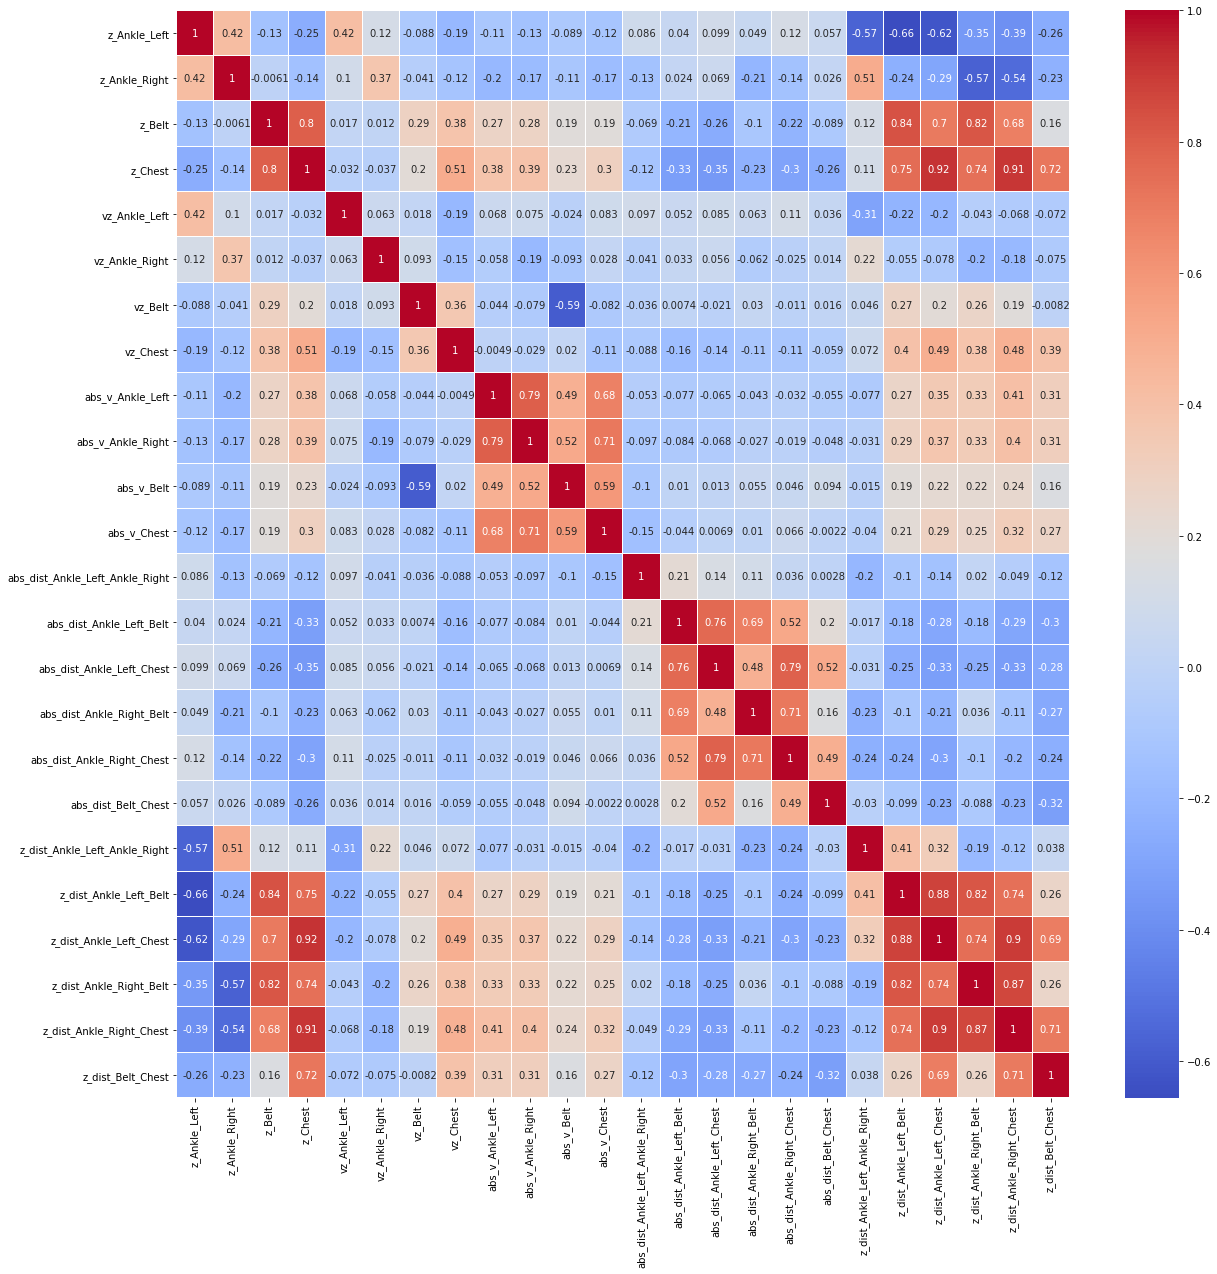

In [27]:
# Plotting the heatmap for correlating features
plt.subplots(figsize=(20,20))
_ = sns.heatmap(RA.corr(), annot=True, linewidths=0.1, cmap='coolwarm')
plt.show()

In [28]:
# Defining Body Attributes

ox, oy, oz = df['x_Belt'], df['y_Belt'], df['z_Belt'] # defining origin as the coordinates of belt tag

kx, ky, kz = df['x_Chest']-ox, df['y_Chest']-oy, df['z_Chest']-oz # defining z direction of body reference
kx, ky, kz = kx/np.sqrt(kx**2+ky**2+kz**2), ky/np.sqrt(kx**2+ky**2+kz**2), kz/np.sqrt(kx**2+ky**2+kz**2) # converting to unit vector

jx, jy, jz = 1, 1, -(kx+ky)/kz # assuming y direction of body reference such that j.k=0
jx, jy, jz = jx/np.sqrt(jx**2+jy**2+jz**2), jy/np.sqrt(jx**2+jy**2+jz**2), jz/np.sqrt(jx**2+jy**2+jz**2) # converting to unit vector

ix, iy, iz = (jy*kz-ky*jz), -(jx*kz-jz*kx), (jx*ky-kx*jy) # calculating x direction of body reference by jxk

# Create a Dataframe which is used for transformation
pos_vect = pd.DataFrame({'ox':ox, 'oy':oy, 'oz':oz, 'ix':ix, 'iy':iy, 'iz':iz, 'jx':jx, 'jy':jy, 'jz':jz, 'kx':kx, 'ky':ky, 'kz':kz})

# Defining Transformed Coordinates
def trans_pos(pos_vect, pos):
    o_vect = np.array([pos_vect.ox, pos_vect.oy, pos_vect.oz]).reshape(1,3)
    i_vect = np.array([pos_vect.ix, pos_vect.iy, pos_vect.iz]).reshape(1,3)
    j_vect = np.array([pos_vect.jx, pos_vect.jy, pos_vect.jz]).reshape(1,3)
    k_vect = np.array([pos_vect.kx, pos_vect.ky, pos_vect.kz]).reshape(1,3)
    Trb = np.concatenate([i_vect, j_vect, k_vect], axis=0)
    dot_mat = np.array([-np.dot(o_vect,i_vect.T).item(), -np.dot(o_vect,j_vect.T).item(), -np.dot(o_vect,k_vect.T).item()]).reshape(3,1)
    Trb = np.concatenate([Trb, dot_mat], axis=1)
    Trb = np.concatenate([Trb, np.array([0,0,0,1]).reshape(1,4)], axis=0)
    x, y, z = np.dot(Trb, pos)[0].item(), np.dot(Trb, pos)[1].item(), np.dot(Trb, pos)[2].item()
    return x, y, z

In [29]:
BA = pd.DataFrame()
tag = ['Ankle_Left', 'Ankle_Right', 'Chest']
for j in tag:
    s1, s2, s3 = list(), list(), list()
    for i in range(len(df)):
        pos = np.array([df['x_'+j].iloc[i], df['y_'+j].iloc[i], df['z_'+j].iloc[i], 1]).reshape(4,1)
        x1, y1, z1 = trans_pos(pos_vect.iloc[i], pos)
        s1.append(x1)
        s2.append(y1)
        s3.append(z1)
    BA = pd.concat([BA, pd.DataFrame({'x_b_'+j:s1, 'y_b_'+j:s2, 'z_b_'+j:s3})], axis=1)
BA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5219 entries, 0 to 5218
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   x_b_Ankle_Left   5219 non-null   float64
 1   y_b_Ankle_Left   5219 non-null   float64
 2   z_b_Ankle_Left   5219 non-null   float64
 3   x_b_Ankle_Right  5219 non-null   float64
 4   y_b_Ankle_Right  5219 non-null   float64
 5   z_b_Ankle_Right  5219 non-null   float64
 6   x_b_Chest        5219 non-null   float64
 7   y_b_Chest        5219 non-null   float64
 8   z_b_Chest        5219 non-null   float64
dtypes: float64(9)
memory usage: 367.1 KB


In [30]:
BA.head()

x_b_Ankle_Left  y_b_Ankle_Left  z_b_Ankle_Left  x_b_Ankle_Right  \
0       -0.723817       -0.275341       -0.442148        -0.089391   
1       -0.684639       -0.241147       -0.299942        -0.280541   
2       -0.189739       -0.278843       -0.623051         0.129329   
3        0.608599        0.357020       -0.104046         0.444992   
4        0.610327        0.246002       -0.410482         0.363678   

   y_b_Ankle_Right  z_b_Ankle_Right     x_b_Chest     y_b_Chest  z_b_Chest  
0        -0.065142        -0.390888  4.440892e-16  0.000000e+00   0.532300  
1         0.012176        -0.457780  0.000000e+00  0.000000e+00   0.502113  
2        -0.026469        -0.534099  2.220446e-16  0.000000e+00   0.340039  
3         0.288718        -0.246436  2.220446e-16 -4.440892e-16   0.560703  
4         0.272748        -0.445470  2.220446e-16  4.440892e-16   0.496461

In [31]:
# For velocity reference velocity will be 0,0,0 only and the velocity components
def trans_vel(pos_vect, pos):
    o_vect = np.array([0, 0, 0]).reshape(1,3)
    i_vect = np.array([pos_vect.ix, pos_vect.iy, pos_vect.iz]).reshape(1,3)
    j_vect = np.array([pos_vect.jx, pos_vect.jy, pos_vect.jz]).reshape(1,3)
    k_vect = np.array([pos_vect.kx, pos_vect.ky, pos_vect.kz]).reshape(1,3)
    Trb = np.concatenate([i_vect, j_vect, k_vect], axis=0)
    dot_mat = np.array([-np.dot(o_vect,i_vect.T).item(), -np.dot(o_vect,j_vect.T).item(), -np.dot(o_vect,k_vect.T).item()]).reshape(3,1)
    Trb = np.concatenate([Trb, dot_mat], axis=1)
    Trb = np.concatenate([Trb, np.array([0,0,0,1]).reshape(1,4)], axis=0)
    x, y, z = np.dot(Trb, pos)[0].item(), np.dot(Trb, pos)[1].item(), np.dot(Trb, pos)[2].item()
    return x, y, z

# Creating Velocity Dataframe
Vel_df = pd.DataFrame()
tag = ['Ankle_Left', 'Ankle_Right', 'Belt', 'Chest']
for j in tag:
    s1, s2, s3 = list(), list(), list()
    for i in range(len(df)):
        pos = np.array([df['vx_'+j].iloc[i], df['vy_'+j].iloc[i], df['vz_'+j].iloc[i], 1]).reshape(4,1)
        x1, y1, z1 = trans_vel(pos_vect.iloc[i], pos)
        s1.append(x1)
        s2.append(y1)
        s3.append(z1)
    Vel_df = pd.concat([Vel_df, pd.DataFrame({'vx_b_'+j:s1, 'vy_b_'+j:s2, 'vz_b_'+j:s3})], axis=1)
Vel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5219 entries, 0 to 5218
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   vx_b_Ankle_Left   5219 non-null   float64
 1   vy_b_Ankle_Left   5219 non-null   float64
 2   vz_b_Ankle_Left   5219 non-null   float64
 3   vx_b_Ankle_Right  5219 non-null   float64
 4   vy_b_Ankle_Right  5219 non-null   float64
 5   vz_b_Ankle_Right  5219 non-null   float64
 6   vx_b_Belt         5219 non-null   float64
 7   vy_b_Belt         5219 non-null   float64
 8   vz_b_Belt         5219 non-null   float64
 9   vx_b_Chest        5219 non-null   float64
 10  vy_b_Chest        5219 non-null   float64
 11  vz_b_Chest        5219 non-null   float64
dtypes: float64(12)
memory usage: 489.4 KB


In [32]:
Vel_df.head()

vx_b_Ankle_Left  vy_b_Ankle_Left  vz_b_Ankle_Left  vx_b_Ankle_Right  \
0        -0.954664         0.484265        -0.440413          1.002238   
1        -0.103436         0.101299         0.076448         -0.043012   
2        -0.009944         0.033428        -0.041956         -0.006931   
3         0.035343         0.018854        -0.043589         -0.064453   
4        -0.003535        -0.114293        -0.204039         -0.127952   

   vy_b_Ankle_Right  vz_b_Ankle_Right  vx_b_Belt  vy_b_Belt  vz_b_Belt  \
0         -0.430967         -0.227848  -0.379016   0.246622   0.146705   
1          0.018606         -0.078796  -0.055811   0.057080   0.080942   
2         -0.034970         -0.052584  -0.075388  -0.057440  -0.022405   
3         -0.161259         -0.302919  -0.071884  -0.235995  -0.295584   
4         -0.200411         -0.332745  -0.119454  -0.241088  -0.276683   

   vx_b_Chest  vy_b_Chest  vz_b_Chest  
0   -0.483971    0.302181    0.775548  
1   -0.232201    0.069356    0.250408  
2    0.055249   -0.095998   -0.024203  
3    0.088721   -0.184522   -0.071827  
4   -0.039249   -0.231589   -0.196914

In [33]:
# Creating Absolute Velocity of each tag
BA['abs_v_b_Ankle_Left'] = np.sqrt(Vel_df['vx_b_Ankle_Left']**2+Vel_df['vy_b_Ankle_Left']**2+Vel_df['vz_b_Ankle_Left']**2)
BA['abs_v_b_Ankle_Right'] = np.sqrt(Vel_df['vx_b_Ankle_Right']**2+Vel_df['vy_b_Ankle_Right']**2+Vel_df['vz_b_Ankle_Right']**2)
BA['abs_v_b_Belt'] = np.sqrt(Vel_df['vx_b_Belt']**2+Vel_df['vy_b_Belt']**2+Vel_df['vz_b_Belt']**2)
BA['abs_v_b_Chest'] = np.sqrt(Vel_df['vx_b_Chest']**2+Vel_df['vy_b_Chest']**2+Vel_df['vz_b_Chest']**2)

In [34]:
# Creating z coordinate and absolute velocity of origin i.e. belt
BA['z_orig'] = df.reset_index().z_Belt
BA['v_or'] = np.sqrt(df.reset_index()['vx_Belt']**2+df.reset_index()['vy_Belt']**2+df.reset_index()['vz_Belt']**2)

In [35]:
BA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5219 entries, 0 to 5218
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   x_b_Ankle_Left       5219 non-null   float64
 1   y_b_Ankle_Left       5219 non-null   float64
 2   z_b_Ankle_Left       5219 non-null   float64
 3   x_b_Ankle_Right      5219 non-null   float64
 4   y_b_Ankle_Right      5219 non-null   float64
 5   z_b_Ankle_Right      5219 non-null   float64
 6   x_b_Chest            5219 non-null   float64
 7   y_b_Chest            5219 non-null   float64
 8   z_b_Chest            5219 non-null   float64
 9   abs_v_b_Ankle_Left   5219 non-null   float64
 10  abs_v_b_Ankle_Right  5219 non-null   float64
 11  abs_v_b_Belt         5219 non-null   float64
 12  abs_v_b_Chest        5219 non-null   float64
 13  z_orig               5219 non-null   float64
 14  v_or                 5219 non-null   float64
dtypes: float64(15)
memory usage: 611.7 KB


In [36]:
# Creating Angles of movement of tag w.r.t z axis and xz plane
# Angles are denoted by the dot product of the two vectors hence we will calculate the dot product of velocities
# of the tag wit z axis and y axis (because 90-angle with y axis is angle with xz plane)
# Dot product of velocity of each tag with z axis is basically vz_b_ and with y axis is vy_b_
temp1 = Vel_df[['vz_b_Ankle_Left']].divide(BA['abs_v_b_Ankle_Left'], axis=0)
temp1.rename({'vz_b_Ankle_Left':'ang_Ankle_Left_z'}, inplace=True, axis=1)
temp2 = Vel_df[['vz_b_Ankle_Right']].divide(BA['abs_v_b_Ankle_Right'], axis=0)
temp2.rename({'vz_b_Ankle_Right':'ang_Ankle_Right_z'}, inplace=True, axis=1)
temp3 = Vel_df[['vz_b_Belt']].divide(BA['abs_v_b_Belt'], axis=0)
temp3.rename({'vz_b_Belt':'ang_Belt_z'}, inplace=True, axis=1)
temp4 = Vel_df[['vz_b_Chest']].divide(BA['abs_v_b_Chest'], axis=0)
temp4.rename({'vz_b_Chest':'ang_Chest_z'}, inplace=True, axis=1)
temp5 = Vel_df[['vy_b_Ankle_Left']].divide(BA['abs_v_b_Ankle_Left'], axis=0)
temp5.rename({'vy_b_Ankle_Left':'ang_Ankle_Left_y'}, inplace=True, axis=1)
temp6 = Vel_df[['vy_b_Ankle_Right']].divide(BA['abs_v_b_Ankle_Right'], axis=0)
temp6.rename({'vy_b_Ankle_Right':'ang_Ankle_Right_y'}, inplace=True, axis=1)
temp7 = Vel_df[['vy_b_Belt']].divide(BA['abs_v_b_Belt'], axis=0)
temp7.rename({'vy_b_Belt':'ang_Belt_y'}, inplace=True, axis=1)
temp8 = Vel_df[['vy_b_Chest']].divide(BA['abs_v_b_Chest'], axis=0)
temp8.rename({'vy_b_Chest':'ang_Chest_y'}, inplace=True, axis=1)
BA = pd.concat([BA, temp1, temp2, temp3, temp4, temp5, temp6, temp7, temp8], axis=1)
BA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5219 entries, 0 to 5218
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   x_b_Ankle_Left       5219 non-null   float64
 1   y_b_Ankle_Left       5219 non-null   float64
 2   z_b_Ankle_Left       5219 non-null   float64
 3   x_b_Ankle_Right      5219 non-null   float64
 4   y_b_Ankle_Right      5219 non-null   float64
 5   z_b_Ankle_Right      5219 non-null   float64
 6   x_b_Chest            5219 non-null   float64
 7   y_b_Chest            5219 non-null   float64
 8   z_b_Chest            5219 non-null   float64
 9   abs_v_b_Ankle_Left   5219 non-null   float64
 10  abs_v_b_Ankle_Right  5219 non-null   float64
 11  abs_v_b_Belt         5219 non-null   float64
 12  abs_v_b_Chest        5219 non-null   float64
 13  z_orig               5219 non-null   float64
 14  v_or                 5219 non-null   float64
 15  ang_Ankle_Left_z     5219 non-null   f

In [37]:
# Creating direction of x axis with gloabl z axis and y axis
BA = pd.concat([BA, pos_vect.reset_index()[['iy', 'iz']]], axis=1)
BA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5219 entries, 0 to 5218
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   x_b_Ankle_Left       5219 non-null   float64
 1   y_b_Ankle_Left       5219 non-null   float64
 2   z_b_Ankle_Left       5219 non-null   float64
 3   x_b_Ankle_Right      5219 non-null   float64
 4   y_b_Ankle_Right      5219 non-null   float64
 5   z_b_Ankle_Right      5219 non-null   float64
 6   x_b_Chest            5219 non-null   float64
 7   y_b_Chest            5219 non-null   float64
 8   z_b_Chest            5219 non-null   float64
 9   abs_v_b_Ankle_Left   5219 non-null   float64
 10  abs_v_b_Ankle_Right  5219 non-null   float64
 11  abs_v_b_Belt         5219 non-null   float64
 12  abs_v_b_Chest        5219 non-null   float64
 13  z_orig               5219 non-null   float64
 14  v_or                 5219 non-null   float64
 15  ang_Ankle_Left_z     5219 non-null   f

In [38]:
# Creating angles of movement of origin with global z axis and global y axis
# This is nothing but vz_Belt and vy_belt normalize
temp1 = df[['vy_Belt']].divide(RA['abs_v_Belt'], axis=0)
temp2 = df[['vz_Belt']].divide(RA['abs_v_Belt'], axis=0)
temp1.rename({'vy_Belt':'ang_orig_xz'}, axis=1, inplace=True)
temp2.rename({'vz_Belt':'ang_orig_z'}, axis=1, inplace=True)
BA = pd.concat([BA, temp1.reset_index(drop=True), temp2.reset_index(drop=True)], axis=1)
BA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5219 entries, 0 to 5218
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   x_b_Ankle_Left       5219 non-null   float64
 1   y_b_Ankle_Left       5219 non-null   float64
 2   z_b_Ankle_Left       5219 non-null   float64
 3   x_b_Ankle_Right      5219 non-null   float64
 4   y_b_Ankle_Right      5219 non-null   float64
 5   z_b_Ankle_Right      5219 non-null   float64
 6   x_b_Chest            5219 non-null   float64
 7   y_b_Chest            5219 non-null   float64
 8   z_b_Chest            5219 non-null   float64
 9   abs_v_b_Ankle_Left   5219 non-null   float64
 10  abs_v_b_Ankle_Right  5219 non-null   float64
 11  abs_v_b_Belt         5219 non-null   float64
 12  abs_v_b_Chest        5219 non-null   float64
 13  z_orig               5219 non-null   float64
 14  v_or                 5219 non-null   float64
 15  ang_Ankle_Left_z     5219 non-null   f

In [39]:
# Lets drop the x and y of chest tag since it is always be zero
BA.drop(columns=['x_b_Chest', 'y_b_Chest'], inplace=True)
BA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5219 entries, 0 to 5218
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   x_b_Ankle_Left       5219 non-null   float64
 1   y_b_Ankle_Left       5219 non-null   float64
 2   z_b_Ankle_Left       5219 non-null   float64
 3   x_b_Ankle_Right      5219 non-null   float64
 4   y_b_Ankle_Right      5219 non-null   float64
 5   z_b_Ankle_Right      5219 non-null   float64
 6   z_b_Chest            5219 non-null   float64
 7   abs_v_b_Ankle_Left   5219 non-null   float64
 8   abs_v_b_Ankle_Right  5219 non-null   float64
 9   abs_v_b_Belt         5219 non-null   float64
 10  abs_v_b_Chest        5219 non-null   float64
 11  z_orig               5219 non-null   float64
 12  v_or                 5219 non-null   float64
 13  ang_Ankle_Left_z     5219 non-null   float64
 14  ang_Ankle_Right_z    5219 non-null   float64
 15  ang_Belt_z           5219 non-null   f

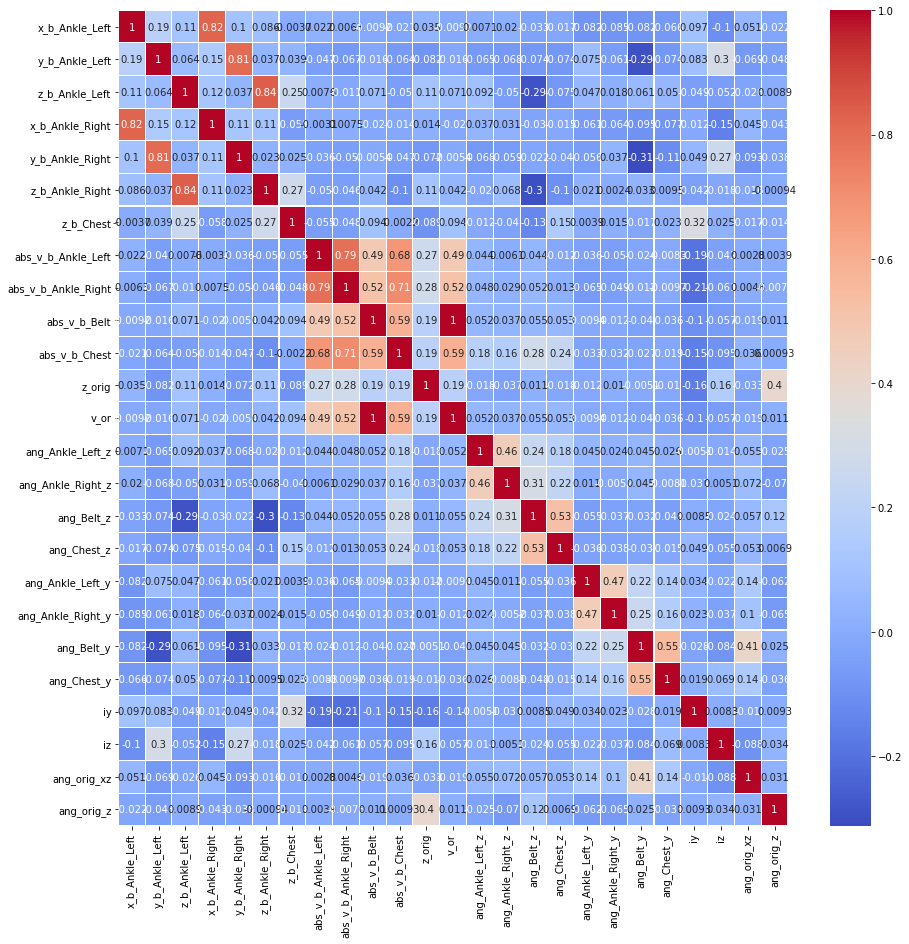

In [40]:
# Plotting the heatmap for correlating features
plt.subplots(figsize=(15,15))
_ = sns.heatmap(BA.corr(), annot=True, linewidths=0.1, cmap='coolwarm')
plt.show()

In [41]:
# Dropping the v_or from attributes
BA.drop(columns=['v_or'], inplace=True)
BA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5219 entries, 0 to 5218
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   x_b_Ankle_Left       5219 non-null   float64
 1   y_b_Ankle_Left       5219 non-null   float64
 2   z_b_Ankle_Left       5219 non-null   float64
 3   x_b_Ankle_Right      5219 non-null   float64
 4   y_b_Ankle_Right      5219 non-null   float64
 5   z_b_Ankle_Right      5219 non-null   float64
 6   z_b_Chest            5219 non-null   float64
 7   abs_v_b_Ankle_Left   5219 non-null   float64
 8   abs_v_b_Ankle_Right  5219 non-null   float64
 9   abs_v_b_Belt         5219 non-null   float64
 10  abs_v_b_Chest        5219 non-null   float64
 11  z_orig               5219 non-null   float64
 12  ang_Ankle_Left_z     5219 non-null   float64
 13  ang_Ankle_Right_z    5219 non-null   float64
 14  ang_Belt_z           5219 non-null   float64
 15  ang_Chest_z          5219 non-null   f

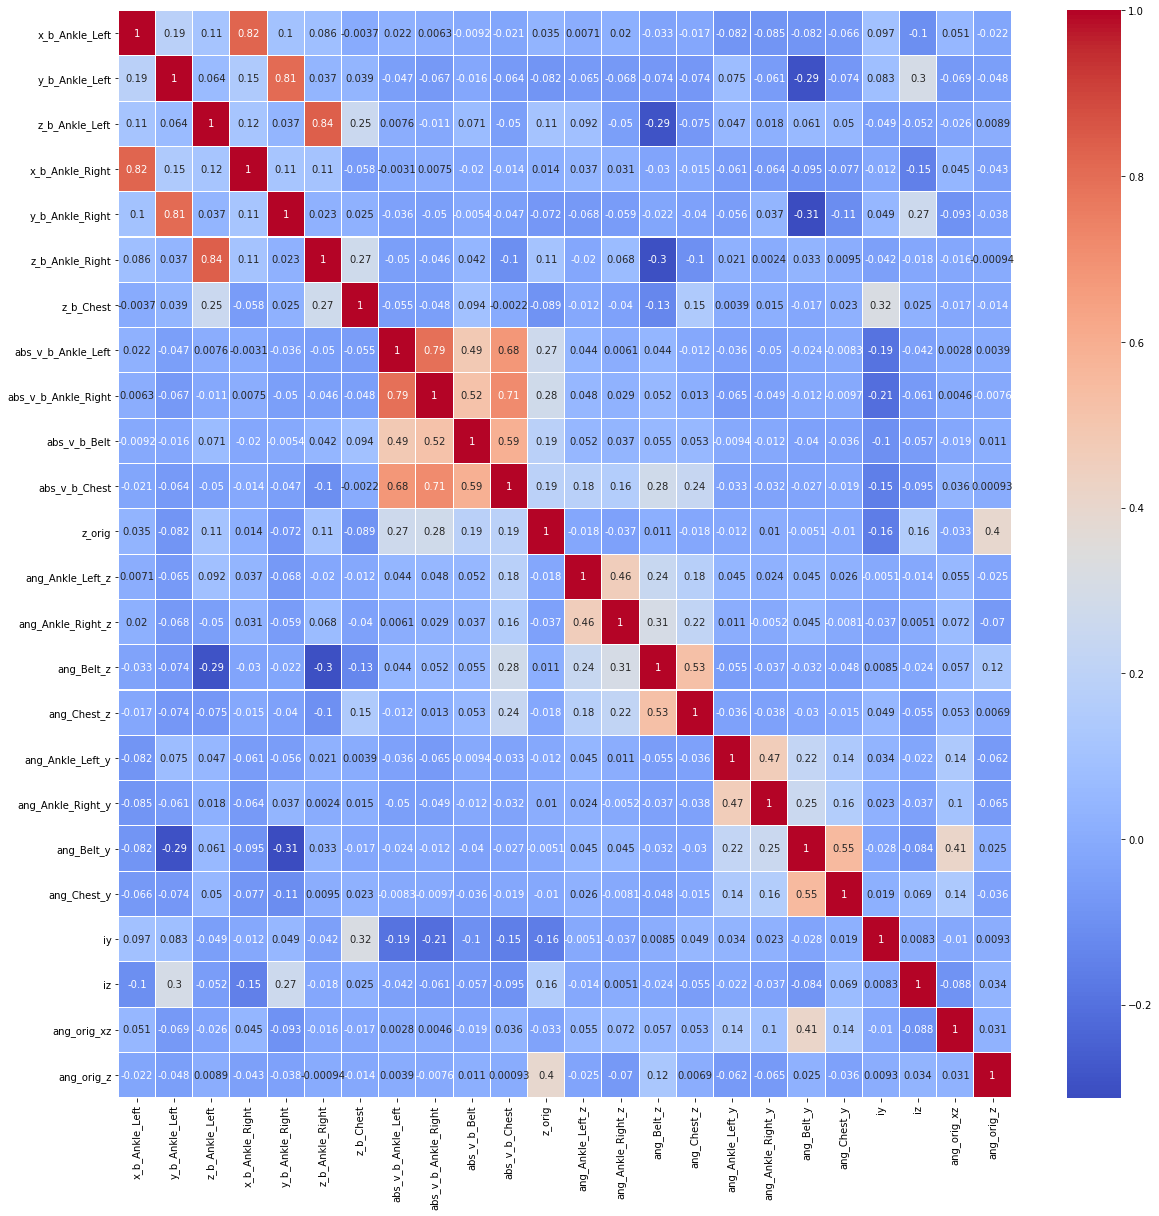

In [42]:
# Plotting the heatmap for correlating features
plt.subplots(figsize=(20,20))
_ = sns.heatmap(BA.corr(), annot=True, linewidths=0.1, cmap='coolwarm')
plt.show()

In [43]:
# Creating dataframe for reference and body both and dropping common columns
RA_BA = pd.concat([RA.reset_index(drop=True), BA], axis=1)
RA_BA.drop(columns=['z_orig'], inplace=True)
RA_BA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5219 entries, 0 to 5218
Data columns (total 47 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   z_Ankle_Left                     5219 non-null   float64
 1   z_Ankle_Right                    5219 non-null   float64
 2   z_Belt                           5219 non-null   float64
 3   z_Chest                          5219 non-null   float64
 4   vz_Ankle_Left                    5219 non-null   float64
 5   vz_Ankle_Right                   5219 non-null   float64
 6   vz_Belt                          5219 non-null   float64
 7   vz_Chest                         5219 non-null   float64
 8   abs_v_Ankle_Left                 5219 non-null   float64
 9   abs_v_Ankle_Right                5219 non-null   float64
 10  abs_v_Belt                       5219 non-null   float64
 11  abs_v_Chest                      5219 non-null   float64
 12  abs_dist_Ankle_Left_

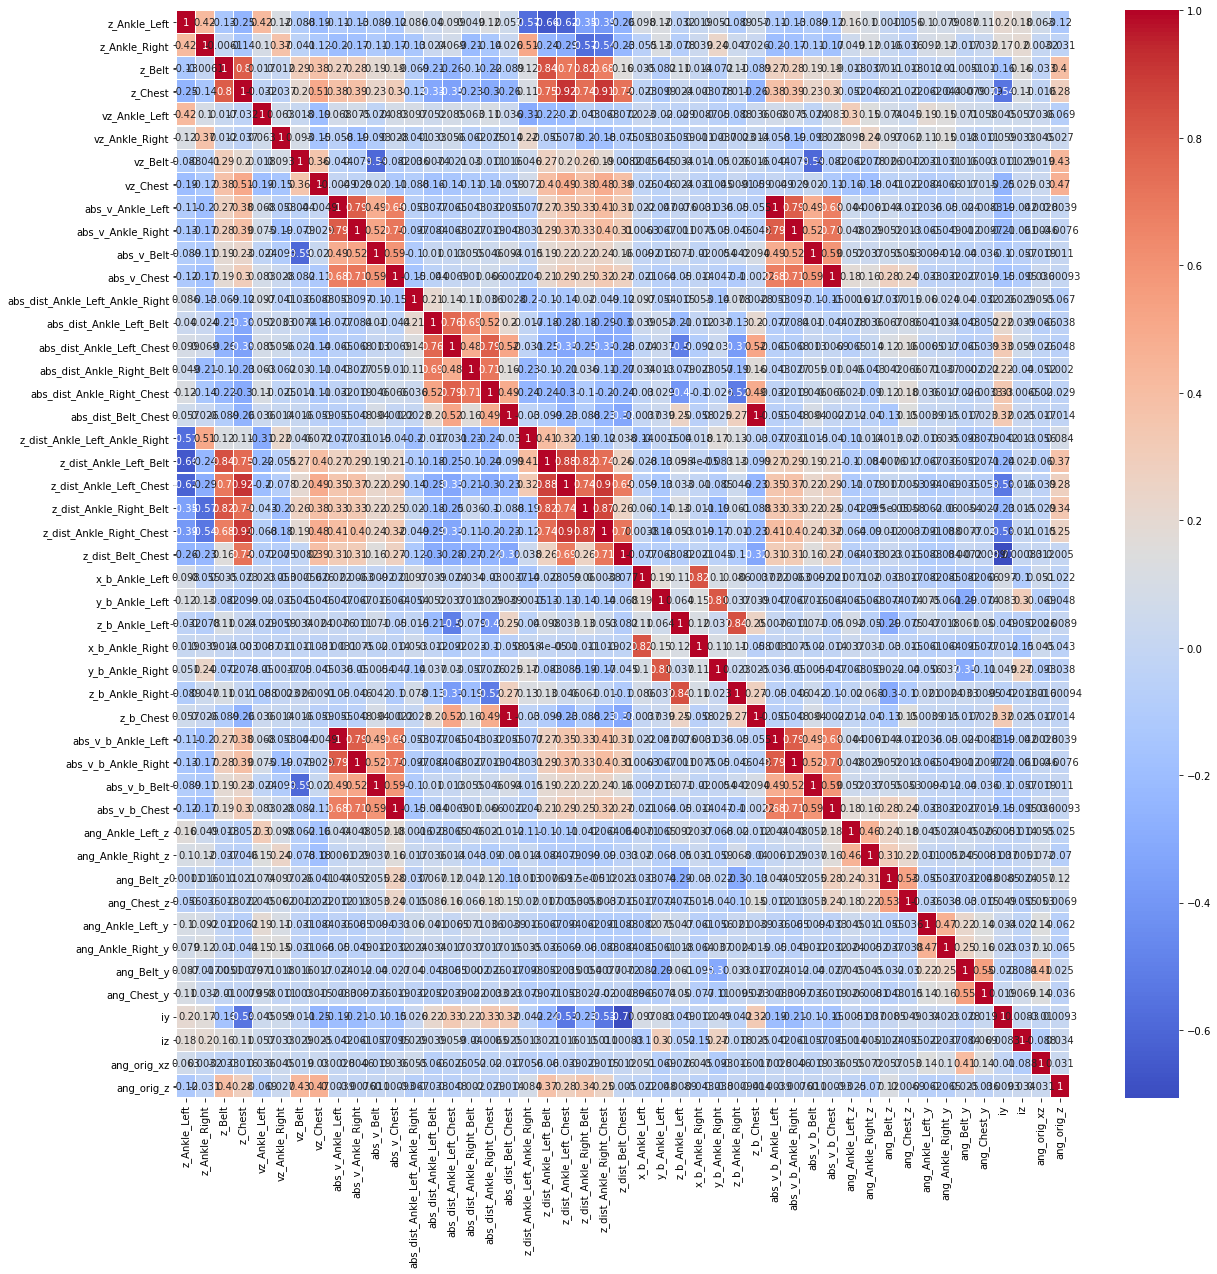

In [44]:
# Plotting the heatmap for correlating features
plt.subplots(figsize=(20,20))
_ = sns.heatmap(RA_BA.corr(), annot=True, linewidths=0.1, cmap='coolwarm')
plt.show()

In [45]:
# Dropping correlated features
RA_BA.drop(columns=['abs_v_b_Ankle_Left', 'abs_v_b_Ankle_Right', 'abs_v_b_Belt', 'abs_v_b_Chest', 'z_b_Chest'], inplace=True)
RA_BA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5219 entries, 0 to 5218
Data columns (total 42 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   z_Ankle_Left                     5219 non-null   float64
 1   z_Ankle_Right                    5219 non-null   float64
 2   z_Belt                           5219 non-null   float64
 3   z_Chest                          5219 non-null   float64
 4   vz_Ankle_Left                    5219 non-null   float64
 5   vz_Ankle_Right                   5219 non-null   float64
 6   vz_Belt                          5219 non-null   float64
 7   vz_Chest                         5219 non-null   float64
 8   abs_v_Ankle_Left                 5219 non-null   float64
 9   abs_v_Ankle_Right                5219 non-null   float64
 10  abs_v_Belt                       5219 non-null   float64
 11  abs_v_Chest                      5219 non-null   float64
 12  abs_dist_Ankle_Left_

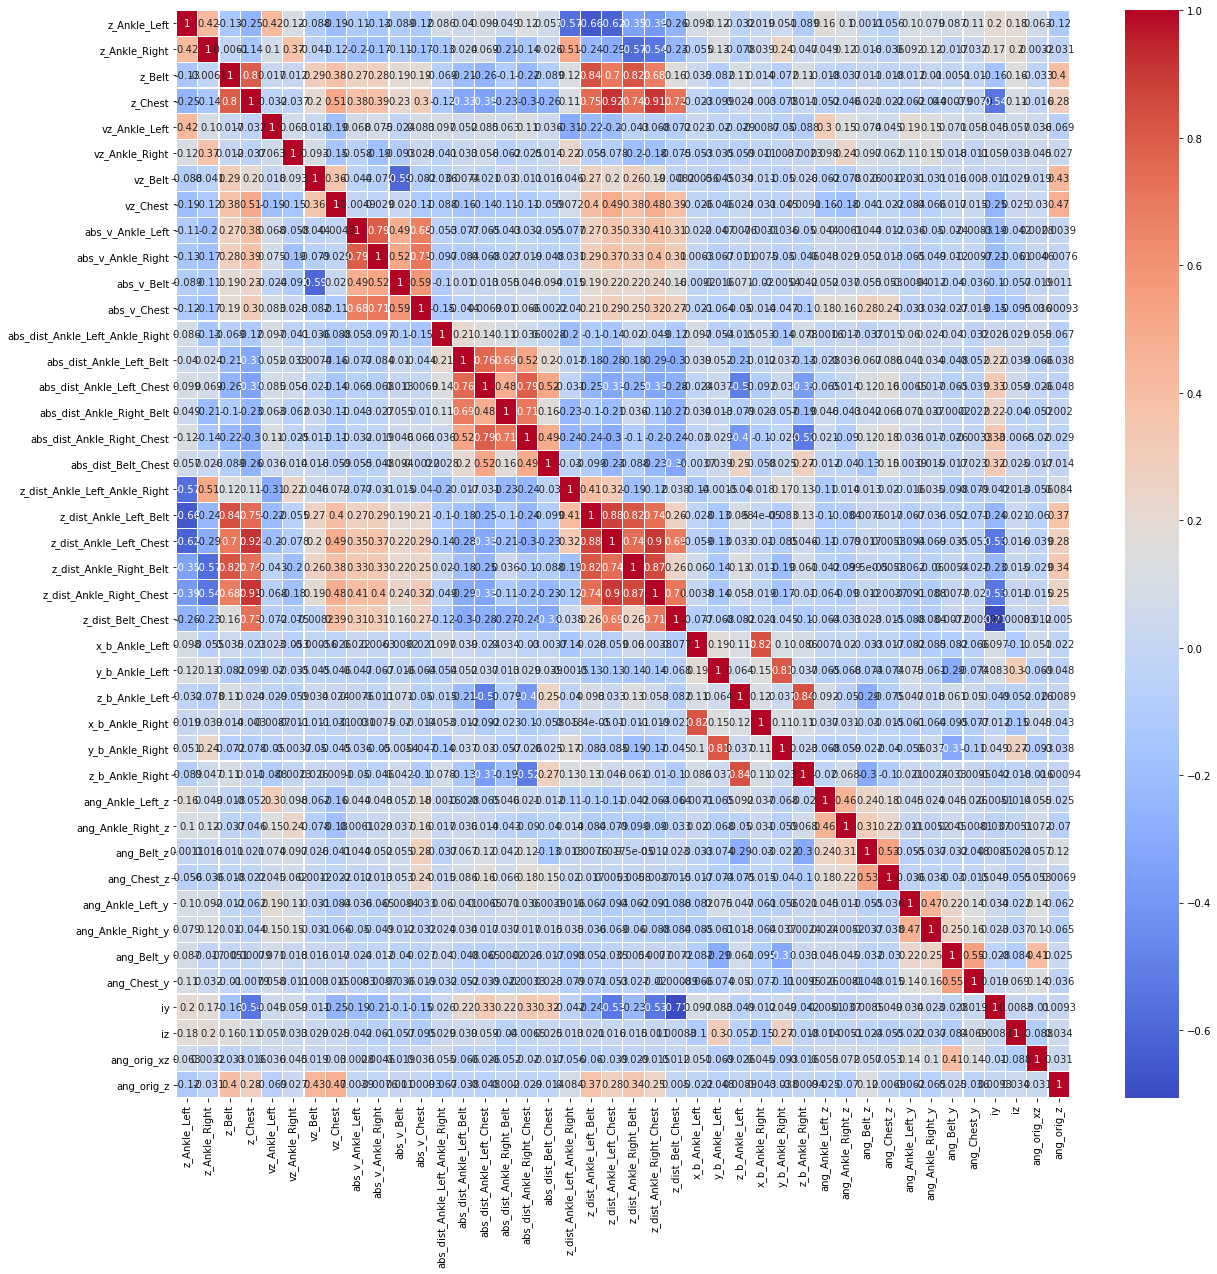

In [46]:
# Plotting the heatmap for correlating features
plt.subplots(figsize=(20,20))
_ = sns.heatmap(RA_BA.corr(), annot=True, linewidths=0.1, cmap='coolwarm')
plt.show()

In [47]:
# Defining Angle attributes between upper torso and lower torso considering both left and righ angles
ut_x, ut_y, ut_z = (df['x_Chest']-df['x_Belt']), (df['y_Chest']-df['y_Belt']), (df['z_Chest']-df['z_Belt'])
lt_r_x, lt_r_y, lt_r_z = (df['x_Ankle_Right']-df['x_Belt']), (df['y_Ankle_Right']-df['z_Belt']), (df['z_Ankle_Right']-df['z_Belt'])
lt_l_x, lt_l_y, lt_l_z = (df['x_Ankle_Left']-df['x_Belt']), (df['y_Ankle_Left']-df['z_Belt']), (df['z_Ankle_Left']-df['z_Belt'])

mod_ut = np.sqrt(ut_x**2+ut_y**2+ut_z**2)
mod_lt_r = np.sqrt(lt_r_x**2+lt_r_y**2+lt_r_z**2)
mod_lt_l = np.sqrt(lt_l_x**2+lt_l_y**2+lt_l_z**2)
ang_r = (ut_x.multiply(lt_r_x, axis=0)+ut_y.multiply(lt_r_y, axis=0)+ut_z.multiply(lt_r_z, axis=0)).divide(mod_ut, axis=0).divide(mod_lt_r, axis=0)
ang_l = (ut_x.multiply(lt_l_x, axis=0)+ut_y.multiply(lt_l_y, axis=0)+ut_z.multiply(lt_l_z, axis=0)).divide(mod_ut, axis=0).divide(mod_lt_l, axis=0)

AA = pd.DataFrame({'angle_left':ang_l, 'angle_right':ang_r})
AA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5219 entries, 2009-05-27 14:03:25 to 2009-05-27 11:50:41
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   angle_left   5219 non-null   float64
 1   angle_right  5219 non-null   float64
dtypes: float64(2)
memory usage: 122.3 KB


In [48]:
# Adding angle attributes with other attributes
RA_AA = pd.concat([RA, AA], axis=1)
RA_AA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5219 entries, 2009-05-27 14:03:25 to 2009-05-27 11:50:41
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   z_Ankle_Left                     5219 non-null   float64
 1   z_Ankle_Right                    5219 non-null   float64
 2   z_Belt                           5219 non-null   float64
 3   z_Chest                          5219 non-null   float64
 4   vz_Ankle_Left                    5219 non-null   float64
 5   vz_Ankle_Right                   5219 non-null   float64
 6   vz_Belt                          5219 non-null   float64
 7   vz_Chest                         5219 non-null   float64
 8   abs_v_Ankle_Left                 5219 non-null   float64
 9   abs_v_Ankle_Right                5219 non-null   float64
 10  abs_v_Belt                       5219 non-null   float64
 11  abs_v_Chest                      5219 non-null

In [49]:
BA_AA = pd.concat([BA, AA.reset_index(drop=True)], axis=1)
BA_AA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5219 entries, 0 to 5218
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   x_b_Ankle_Left       5219 non-null   float64
 1   y_b_Ankle_Left       5219 non-null   float64
 2   z_b_Ankle_Left       5219 non-null   float64
 3   x_b_Ankle_Right      5219 non-null   float64
 4   y_b_Ankle_Right      5219 non-null   float64
 5   z_b_Ankle_Right      5219 non-null   float64
 6   z_b_Chest            5219 non-null   float64
 7   abs_v_b_Ankle_Left   5219 non-null   float64
 8   abs_v_b_Ankle_Right  5219 non-null   float64
 9   abs_v_b_Belt         5219 non-null   float64
 10  abs_v_b_Chest        5219 non-null   float64
 11  z_orig               5219 non-null   float64
 12  ang_Ankle_Left_z     5219 non-null   float64
 13  ang_Ankle_Right_z    5219 non-null   float64
 14  ang_Belt_z           5219 non-null   float64
 15  ang_Chest_z          5219 non-null   f

In [50]:
RA_BA_AA = pd.concat([RA_BA, AA.reset_index(drop=True)], axis=1)
RA_BA_AA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5219 entries, 0 to 5218
Data columns (total 44 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   z_Ankle_Left                     5219 non-null   float64
 1   z_Ankle_Right                    5219 non-null   float64
 2   z_Belt                           5219 non-null   float64
 3   z_Chest                          5219 non-null   float64
 4   vz_Ankle_Left                    5219 non-null   float64
 5   vz_Ankle_Right                   5219 non-null   float64
 6   vz_Belt                          5219 non-null   float64
 7   vz_Chest                         5219 non-null   float64
 8   abs_v_Ankle_Left                 5219 non-null   float64
 9   abs_v_Ankle_Right                5219 non-null   float64
 10  abs_v_Belt                       5219 non-null   float64
 11  abs_v_Chest                      5219 non-null   float64
 12  abs_dist_Ankle_Left_

#### Now we have 6 feature attributes
1. Reference Attributes (RA)
2. Body Attributes (BA)
3. Angle attributes (AA)
4. Reference+Body (RA_BA)
5. Reference+Angle (RA_AA)
6. Body+Angle (BA_AA)
7. Reference+Body+Angle(RA_BA_AA)

#### Let us now scale all the features using standard scalar and split the data to training and test data

#### In this project since there are imbalance classes we will apply one more preprocessing technique i.e. Synthetic Minority Oversampling Technique

#### The important point to be noticed in preprocessing is that all the preprocessing techniques will be applied only on training data and test data will be like the unseen data for prediction only

In literatures they have done 10-fold Cross Validation and reported the accuracies but in this project 10-fold CV will be applied only to training data and further accuracies will be reported by predicting the test data.

In [51]:
# Import Standard Scaler and train test split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [52]:
# Before scaling and splitting lets define our output variable i.e. y which is activity column of dataframe
y = df['activity']
print(y.describe())
y.head()

count      5219
unique       11
top       lying
freq       1747
Name: activity, dtype: object


date
2009-05-27 14:03:25         walking
2009-05-27 14:03:26         walking
2009-05-27 14:03:27         walking
2009-05-27 14:03:28         walking
2009-05-27 14:03:29    sitting down
Name: activity, dtype: object

In [53]:
# 1. Preprocessing the reference attributes
X_train_RA, X_test_RA, y_train_RA, y_test_RA = train_test_split(RA, y, test_size=0.25, stratify=y, random_state=42)
scaler_RA = StandardScaler()
X_train_RA_scaled = scaler_RA.fit_transform(X_train_RA)
X_train_RA_scaled_smote, y_RA_smote = SMOTE().fit_resample(X_train_RA_scaled, y_train_RA)
print(y_RA_smote.value_counts())
print(X_train_RA_scaled_smote.shape)

sitting down                              1310
lying                                     1310
standing up from lying                    1310
on all fours                              1310
sitting                                   1310
lying down                                1310
walking                                   1310
standing up from sitting on the ground    1310
standing up from sitting                  1310
falling                                   1310
sitting on the ground                     1310
Name: activity, dtype: int64
(14410, 24)


In [54]:
# 2. Preprocessing the body attributes
X_train_BA, X_test_BA, y_train_BA, y_test_BA = train_test_split(BA, y, test_size=0.25, stratify=y, random_state=42)
scaler_BA = StandardScaler()
X_train_BA_scaled = scaler_BA.fit_transform(X_train_BA)
X_train_BA_scaled_smote, y_BA_smote = SMOTE().fit_resample(X_train_BA_scaled, y_train_BA)
print(y_BA_smote.value_counts())
print(X_train_BA_scaled_smote.shape)

sitting down                              1310
lying                                     1310
standing up from lying                    1310
on all fours                              1310
sitting                                   1310
lying down                                1310
walking                                   1310
standing up from sitting on the ground    1310
standing up from sitting                  1310
falling                                   1310
sitting on the ground                     1310
Name: activity, dtype: int64
(14410, 24)


In [55]:
# 3. Preprocessing the angle attributes
X_train_AA, X_test_AA, y_train_AA, y_test_AA = train_test_split(AA, y, test_size=0.25, stratify=y, random_state=42)
scaler_AA = StandardScaler()
X_train_AA_scaled = scaler_AA.fit_transform(X_train_AA)
X_train_AA_scaled_smote, y_AA_smote = SMOTE().fit_resample(X_train_AA_scaled, y_train_AA)
print(y_AA_smote.value_counts())
print(X_train_AA_scaled_smote.shape)

sitting down                              1310
lying                                     1310
standing up from lying                    1310
on all fours                              1310
sitting                                   1310
lying down                                1310
walking                                   1310
standing up from sitting on the ground    1310
standing up from sitting                  1310
falling                                   1310
sitting on the ground                     1310
Name: activity, dtype: int64
(14410, 2)


In [56]:
# 4. Preprocessing the reference+body attributes
X_train_RA_BA, X_test_RA_BA, y_train_RA_BA, y_test_RA_BA = train_test_split(RA_BA, y, test_size=0.25, stratify=y, random_state=42)
scaler_RA_BA = StandardScaler()
X_train_RA_BA_scaled = scaler_RA_BA.fit_transform(X_train_RA_BA)
X_train_RA_BA_scaled_smote, y_RA_BA_smote = SMOTE().fit_resample(X_train_RA_BA_scaled, y_train_RA_BA)
print(y_RA_BA_smote.value_counts())
print(X_train_RA_BA_scaled_smote.shape)

sitting down                              1310
lying                                     1310
standing up from lying                    1310
on all fours                              1310
sitting                                   1310
lying down                                1310
walking                                   1310
standing up from sitting on the ground    1310
standing up from sitting                  1310
falling                                   1310
sitting on the ground                     1310
Name: activity, dtype: int64
(14410, 42)


In [57]:
# 5. Preprocessing the reference+angle attributes
X_train_RA_AA, X_test_RA_AA, y_train_RA_AA, y_test_RA_AA = train_test_split(RA_AA, y, test_size=0.25, stratify=y, random_state=42)
scaler_RA_AA = StandardScaler()
X_train_RA_AA_scaled = scaler_RA_AA.fit_transform(X_train_RA_AA)
X_train_RA_AA_scaled_smote, y_RA_AA_smote = SMOTE().fit_resample(X_train_RA_AA_scaled, y_train_RA_AA)
print(y_RA_AA_smote.value_counts())
print(X_train_RA_AA_scaled_smote.shape)

sitting down                              1310
lying                                     1310
standing up from lying                    1310
on all fours                              1310
sitting                                   1310
lying down                                1310
walking                                   1310
standing up from sitting on the ground    1310
standing up from sitting                  1310
falling                                   1310
sitting on the ground                     1310
Name: activity, dtype: int64
(14410, 26)


In [58]:
# 6. Preprocessing the body+angle attributes
X_train_BA_AA, X_test_BA_AA, y_train_BA_AA, y_test_BA_AA = train_test_split(BA_AA, y, test_size=0.25, stratify=y, random_state=42)
scaler_BA_AA = StandardScaler()
X_train_BA_AA_scaled = scaler_BA_AA.fit_transform(X_train_BA_AA)
X_train_BA_AA_scaled_smote, y_BA_AA_smote = SMOTE().fit_resample(X_train_BA_AA_scaled, y_train_BA_AA)
print(y_BA_AA_smote.value_counts())
print(X_train_BA_AA_scaled_smote.shape)

sitting down                              1310
lying                                     1310
standing up from lying                    1310
on all fours                              1310
sitting                                   1310
lying down                                1310
walking                                   1310
standing up from sitting on the ground    1310
standing up from sitting                  1310
falling                                   1310
sitting on the ground                     1310
Name: activity, dtype: int64
(14410, 26)


In [59]:
# 7. Preprocessing the reference+body+angle attributes
X_train_RA_BA_AA, X_test_RA_BA_AA, y_train_RA_BA_AA, y_test_RA_BA_AA = train_test_split(RA_BA_AA, y, test_size=0.25, stratify=y, random_state=42)
scaler_RA_BA_AA = StandardScaler()
X_train_RA_BA_AA_scaled = scaler_RA_BA_AA.fit_transform(X_train_RA_BA_AA)
X_train_RA_BA_AA_scaled_smote, y_RA_BA_AA_smote = SMOTE().fit_resample(X_train_RA_BA_AA_scaled, y_train_RA_BA_AA)
print(y_RA_BA_AA_smote.value_counts())
print(X_train_RA_BA_AA_scaled_smote.shape)

sitting down                              1310
lying                                     1310
standing up from lying                    1310
on all fours                              1310
sitting                                   1310
lying down                                1310
walking                                   1310
standing up from sitting on the ground    1310
standing up from sitting                  1310
falling                                   1310
sitting on the ground                     1310
Name: activity, dtype: int64
(14410, 44)


# Modeling

## 1. Decision Tree Classifier Model

Decision Tree Classifier on Reference Attributes
Cross Validation Accuracy: 0.9305343511450381
Best parameter from Cross Validation: {'criterion': 'entropy', 'max_depth': 18}
Accuracy: 0.7754789272030651
Precision for fall: 0.1724137931034483
Recall for fall: 0.2631578947368421
F1-score for fall: 0.20833333333333334


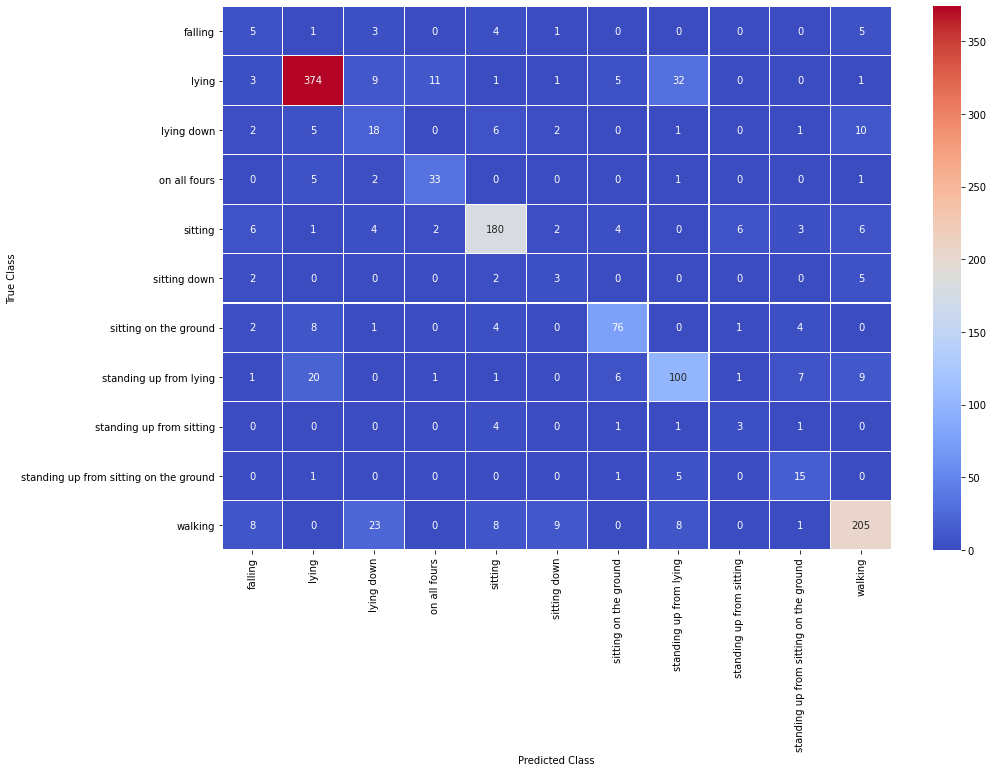

In [60]:
# 1.1. Decision Tree - Referenece Attributes
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
criterion = ['gini', 'entropy']
max_depth = list(np.arange(2,41,2))
max_depth.append(None)
param_grid = {'criterion':criterion, 'max_depth':max_depth}
dtc_RA = DecisionTreeClassifier(random_state=42)
dtc_RA_cv = GridSearchCV(dtc_RA, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
dtc_RA_cv.fit(X_train_RA_scaled_smote, y_RA_smote)
print('Decision Tree Classifier on Reference Attributes')
print('Cross Validation Accuracy:', dtc_RA_cv.best_score_)
print('Best parameter from Cross Validation:', dtc_RA_cv.best_params_)
X_test_RA_scaled = scaler_RA.transform(X_test_RA)
y_pred_RA_dtc = dtc_RA_cv.predict(X_test_RA_scaled)
print('Accuracy:', accuracy_score(y_test_RA, y_pred_RA_dtc))
print('Precision for fall:', precision_score(y_test_RA, y_pred_RA_dtc, average=None)[0])
print('Recall for fall:', recall_score(y_test_RA, y_pred_RA_dtc, average=None)[0])
print('F1-score for fall:', f1_score(y_test_RA, y_pred_RA_dtc, average=None)[0])
_ = plt.subplots(figsize= (15,10))
_ = sns.heatmap(confusion_matrix(y_test_RA, y_pred_RA_dtc, labels=dtc_RA_cv.classes_), 
            annot=True, fmt='d', xticklabels=dtc_RA_cv.classes_, yticklabels=dtc_RA_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

Decision Tree Classifier on Body Attributes
Cross Validation Accuracy: 0.9147814018043026
Best parameter from Cross Validation: {'criterion': 'entropy', 'max_depth': 20}
Accuracy: 0.7164750957854407
Precision for fall: 0.2222222222222222
Recall for fall: 0.42105263157894735
F1-score for fall: 0.2909090909090909


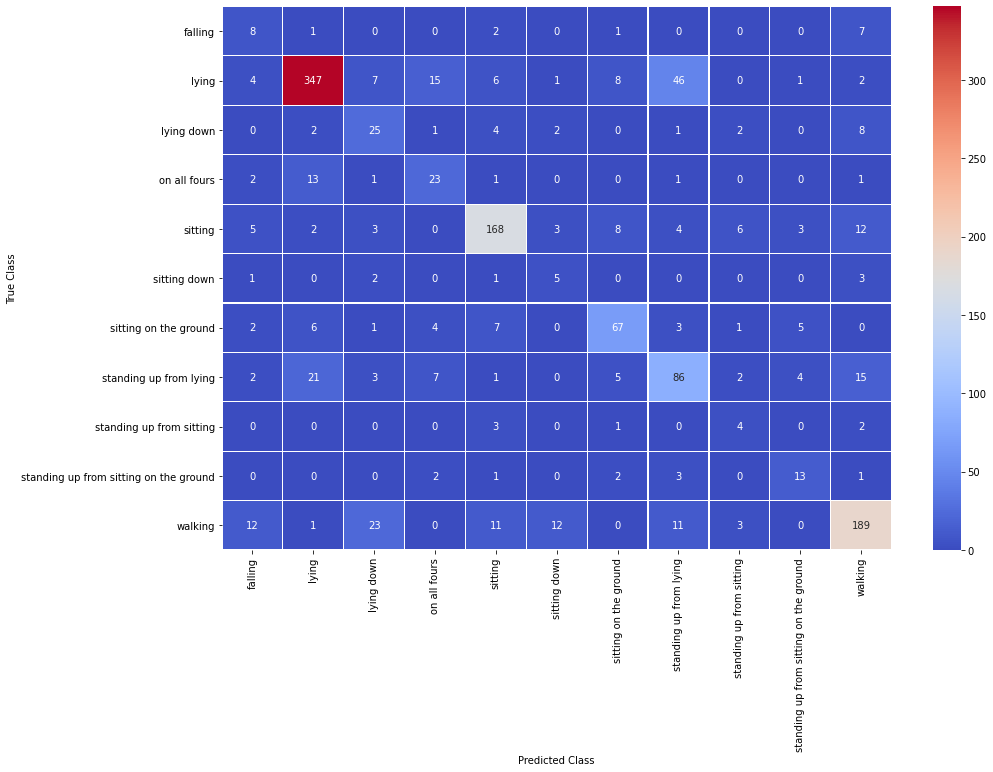

In [61]:
# 1.2. Decision Tree - Body Attributes
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
criterion = ['gini', 'entropy']
max_depth = list(np.arange(2,41,2))
max_depth.append(None)
param_grid = {'criterion':criterion, 'max_depth':max_depth}
dtc_BA = DecisionTreeClassifier(random_state=42)
dtc_BA_cv = GridSearchCV(dtc_BA, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
dtc_BA_cv.fit(X_train_BA_scaled_smote, y_BA_smote)
print('Decision Tree Classifier on Body Attributes')
print('Cross Validation Accuracy:', dtc_BA_cv.best_score_)
print('Best parameter from Cross Validation:', dtc_BA_cv.best_params_)
X_test_BA_scaled = scaler_BA.transform(X_test_BA)
y_pred_BA_dtc = dtc_BA_cv.predict(X_test_BA_scaled)
print('Accuracy:', accuracy_score(y_test_BA, y_pred_BA_dtc))
print('Precision for fall:', precision_score(y_test_BA, y_pred_BA_dtc, average=None)[0])
print('Recall for fall:', recall_score(y_test_BA, y_pred_BA_dtc, average=None)[0])
print('F1-score for fall:', f1_score(y_test_BA, y_pred_BA_dtc, average=None)[0])
_ = plt.subplots(figsize= (15,10))
_ = sns.heatmap(confusion_matrix(y_test_BA, y_pred_BA_dtc, labels=dtc_BA_cv.classes_), 
            annot=True, fmt='d', xticklabels=dtc_BA_cv.classes_, yticklabels=dtc_BA_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

Decision Tree Classifier on Angle Attributes
Cross Validation Accuracy: 0.46842470506592643
Best parameter from Cross Validation: {'criterion': 'entropy', 'max_depth': 22}
Accuracy: 0.17547892720306513
Precision for fall: 0.030303030303030304
Recall for fall: 0.15789473684210525
F1-score for fall: 0.05084745762711865


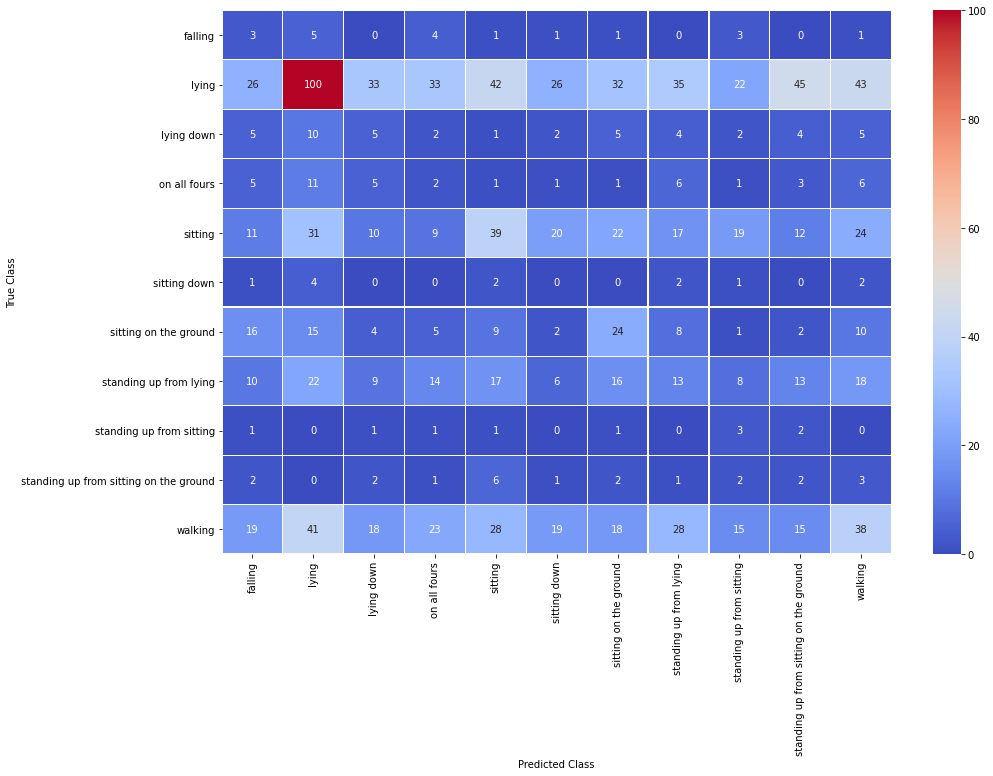

In [62]:
# 1.3. Decision Tree - Angle Attributes
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
criterion = ['gini', 'entropy']
max_depth = list(np.arange(2,41,2))
max_depth.append(None)
param_grid = {'criterion':criterion, 'max_depth':max_depth}
dtc_AA = DecisionTreeClassifier(random_state=42)
dtc_AA_cv = GridSearchCV(dtc_AA, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
dtc_AA_cv.fit(X_train_AA_scaled_smote, y_AA_smote)
print('Decision Tree Classifier on Angle Attributes')
print('Cross Validation Accuracy:', dtc_AA_cv.best_score_)
print('Best parameter from Cross Validation:', dtc_AA_cv.best_params_)
X_test_AA_scaled = scaler_AA.transform(X_test_AA)
y_pred_AA_dtc = dtc_AA_cv.predict(X_test_AA_scaled)
print('Accuracy:', accuracy_score(y_test_AA, y_pred_AA_dtc))
print('Precision for fall:', precision_score(y_test_AA, y_pred_AA_dtc, average=None)[0])
print('Recall for fall:', recall_score(y_test_AA, y_pred_AA_dtc, average=None)[0])
print('F1-score for fall:', f1_score(y_test_AA, y_pred_AA_dtc, average=None)[0])
_ = plt.subplots(figsize= (15,10))
_ = sns.heatmap(confusion_matrix(y_test_AA, y_pred_AA_dtc, labels=dtc_AA_cv.classes_), 
            annot=True, fmt='d', xticklabels=dtc_AA_cv.classes_, yticklabels=dtc_AA_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

Decision Tree Classifier on Reference and Body Attributes
Cross Validation Accuracy: 0.9383067314365023
Best parameter from Cross Validation: {'criterion': 'entropy', 'max_depth': 14}
Accuracy: 0.7877394636015326
Precision for fall: 0.3
Recall for fall: 0.3157894736842105
F1-score for fall: 0.3076923076923077


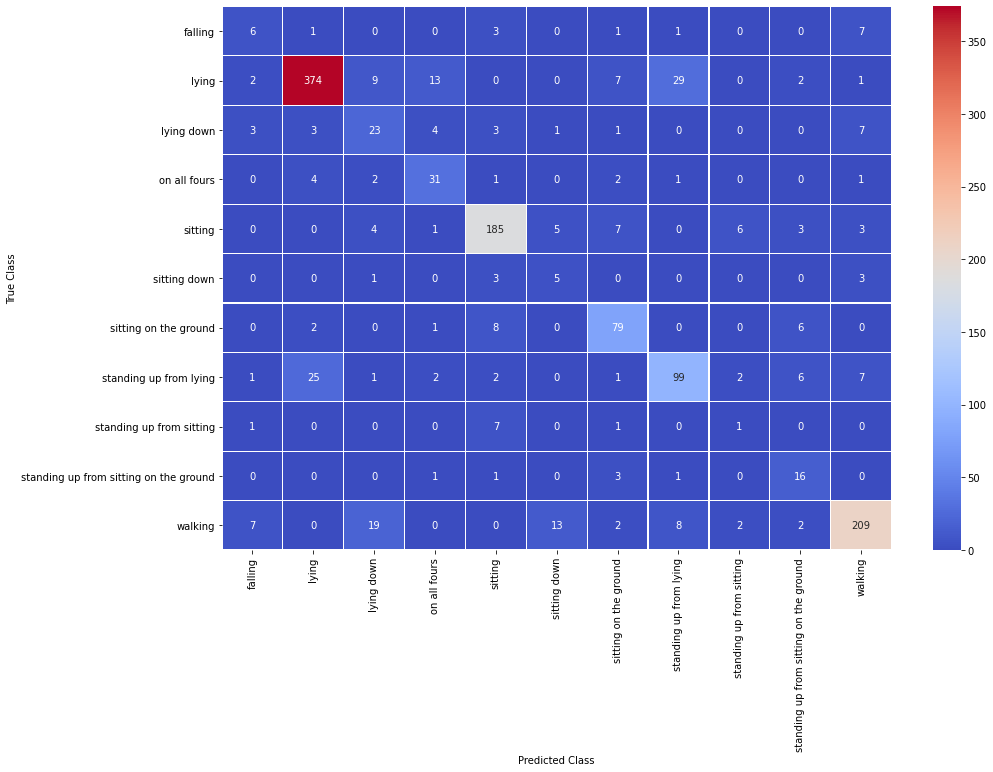

In [63]:
# 1.4. Decision Tree - Reference+Body Attributes
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
criterion = ['gini', 'entropy']
max_depth = list(np.arange(2,41,2))
max_depth.append(None)
param_grid = {'criterion':criterion, 'max_depth':max_depth}
dtc_RA_BA = DecisionTreeClassifier(random_state=42)
dtc_RA_BA_cv = GridSearchCV(dtc_RA_BA, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
dtc_RA_BA_cv.fit(X_train_RA_BA_scaled_smote, y_RA_BA_smote)
print('Decision Tree Classifier on Reference and Body Attributes')
print('Cross Validation Accuracy:', dtc_RA_BA_cv.best_score_)
print('Best parameter from Cross Validation:', dtc_RA_BA_cv.best_params_)
X_test_RA_BA_scaled = scaler_RA_BA.transform(X_test_RA_BA)
y_pred_RA_BA_dtc = dtc_RA_BA_cv.predict(X_test_RA_BA_scaled)
print('Accuracy:', accuracy_score(y_test_RA_BA, y_pred_RA_BA_dtc))
print('Precision for fall:', precision_score(y_test_RA_BA, y_pred_RA_BA_dtc, average=None)[0])
print('Recall for fall:', recall_score(y_test_RA_BA, y_pred_RA_BA_dtc, average=None)[0])
print('F1-score for fall:', f1_score(y_test_RA_BA, y_pred_RA_BA_dtc, average=None)[0])
_ = plt.subplots(figsize= (15,10))
_ = sns.heatmap(confusion_matrix(y_test_RA_BA, y_pred_RA_BA_dtc, labels=dtc_RA_BA_cv.classes_), 
            annot=True, fmt='d', xticklabels=dtc_RA_BA_cv.classes_, yticklabels=dtc_RA_BA_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

Decision Tree Classifier on Reference and Angle Attributes
Cross Validation Accuracy: 0.9372657876474669
Best parameter from Cross Validation: {'criterion': 'entropy', 'max_depth': 16}
Accuracy: 0.7754789272030651
Precision for fall: 0.23333333333333334
Recall for fall: 0.3684210526315789
F1-score for fall: 0.2857142857142857


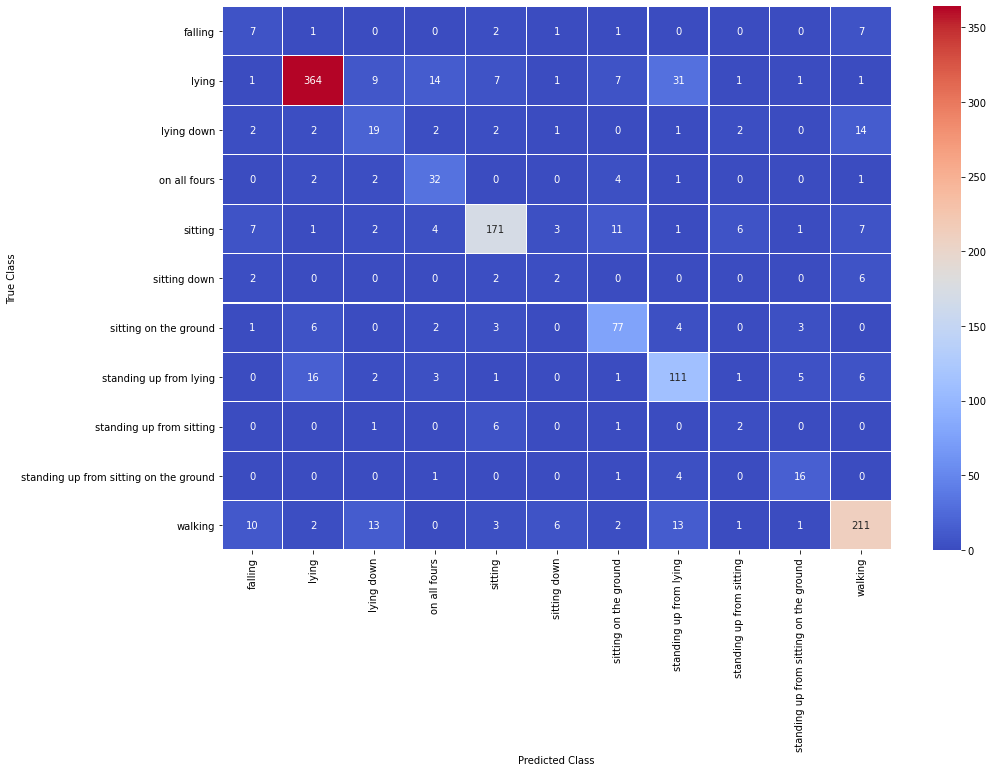

In [64]:
# 1.5. Decision Tree - Reference+Angle Attributes
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
criterion = ['gini', 'entropy']
max_depth = list(np.arange(2,41,2))
max_depth.append(None)
param_grid = {'criterion':criterion, 'max_depth':max_depth}
dtc_RA_AA = DecisionTreeClassifier(random_state=42)
dtc_RA_AA_cv = GridSearchCV(dtc_RA_AA, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
dtc_RA_AA_cv.fit(X_train_RA_AA_scaled_smote, y_RA_AA_smote)
print('Decision Tree Classifier on Reference and Angle Attributes')
print('Cross Validation Accuracy:', dtc_RA_AA_cv.best_score_)
print('Best parameter from Cross Validation:', dtc_RA_AA_cv.best_params_)
X_test_RA_AA_scaled = scaler_RA_AA.transform(X_test_RA_AA)
y_pred_RA_AA_dtc = dtc_RA_AA_cv.predict(X_test_RA_AA_scaled)
print('Accuracy:', accuracy_score(y_test_RA_AA, y_pred_RA_AA_dtc))
print('Precision for fall:', precision_score(y_test_RA_AA, y_pred_RA_AA_dtc, average=None)[0])
print('Recall for fall:', recall_score(y_test_RA_AA, y_pred_RA_AA_dtc, average=None)[0])
print('F1-score for fall:', f1_score(y_test_RA_AA, y_pred_RA_AA_dtc, average=None)[0])
_ = plt.subplots(figsize= (15,10))
_ = sns.heatmap(confusion_matrix(y_test_RA_AA, y_pred_RA_AA_dtc, labels=dtc_RA_AA_cv.classes_), 
            annot=True, fmt='d', xticklabels=dtc_RA_AA_cv.classes_, yticklabels=dtc_RA_AA_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

Decision Tree Classifier on Body and Angle Attributes
Cross Validation Accuracy: 0.9169326856349758
Best parameter from Cross Validation: {'criterion': 'entropy', 'max_depth': 16}
Accuracy: 0.7026819923371648
Precision for fall: 0.17857142857142858
Recall for fall: 0.2631578947368421
F1-score for fall: 0.2127659574468085


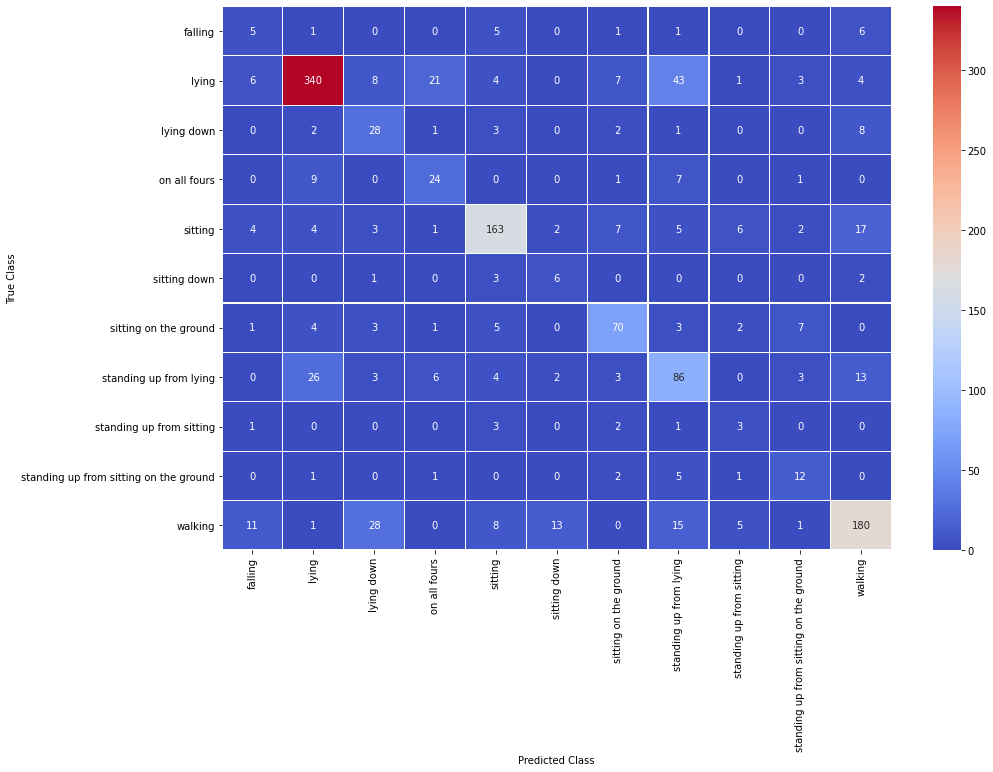

In [65]:
# 1.6. Decision Tree - Body+Angle Attributes
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
criterion = ['gini', 'entropy']
max_depth = list(np.arange(2,41,2))
max_depth.append(None)
param_grid = {'criterion':criterion, 'max_depth':max_depth}
dtc_BA_AA = DecisionTreeClassifier(random_state=42)
dtc_BA_AA_cv = GridSearchCV(dtc_BA_AA, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
dtc_BA_AA_cv.fit(X_train_BA_AA_scaled_smote, y_BA_AA_smote)
print('Decision Tree Classifier on Body and Angle Attributes')
print('Cross Validation Accuracy:', dtc_BA_AA_cv.best_score_)
print('Best parameter from Cross Validation:', dtc_BA_AA_cv.best_params_)
X_test_BA_AA_scaled = scaler_BA_AA.transform(X_test_BA_AA)
y_pred_BA_AA_dtc = dtc_BA_AA_cv.predict(X_test_BA_AA_scaled)
print('Accuracy:', accuracy_score(y_test_BA_AA, y_pred_BA_AA_dtc))
print('Precision for fall:', precision_score(y_test_BA_AA, y_pred_BA_AA_dtc, average=None)[0])
print('Recall for fall:', recall_score(y_test_BA_AA, y_pred_BA_AA_dtc, average=None)[0])
print('F1-score for fall:', f1_score(y_test_BA_AA, y_pred_BA_AA_dtc, average=None)[0])
_ = plt.subplots(figsize= (15,10))
_ = sns.heatmap(confusion_matrix(y_test_BA_AA, y_pred_BA_AA_dtc, labels=dtc_BA_AA_cv.classes_), 
            annot=True, fmt='d', xticklabels=dtc_BA_AA_cv.classes_, yticklabels=dtc_BA_AA_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

Decision Tree Classifier on All Attributes
Cross Validation Accuracy: 0.9402498265093685
Best parameter from Cross Validation: {'criterion': 'entropy', 'max_depth': 20}
Accuracy: 0.7908045977011494
Precision for fall: 0.3333333333333333
Recall for fall: 0.47368421052631576
F1-score for fall: 0.391304347826087


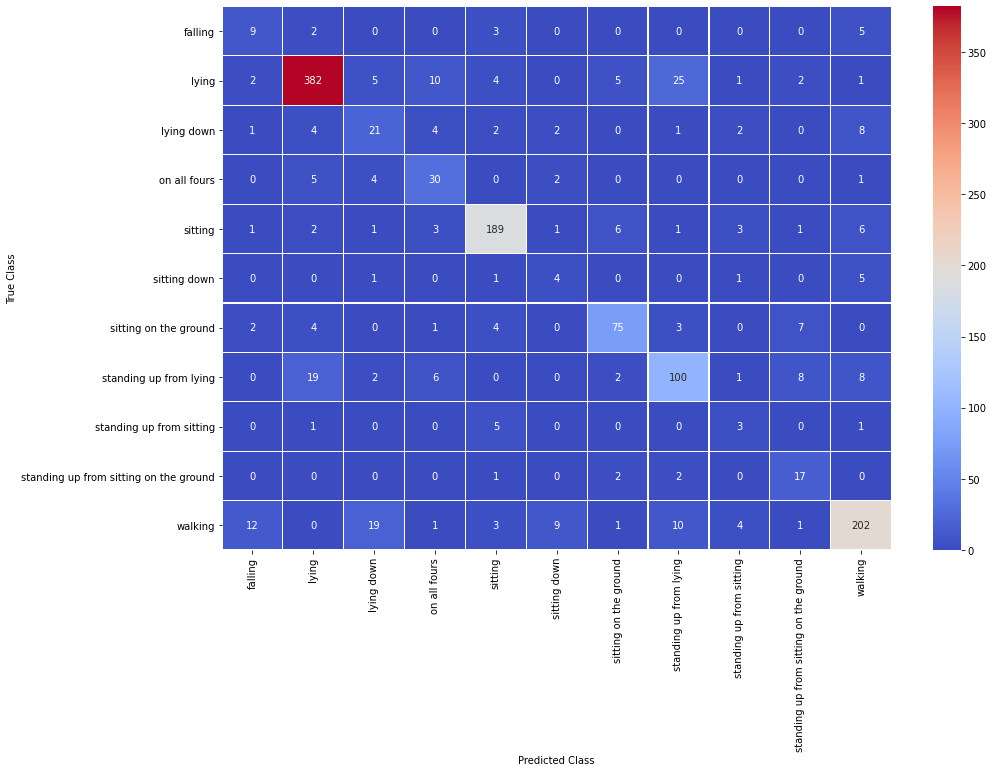

In [66]:
# 1.7. Decision Tree - All Attributes
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
criterion = ['gini', 'entropy']
max_depth = list(np.arange(2,41,2))
max_depth.append(None)
param_grid = {'criterion':criterion, 'max_depth':max_depth}
dtc_RA_BA_AA = DecisionTreeClassifier(random_state=42)
dtc_RA_BA_AA_cv = GridSearchCV(dtc_RA_BA_AA, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
dtc_RA_BA_AA_cv.fit(X_train_RA_BA_AA_scaled_smote, y_RA_BA_AA_smote)
print('Decision Tree Classifier on All Attributes')
print('Cross Validation Accuracy:', dtc_RA_BA_AA_cv.best_score_)
print('Best parameter from Cross Validation:', dtc_RA_BA_AA_cv.best_params_)
X_test_RA_BA_AA_scaled = scaler_RA_BA_AA.transform(X_test_RA_BA_AA)
y_pred_RA_BA_AA_dtc = dtc_RA_BA_AA_cv.predict(X_test_RA_BA_AA_scaled)
print('Accuracy:', accuracy_score(y_test_RA_BA_AA, y_pred_RA_BA_AA_dtc))
print('Precision for fall:', precision_score(y_test_RA_BA_AA, y_pred_RA_BA_AA_dtc, average=None)[0])
print('Recall for fall:', recall_score(y_test_RA_BA_AA, y_pred_RA_BA_AA_dtc, average=None)[0])
print('F1-score for fall:', f1_score(y_test_RA_BA_AA, y_pred_RA_BA_AA_dtc, average=None)[0])
_ = plt.subplots(figsize= (15,10))
_ = sns.heatmap(confusion_matrix(y_test_RA_BA_AA, y_pred_RA_BA_AA_dtc, labels=dtc_RA_BA_AA_cv.classes_), 
            annot=True, fmt='d', xticklabels=dtc_RA_BA_AA_cv.classes_, yticklabels=dtc_RA_BA_AA_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

## 2. K-Nearest Neighbor

K-Nearest Neighbors on Reference Attributes
Cross Validation Accuracy: 0.9870922970159611
Best parameter from Cross Validation: {'n_neighbors': 1}
Accuracy: 0.8628352490421456
Precision for fall: 0.35
Recall for fall: 0.3684210526315789
F1-score for fall: 0.358974358974359


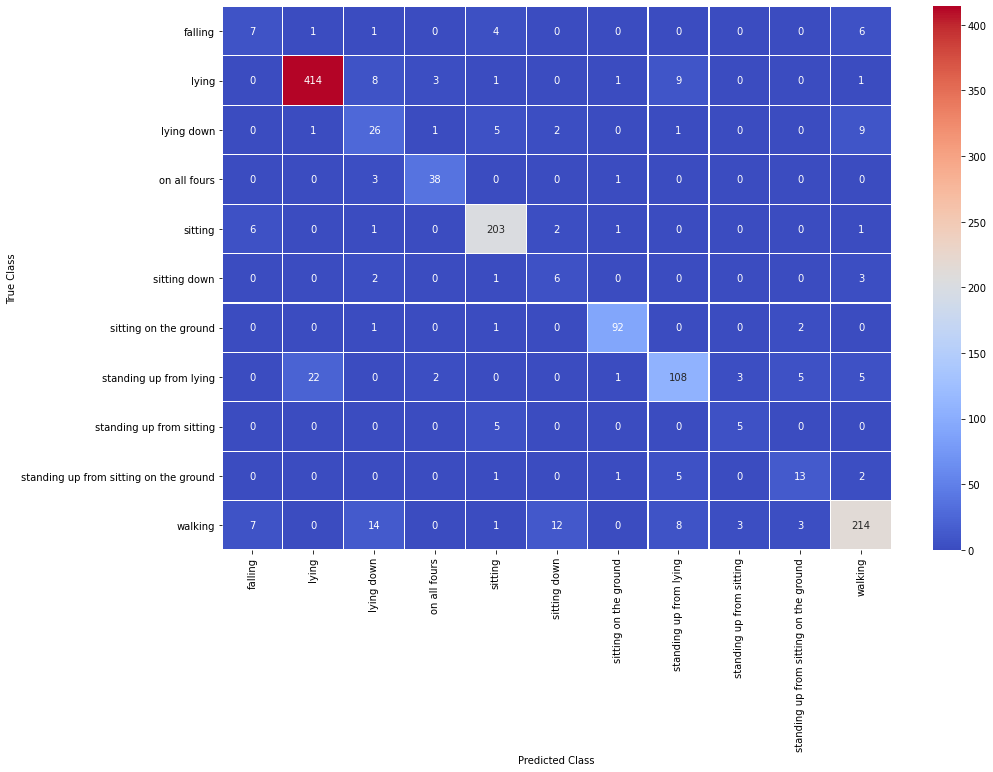

In [67]:
# 2.1. KNN - Referenece Attributes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
n_neighbors = list(np.arange(1,21,1))
param_grid = {'n_neighbors':n_neighbors}
knn_RA = KNeighborsClassifier()
knn_RA_cv = GridSearchCV(knn_RA, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
knn_RA_cv.fit(X_train_RA_scaled_smote, y_RA_smote)
print('K-Nearest Neighbors on Reference Attributes')
print('Cross Validation Accuracy:', knn_RA_cv.best_score_)
print('Best parameter from Cross Validation:', knn_RA_cv.best_params_)
X_test_RA_scaled = scaler_RA.transform(X_test_RA)
y_pred_RA_knn = knn_RA_cv.predict(X_test_RA_scaled)
print('Accuracy:', accuracy_score(y_test_RA, y_pred_RA_knn))
print('Precision for fall:', precision_score(y_test_RA, y_pred_RA_knn, average=None)[0])
print('Recall for fall:', recall_score(y_test_RA, y_pred_RA_knn, average=None)[0])
print('F1-score for fall:', f1_score(y_test_RA, y_pred_RA_knn, average=None)[0])
_ = plt.subplots(figsize= (15,10))
_ = sns.heatmap(confusion_matrix(y_test_RA, y_pred_RA_knn, labels=knn_RA_cv.classes_), 
            annot=True, fmt='d', xticklabels=knn_RA_cv.classes_, yticklabels=knn_RA_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

K-Nearest Neighbors on Body Attributes
Cross Validation Accuracy: 0.9830673143650243
Best parameter from Cross Validation: {'n_neighbors': 1}
Accuracy: 0.8375478927203065
Precision for fall: 0.3333333333333333
Recall for fall: 0.3684210526315789
F1-score for fall: 0.35


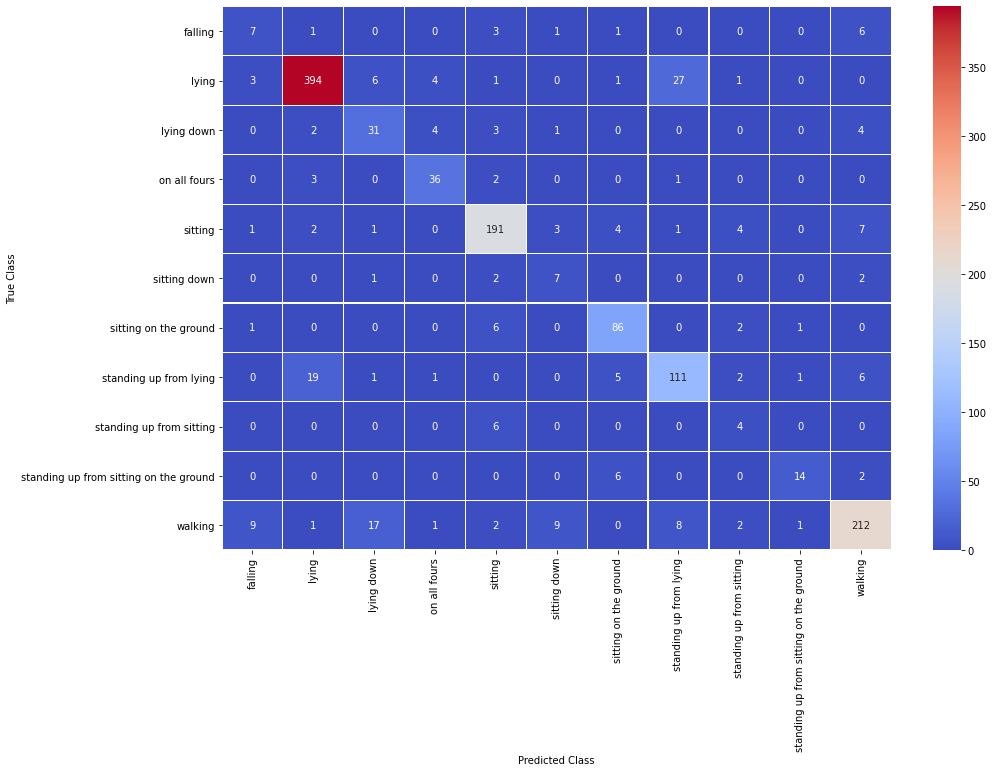

In [68]:
# 2.2. KNN - Body Attributes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
n_neighbors = list(np.arange(1,21,1))
param_grid = {'n_neighbors':n_neighbors}
knn_BA = KNeighborsClassifier()
knn_BA_cv = GridSearchCV(knn_BA, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
knn_BA_cv.fit(X_train_BA_scaled_smote, y_BA_smote)
print('K-Nearest Neighbors on Body Attributes')
print('Cross Validation Accuracy:', knn_BA_cv.best_score_)
print('Best parameter from Cross Validation:', knn_BA_cv.best_params_)
X_test_BA_scaled = scaler_BA.transform(X_test_BA)
y_pred_BA_knn = knn_BA_cv.predict(X_test_BA_scaled)
print('Accuracy:', accuracy_score(y_test_BA, y_pred_BA_knn))
print('Precision for fall:', precision_score(y_test_BA, y_pred_BA_knn, average=None)[0])
print('Recall for fall:', recall_score(y_test_BA, y_pred_BA_knn, average=None)[0])
print('F1-score for fall:', f1_score(y_test_BA, y_pred_BA_knn, average=None)[0])
_ = plt.subplots(figsize= (15,10))
_ = sns.heatmap(confusion_matrix(y_test_BA, y_pred_BA_knn, labels=knn_BA_cv.classes_), 
            annot=True, fmt='d', xticklabels=knn_BA_cv.classes_, yticklabels=knn_BA_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

K-Nearest Neighbors on Angle Attributes
Cross Validation Accuracy: 0.5265787647467037
Best parameter from Cross Validation: {'n_neighbors': 1}
Accuracy: 0.16934865900383142
Precision for fall: 0.04
Recall for fall: 0.21052631578947367
F1-score for fall: 0.06722689075630253


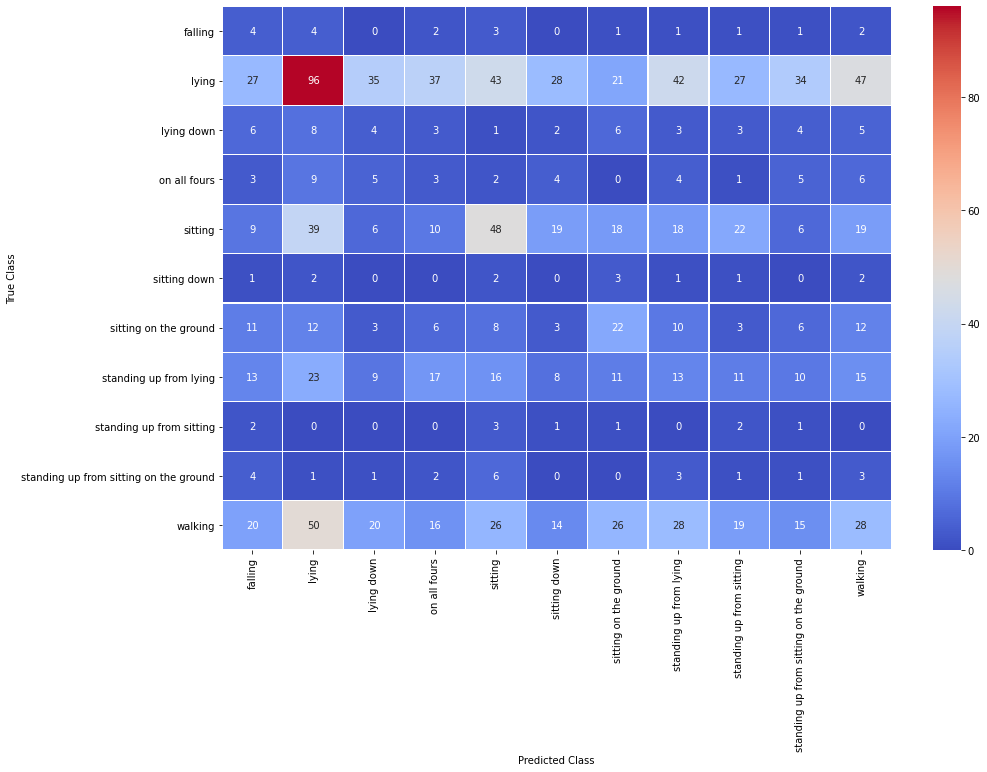

In [69]:
# 2.3. KNN - Angle Attributes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
n_neighbors = list(np.arange(1,21,1))
param_grid = {'n_neighbors':n_neighbors}
knn_AA = KNeighborsClassifier()
knn_AA_cv = GridSearchCV(knn_AA, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
knn_AA_cv.fit(X_train_AA_scaled_smote, y_AA_smote)
print('K-Nearest Neighbors on Angle Attributes')
print('Cross Validation Accuracy:', knn_AA_cv.best_score_)
print('Best parameter from Cross Validation:', knn_AA_cv.best_params_)
X_test_AA_scaled = scaler_AA.transform(X_test_AA)
y_pred_AA_knn = knn_AA_cv.predict(X_test_AA_scaled)
print('Accuracy:', accuracy_score(y_test_AA, y_pred_AA_knn))
print('Precision for fall:', precision_score(y_test_AA, y_pred_AA_knn, average=None)[0])
print('Recall for fall:', recall_score(y_test_AA, y_pred_AA_knn, average=None)[0])
print('F1-score for fall:', f1_score(y_test_AA, y_pred_AA_knn, average=None)[0])
_ = plt.subplots(figsize= (15,10))
_ = sns.heatmap(confusion_matrix(y_test_AA, y_pred_AA_knn, labels=knn_AA_cv.classes_), 
            annot=True, fmt='d', xticklabels=knn_AA_cv.classes_, yticklabels=knn_AA_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

K-Nearest Neighbors on Reference and Body Attributes
Cross Validation Accuracy: 0.988619014573213
Best parameter from Cross Validation: {'n_neighbors': 1}
Accuracy: 0.8835249042145594
Precision for fall: 0.47368421052631576
Recall for fall: 0.47368421052631576
F1-score for fall: 0.47368421052631576


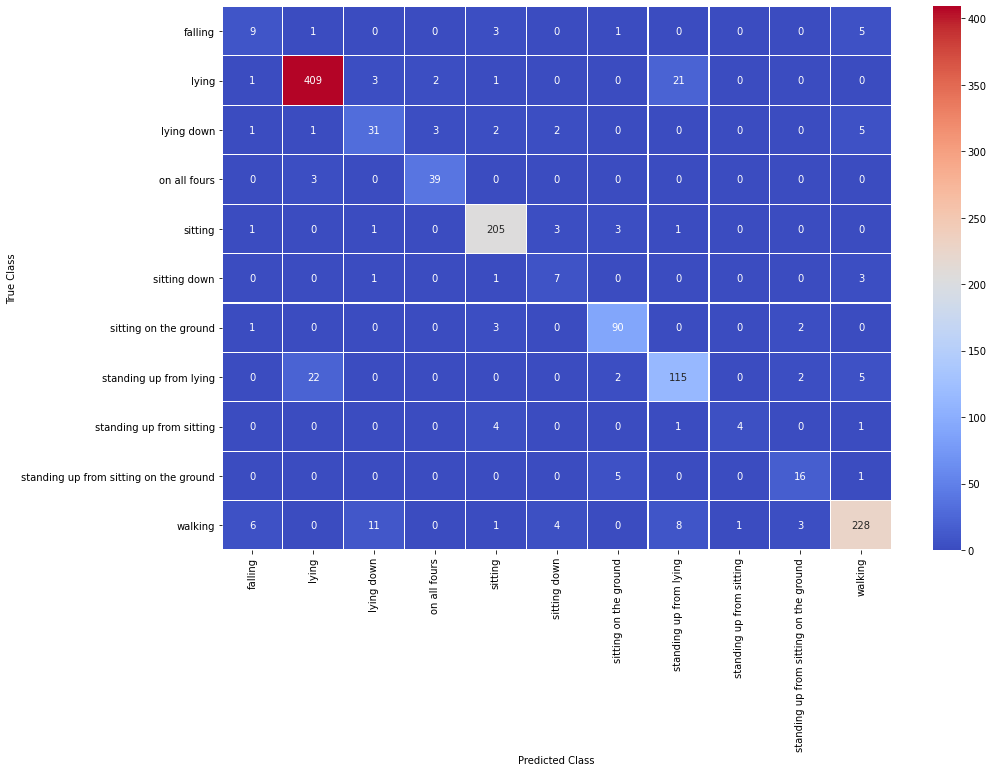

In [70]:
# 2.4. KNN - Reference+Body Attributes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
n_neighbors = list(np.arange(1,21,1))
param_grid = {'n_neighbors':n_neighbors}
knn_RA_BA = KNeighborsClassifier()
knn_RA_BA_cv = GridSearchCV(knn_RA_BA, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
knn_RA_BA_cv.fit(X_train_RA_BA_scaled_smote, y_RA_BA_smote)
print('K-Nearest Neighbors on Reference and Body Attributes')
print('Cross Validation Accuracy:', knn_RA_BA_cv.best_score_)
print('Best parameter from Cross Validation:', knn_RA_BA_cv.best_params_)
X_test_RA_BA_scaled = scaler_RA_BA.transform(X_test_RA_BA)
y_pred_RA_BA_knn = knn_RA_BA_cv.predict(X_test_RA_BA_scaled)
print('Accuracy:', accuracy_score(y_test_RA_BA, y_pred_RA_BA_knn))
print('Precision for fall:', precision_score(y_test_RA_BA, y_pred_RA_BA_knn, average=None)[0])
print('Recall for fall:', recall_score(y_test_RA_BA, y_pred_RA_BA_knn, average=None)[0])
print('F1-score for fall:', f1_score(y_test_RA_BA, y_pred_RA_BA_knn, average=None)[0])
_ = plt.subplots(figsize= (15,10))
_ = sns.heatmap(confusion_matrix(y_test_RA_BA, y_pred_RA_BA_knn, labels=knn_RA_BA_cv.classes_), 
            annot=True, fmt='d', xticklabels=knn_RA_BA_cv.classes_, yticklabels=knn_RA_BA_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

K-Nearest Neighbors on Reference and Angle Attributes
Cross Validation Accuracy: 0.9873004857737682
Best parameter from Cross Validation: {'n_neighbors': 1}
Accuracy: 0.8559386973180076
Precision for fall: 0.3333333333333333
Recall for fall: 0.42105263157894735
F1-score for fall: 0.372093023255814


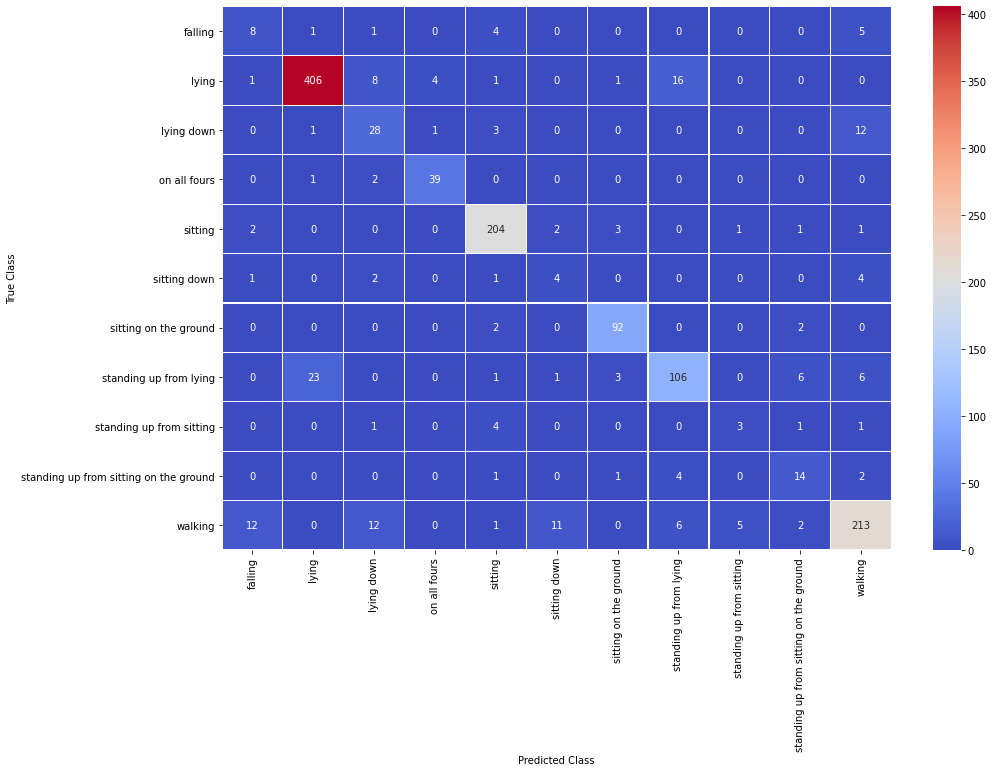

In [71]:
# 2.5. KNN - Reference+Angle Attributes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
n_neighbors = list(np.arange(1,21,1))
param_grid = {'n_neighbors':n_neighbors}
knn_RA_AA = KNeighborsClassifier()
knn_RA_AA_cv = GridSearchCV(knn_RA_AA, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
knn_RA_AA_cv.fit(X_train_RA_AA_scaled_smote, y_RA_AA_smote)
print('K-Nearest Neighbors on Reference and Angle Attributes')
print('Cross Validation Accuracy:', knn_RA_AA_cv.best_score_)
print('Best parameter from Cross Validation:', knn_RA_AA_cv.best_params_)
X_test_RA_AA_scaled = scaler_RA_AA.transform(X_test_RA_AA)
y_pred_RA_AA_knn = knn_RA_AA_cv.predict(X_test_RA_AA_scaled)
print('Accuracy:', accuracy_score(y_test_RA_AA, y_pred_RA_AA_knn))
print('Precision for fall:', precision_score(y_test_RA_AA, y_pred_RA_AA_knn, average=None)[0])
print('Recall for fall:', recall_score(y_test_RA_AA, y_pred_RA_AA_knn, average=None)[0])
print('F1-score for fall:', f1_score(y_test_RA_AA, y_pred_RA_AA_knn, average=None)[0])
_ = plt.subplots(figsize= (15,10))
_ = sns.heatmap(confusion_matrix(y_test_RA_AA, y_pred_RA_AA_knn, labels=knn_RA_AA_cv.classes_), 
            annot=True, fmt='d', xticklabels=knn_RA_AA_cv.classes_, yticklabels=knn_RA_AA_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

K-Nearest Neighbors on Body and Angle Attributes
Cross Validation Accuracy: 0.9830673143650243
Best parameter from Cross Validation: {'n_neighbors': 1}
Accuracy: 0.8505747126436781
Precision for fall: 0.5
Recall for fall: 0.3684210526315789
F1-score for fall: 0.4242424242424242


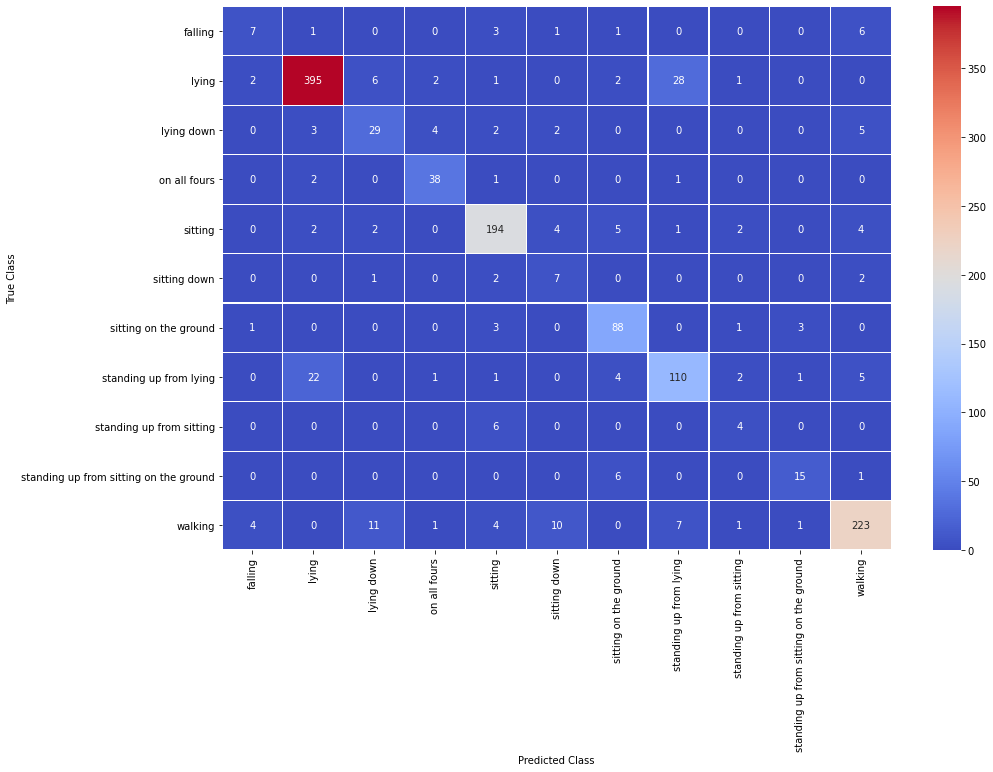

In [72]:
# 2.6. KNN - Body+Angle Attributes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
n_neighbors = list(np.arange(1,21,1))
param_grid = {'n_neighbors':n_neighbors}
knn_BA_AA = KNeighborsClassifier()
knn_BA_AA_cv = GridSearchCV(knn_BA_AA, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
knn_BA_AA_cv.fit(X_train_BA_AA_scaled_smote, y_BA_AA_smote)
print('K-Nearest Neighbors on Body and Angle Attributes')
print('Cross Validation Accuracy:', knn_BA_AA_cv.best_score_)
print('Best parameter from Cross Validation:', knn_BA_AA_cv.best_params_)
X_test_BA_AA_scaled = scaler_BA_AA.transform(X_test_BA_AA)
y_pred_BA_AA_knn = knn_BA_AA_cv.predict(X_test_BA_AA_scaled)
print('Accuracy:', accuracy_score(y_test_BA_AA, y_pred_BA_AA_knn))
print('Precision for fall:', precision_score(y_test_BA_AA, y_pred_BA_AA_knn, average=None)[0])
print('Recall for fall:', recall_score(y_test_BA_AA, y_pred_BA_AA_knn, average=None)[0])
print('F1-score for fall:', f1_score(y_test_BA_AA, y_pred_BA_AA_knn, average=None)[0])
_ = plt.subplots(figsize= (15,10))
_ = sns.heatmap(confusion_matrix(y_test_BA_AA, y_pred_BA_AA_knn, labels=knn_BA_AA_cv.classes_), 
            annot=True, fmt='d', xticklabels=knn_BA_AA_cv.classes_, yticklabels=knn_BA_AA_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

K-Nearest Neighbors on All Attributes
Cross Validation Accuracy: 0.9881332408049965
Best parameter from Cross Validation: {'n_neighbors': 1}
Accuracy: 0.878927203065134
Precision for fall: 0.3684210526315789
Recall for fall: 0.3684210526315789
F1-score for fall: 0.3684210526315789


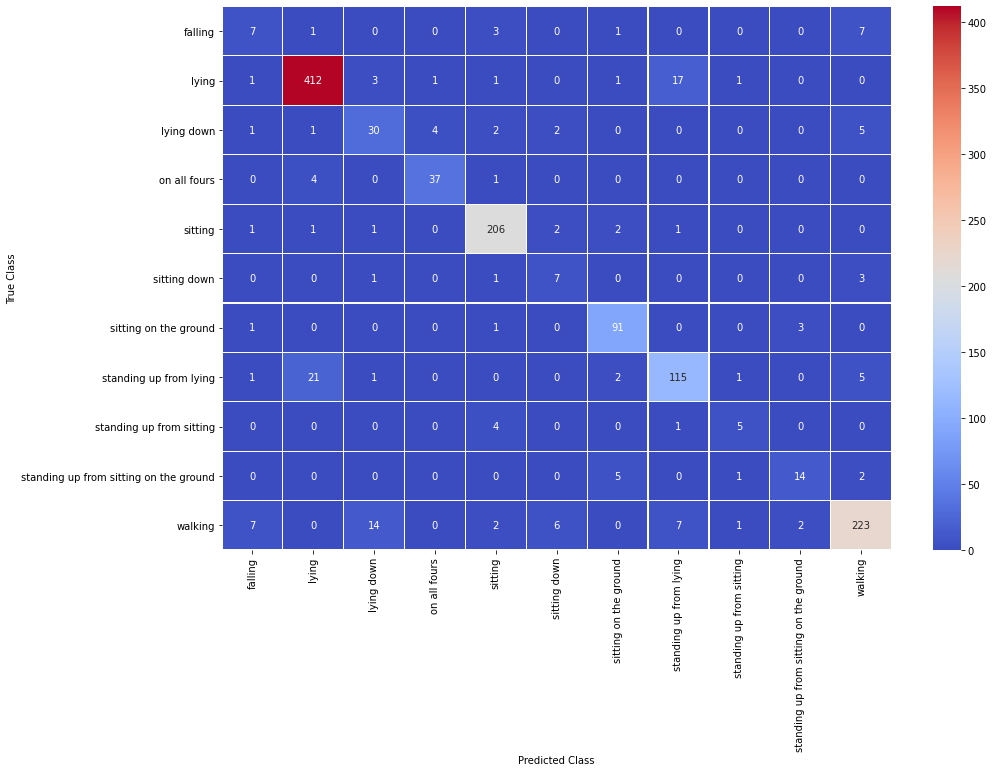

In [73]:
# 2.7. KNN - Reference+Body+Angle Attributes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
n_neighbors = list(np.arange(1,21,1))
param_grid = {'n_neighbors':n_neighbors}
knn_RA_BA_AA = KNeighborsClassifier()
knn_RA_BA_AA_cv = GridSearchCV(knn_RA_BA_AA, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
knn_RA_BA_AA_cv.fit(X_train_RA_BA_AA_scaled_smote, y_RA_BA_AA_smote)
print('K-Nearest Neighbors on All Attributes')
print('Cross Validation Accuracy:', knn_RA_BA_AA_cv.best_score_)
print('Best parameter from Cross Validation:', knn_RA_BA_AA_cv.best_params_)
X_test_RA_BA_AA_scaled = scaler_RA_BA_AA.transform(X_test_RA_BA_AA)
y_pred_RA_BA_AA_knn = knn_RA_BA_AA_cv.predict(X_test_RA_BA_AA_scaled)
print('Accuracy:', accuracy_score(y_test_RA_BA_AA, y_pred_RA_BA_AA_knn))
print('Precision for fall:', precision_score(y_test_RA_BA_AA, y_pred_RA_BA_AA_knn, average=None)[0])
print('Recall for fall:', recall_score(y_test_RA_BA_AA, y_pred_RA_BA_AA_knn, average=None)[0])
print('F1-score for fall:', f1_score(y_test_RA_BA_AA, y_pred_RA_BA_AA_knn, average=None)[0])
_ = plt.subplots(figsize= (15,10))
_ = sns.heatmap(confusion_matrix(y_test_RA_BA_AA, y_pred_RA_BA_AA_knn, labels=knn_RA_BA_AA_cv.classes_), 
            annot=True, fmt='d', xticklabels=knn_RA_BA_AA_cv.classes_, yticklabels=knn_RA_BA_AA_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

## 3. Support Vector Machine

SVM on Reference Attributes
Cross Validation Accuracy: 0.9873698820263707
Best parameter from Cross Validation: {'C': 100, 'gamma': 'scale'}
Accuracy: 0.8942528735632184
Precision for fall: 0.5294117647058824
Recall for fall: 0.47368421052631576
F1-score for fall: 0.5


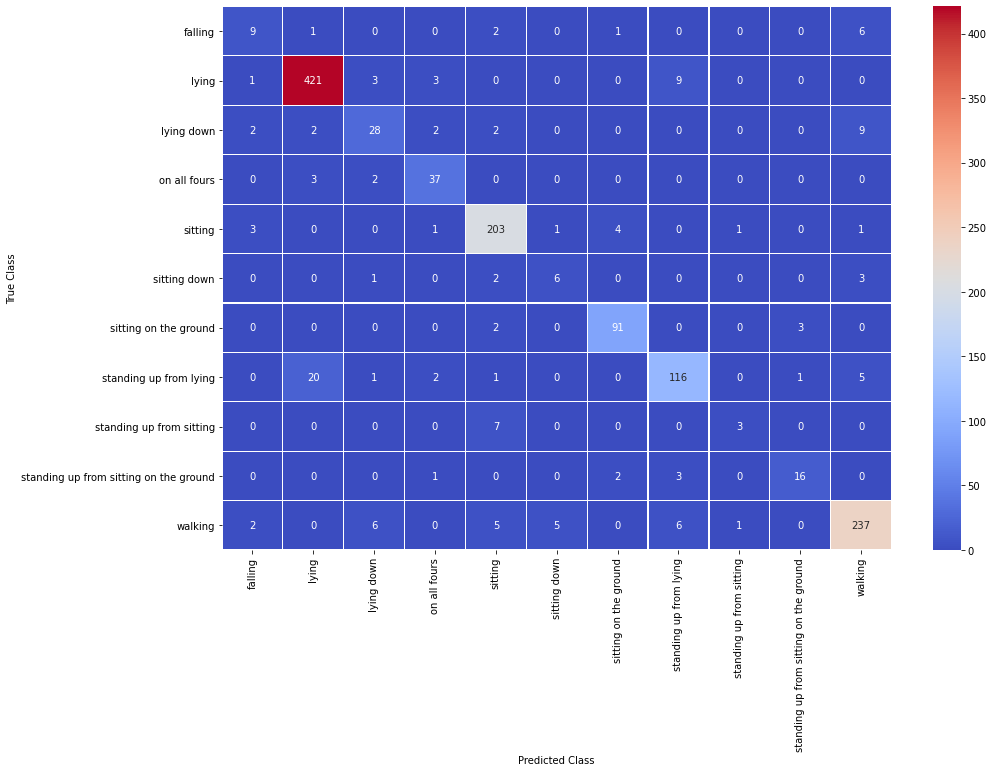

In [74]:
# 3.1. SVM - Referenece Attributes
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
C = [0.001, 0.01, 0.1, 1, 10, 100]
gamma = [.0001, .001, 0.01, 1, 'scale', 'auto']
param_grid = {'C':C, 'gamma':gamma}
svm_RA = SVC()
svm_RA_cv = GridSearchCV(svm_RA, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
svm_RA_cv.fit(X_train_RA_scaled_smote, y_RA_smote)
print('SVM on Reference Attributes')
print('Cross Validation Accuracy:', svm_RA_cv.best_score_)
print('Best parameter from Cross Validation:', svm_RA_cv.best_params_)
X_test_RA_scaled = scaler_RA.transform(X_test_RA)
y_pred_RA_svm = svm_RA_cv.predict(X_test_RA_scaled)
print('Accuracy:', accuracy_score(y_test_RA, y_pred_RA_svm))
print('Precision for fall:', precision_score(y_test_RA, y_pred_RA_svm, average=None)[0])
print('Recall for fall:', recall_score(y_test_RA, y_pred_RA_svm, average=None)[0])
print('F1-score for fall:', f1_score(y_test_RA, y_pred_RA_svm, average=None)[0])
_ = plt.subplots(figsize= (15,10))
_ = sns.heatmap(confusion_matrix(y_test_RA, y_pred_RA_svm, labels=svm_RA_cv.classes_), 
            annot=True, fmt='d', xticklabels=svm_RA_cv.classes_, yticklabels=svm_RA_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

SVM on Body Attributes
Cross Validation Accuracy: 0.9887578070784176
Best parameter from Cross Validation: {'C': 100, 'gamma': 'scale'}
Accuracy: 0.8850574712643678
Precision for fall: 0.42857142857142855
Recall for fall: 0.3157894736842105
F1-score for fall: 0.36363636363636365


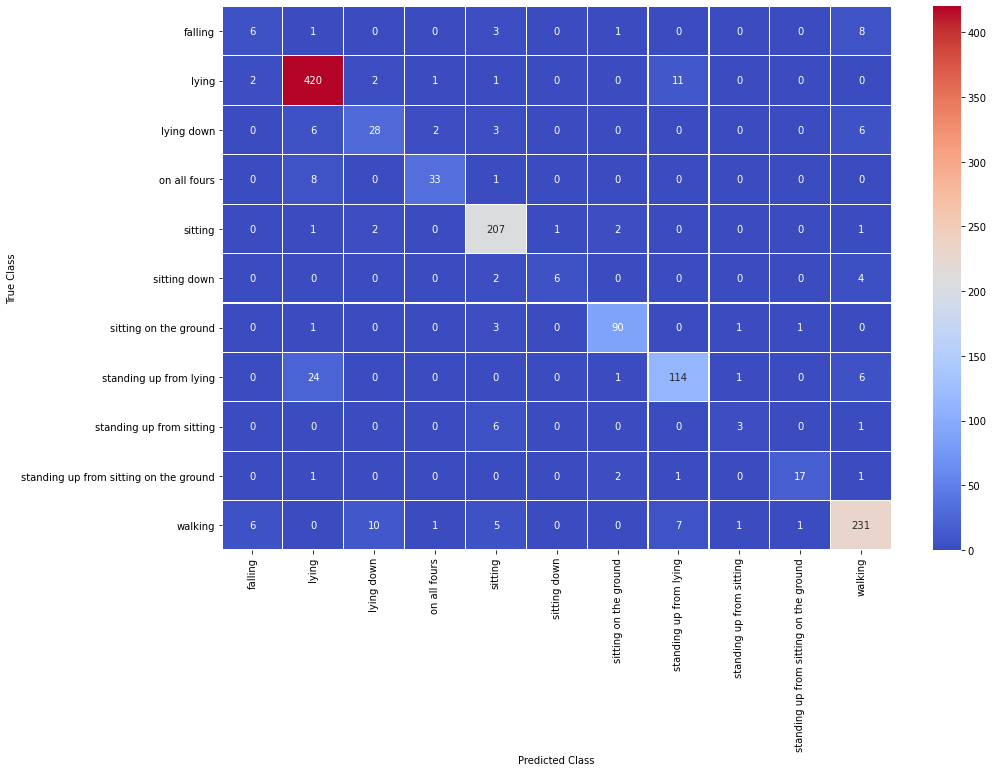

In [75]:
# 3.2. SVM - Body Attributes
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
C = [0.001, 0.01, 0.1, 1, 10, 100]
gamma = [.0001, .001, 0.01, 1, 'scale', 'auto']
param_grid = {'C':C, 'gamma':gamma}
svm_BA = SVC()
svm_BA_cv = GridSearchCV(svm_BA, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
svm_BA_cv.fit(X_train_BA_scaled_smote, y_BA_smote)
print('SVM on Body Attributes')
print('Cross Validation Accuracy:', svm_BA_cv.best_score_)
print('Best parameter from Cross Validation:', svm_BA_cv.best_params_)
X_test_BA_scaled = scaler_BA.transform(X_test_BA)
y_pred_BA_svm = svm_BA_cv.predict(X_test_BA_scaled)
print('Accuracy:', accuracy_score(y_test_BA, y_pred_BA_svm))
print('Precision for fall:', precision_score(y_test_BA, y_pred_BA_svm, average=None)[0])
print('Recall for fall:', recall_score(y_test_BA, y_pred_BA_svm, average=None)[0])
print('F1-score for fall:', f1_score(y_test_BA, y_pred_BA_svm, average=None)[0])
_ = plt.subplots(figsize= (15,10))
_ = sns.heatmap(confusion_matrix(y_test_BA, y_pred_BA_svm, labels=svm_BA_cv.classes_), 
            annot=True, fmt='d', xticklabels=svm_BA_cv.classes_, yticklabels=svm_BA_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

SVM on Angle Attributes
Cross Validation Accuracy: 0.2968077723802915
Best parameter from Cross Validation: {'C': 100, 'gamma': 1}
Accuracy: 0.10268199233716475
Precision for fall: 0.01694915254237288
Recall for fall: 0.10526315789473684
F1-score for fall: 0.029197080291970802


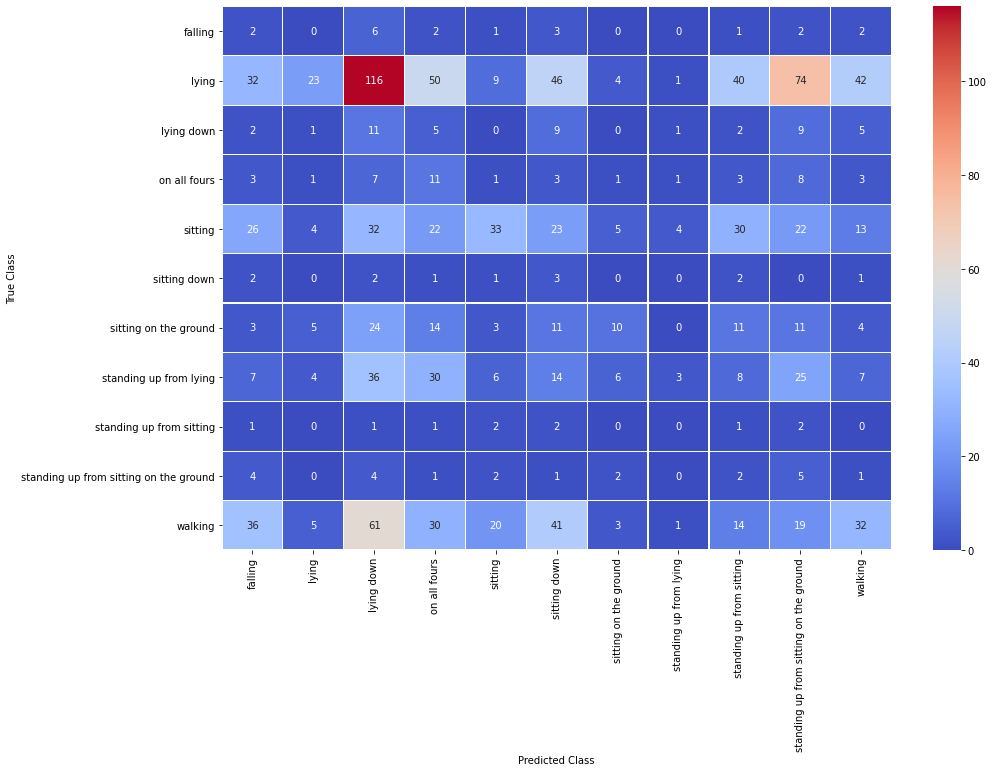

In [76]:
# 3.3. SVM - Angle Attributes
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
C = [0.001, 0.01, 0.1, 1, 10, 100]
gamma = [.0001, .001, 0.01, 1, 'scale', 'auto']
param_grid = {'C':C, 'gamma':gamma}
svm_AA = SVC()
svm_AA_cv = GridSearchCV(svm_AA, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
svm_AA_cv.fit(X_train_AA_scaled_smote, y_AA_smote)
print('SVM on Angle Attributes')
print('Cross Validation Accuracy:', svm_AA_cv.best_score_)
print('Best parameter from Cross Validation:', svm_AA_cv.best_params_)
X_test_AA_scaled = scaler_AA.transform(X_test_AA)
y_pred_AA_svm = svm_AA_cv.predict(X_test_AA_scaled)
print('Accuracy:', accuracy_score(y_test_AA, y_pred_AA_svm))
print('Precision for fall:', precision_score(y_test_AA, y_pred_AA_svm, average=None)[0])
print('Recall for fall:', recall_score(y_test_AA, y_pred_AA_svm, average=None)[0])
print('F1-score for fall:', f1_score(y_test_AA, y_pred_AA_svm, average=None)[0])
_ = plt.subplots(figsize= (15,10))
_ = sns.heatmap(confusion_matrix(y_test_AA, y_pred_AA_svm, labels=svm_AA_cv.classes_), 
            annot=True, fmt='d', xticklabels=svm_AA_cv.classes_, yticklabels=svm_AA_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

SVM on Reference and Body Attributes
Cross Validation Accuracy: 0.9909784871616933
Best parameter from Cross Validation: {'C': 100, 'gamma': 'scale'}
Accuracy: 0.90727969348659
Precision for fall: 0.5384615384615384
Recall for fall: 0.3684210526315789
F1-score for fall: 0.4375


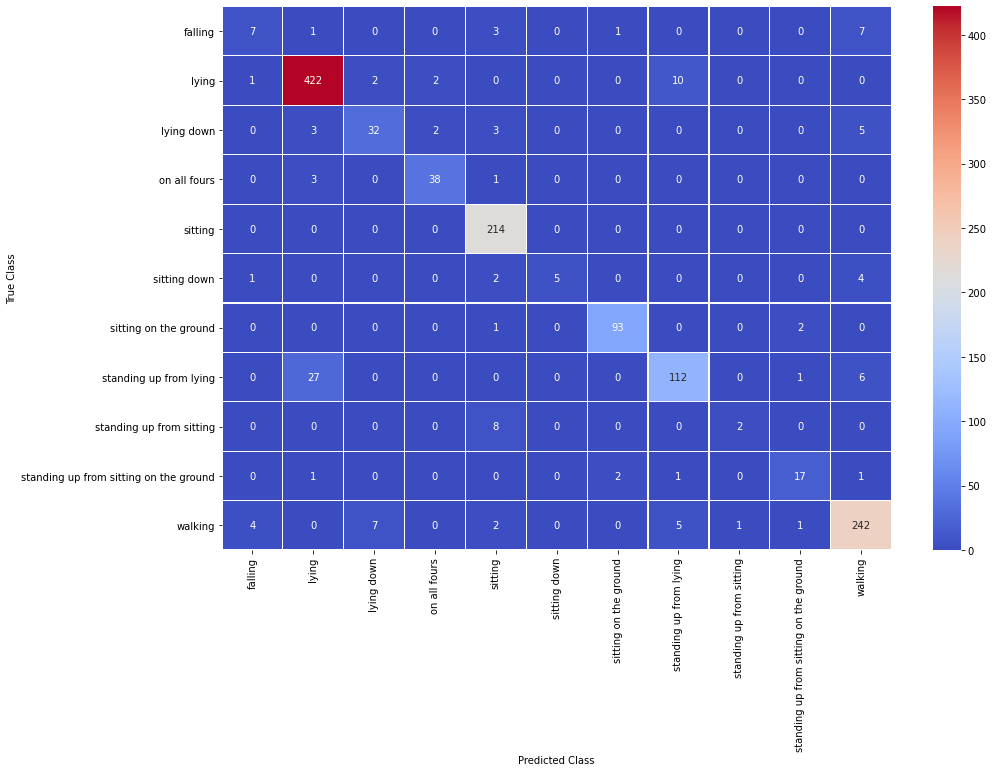

In [77]:
# 3.4. SVM - Reference+Body Attributes
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
C = [0.001, 0.01, 0.1, 1, 10, 100]
gamma = [.0001, .001, 0.01, 1, 'scale', 'auto']
param_grid = {'C':C, 'gamma':gamma}
svm_RA_BA = SVC()
svm_RA_BA_cv = GridSearchCV(svm_RA_BA, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
svm_RA_BA_cv.fit(X_train_RA_BA_scaled_smote, y_RA_BA_smote)
print('SVM on Reference and Body Attributes')
print('Cross Validation Accuracy:', svm_RA_BA_cv.best_score_)
print('Best parameter from Cross Validation:', svm_RA_BA_cv.best_params_)
X_test_RA_BA_scaled = scaler_RA_BA.transform(X_test_RA_BA)
y_pred_RA_BA_svm = svm_RA_BA_cv.predict(X_test_RA_BA_scaled)
print('Accuracy:', accuracy_score(y_test_RA_BA, y_pred_RA_BA_svm))
print('Precision for fall:', precision_score(y_test_RA_BA, y_pred_RA_BA_svm, average=None)[0])
print('Recall for fall:', recall_score(y_test_RA_BA, y_pred_RA_BA_svm, average=None)[0])
print('F1-score for fall:', f1_score(y_test_RA_BA, y_pred_RA_BA_svm, average=None)[0])
_ = plt.subplots(figsize= (15,10))
_ = sns.heatmap(confusion_matrix(y_test_RA_BA, y_pred_RA_BA_svm, labels=svm_RA_BA_cv.classes_), 
            annot=True, fmt='d', xticklabels=svm_RA_BA_cv.classes_, yticklabels=svm_RA_BA_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

SVM on Reference and Angle Attributes
Cross Validation Accuracy: 0.987439278278973
Best parameter from Cross Validation: {'C': 100, 'gamma': 'scale'}
Accuracy: 0.8957854406130268
Precision for fall: 0.5333333333333333
Recall for fall: 0.42105263157894735
F1-score for fall: 0.47058823529411764


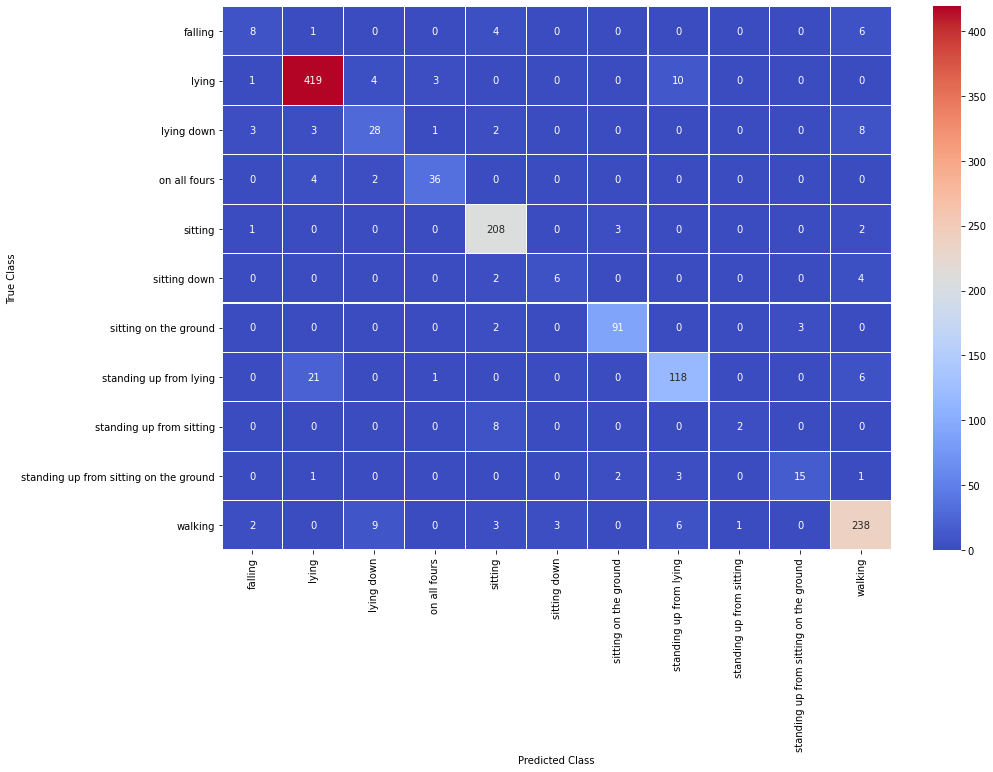

In [78]:
# 3.5. SVM - Reference+Angle Attributes
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
C = [0.001, 0.01, 0.1, 1, 10, 100]
gamma = [.0001, .001, 0.01, 1, 'scale', 'auto']
param_grid = {'C':C, 'gamma':gamma}
svm_RA_AA = SVC()
svm_RA_AA_cv = GridSearchCV(svm_RA_AA, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
svm_RA_AA_cv.fit(X_train_RA_AA_scaled_smote, y_RA_AA_smote)
print('SVM on Reference and Angle Attributes')
print('Cross Validation Accuracy:', svm_RA_AA_cv.best_score_)
print('Best parameter from Cross Validation:', svm_RA_AA_cv.best_params_)
X_test_RA_AA_scaled = scaler_RA_AA.transform(X_test_RA_AA)
y_pred_RA_AA_svm = svm_RA_AA_cv.predict(X_test_RA_AA_scaled)
print('Accuracy:', accuracy_score(y_test_RA_AA, y_pred_RA_AA_svm))
print('Precision for fall:', precision_score(y_test_RA_AA, y_pred_RA_AA_svm, average=None)[0])
print('Recall for fall:', recall_score(y_test_RA_AA, y_pred_RA_AA_svm, average=None)[0])
print('F1-score for fall:', f1_score(y_test_RA_AA, y_pred_RA_AA_svm, average=None)[0])
_ = plt.subplots(figsize= (15,10))
_ = sns.heatmap(confusion_matrix(y_test_RA_AA, y_pred_RA_AA_svm, labels=svm_RA_AA_cv.classes_), 
            annot=True, fmt='d', xticklabels=svm_RA_AA_cv.classes_, yticklabels=svm_RA_AA_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

SVM on Body and Angle Attributes
Cross Validation Accuracy: 0.989590562109646
Best parameter from Cross Validation: {'C': 100, 'gamma': 'auto'}
Accuracy: 0.8888888888888888
Precision for fall: 0.46153846153846156
Recall for fall: 0.3157894736842105
F1-score for fall: 0.37499999999999994


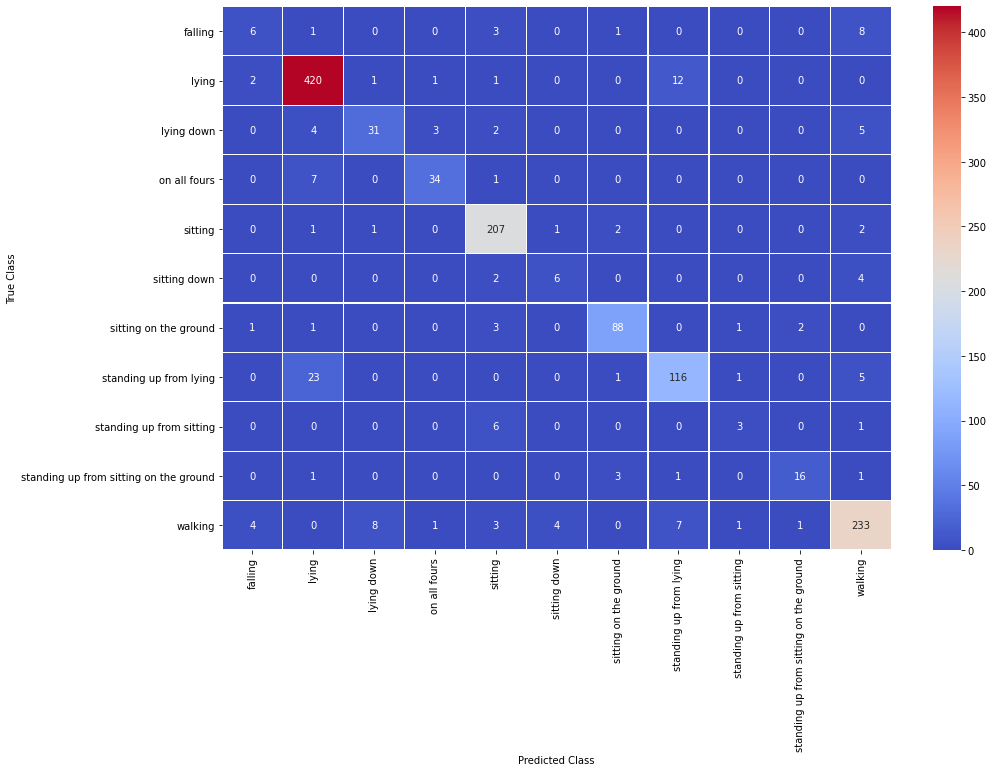

In [79]:
# 3.6. SVM - Body+Angle Attributes
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
C = [0.001, 0.01, 0.1, 1, 10, 100]
gamma = [.0001, .001, 0.01, 1, 'scale', 'auto']
param_grid = {'C':C, 'gamma':gamma}
svm_BA_AA = SVC()
svm_BA_AA_cv = GridSearchCV(svm_BA_AA, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
svm_BA_AA_cv.fit(X_train_BA_AA_scaled_smote, y_BA_AA_smote)
print('SVM on Body and Angle Attributes')
print('Cross Validation Accuracy:', svm_BA_AA_cv.best_score_)
print('Best parameter from Cross Validation:', svm_BA_AA_cv.best_params_)
X_test_BA_AA_scaled = scaler_BA_AA.transform(X_test_BA_AA)
y_pred_BA_AA_svm = svm_BA_AA_cv.predict(X_test_BA_AA_scaled)
print('Accuracy:', accuracy_score(y_test_BA_AA, y_pred_BA_AA_svm))
print('Precision for fall:', precision_score(y_test_BA_AA, y_pred_BA_AA_svm, average=None)[0])
print('Recall for fall:', recall_score(y_test_BA_AA, y_pred_BA_AA_svm, average=None)[0])
print('F1-score for fall:', f1_score(y_test_BA_AA, y_pred_BA_AA_svm, average=None)[0])
_ = plt.subplots(figsize= (15,10))
_ = sns.heatmap(confusion_matrix(y_test_BA_AA, y_pred_BA_AA_svm, labels=svm_BA_AA_cv.classes_), 
            annot=True, fmt='d', xticklabels=svm_BA_AA_cv.classes_, yticklabels=svm_BA_AA_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

SVM on All Attributes
Cross Validation Accuracy: 0.9924358084663428
Best parameter from Cross Validation: {'C': 100, 'gamma': 'scale'}
Accuracy: 0.9065134099616858
Precision for fall: 0.5384615384615384
Recall for fall: 0.3684210526315789
F1-score for fall: 0.4375


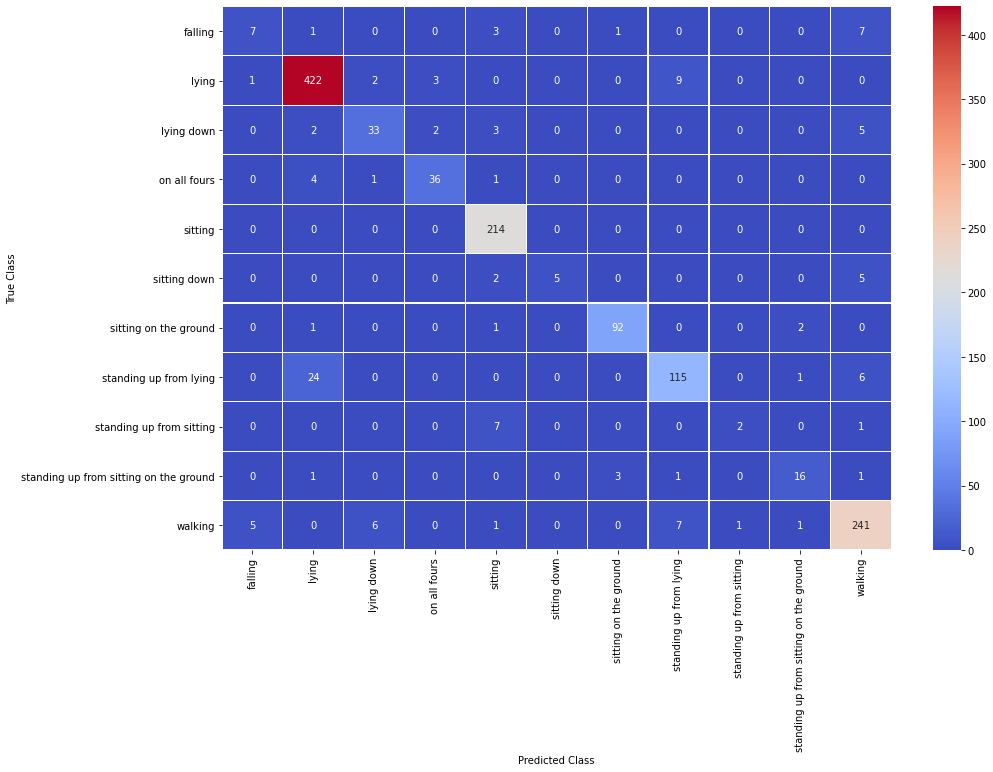

In [80]:
# 3.7. SVM - All Attributes
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
C = [0.001, 0.01, 0.1, 1, 10, 100]
gamma = [.0001, .001, 0.01, 1, 'scale', 'auto']
param_grid = {'C':C, 'gamma':gamma}
svm_RA_BA_AA = SVC()
svm_RA_BA_AA_cv = GridSearchCV(svm_RA_BA_AA, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
svm_RA_BA_AA_cv.fit(X_train_RA_BA_AA_scaled_smote, y_RA_BA_AA_smote)
print('SVM on All Attributes')
print('Cross Validation Accuracy:', svm_RA_BA_AA_cv.best_score_)
print('Best parameter from Cross Validation:', svm_RA_BA_AA_cv.best_params_)
X_test_RA_BA_AA_scaled = scaler_RA_BA_AA.transform(X_test_RA_BA_AA)
y_pred_RA_BA_AA_svm = svm_RA_BA_AA_cv.predict(X_test_RA_BA_AA_scaled)
print('Accuracy:', accuracy_score(y_test_RA_BA_AA, y_pred_RA_BA_AA_svm))
print('Precision for fall:', precision_score(y_test_RA_BA_AA, y_pred_RA_BA_AA_svm, average=None)[0])
print('Recall for fall:', recall_score(y_test_RA_BA_AA, y_pred_RA_BA_AA_svm, average=None)[0])
print('F1-score for fall:', f1_score(y_test_RA_BA_AA, y_pred_RA_BA_AA_svm, average=None)[0])
_ = plt.subplots(figsize= (15,10))
_ = sns.heatmap(confusion_matrix(y_test_RA_BA_AA, y_pred_RA_BA_AA_svm, labels=svm_RA_BA_AA_cv.classes_), 
            annot=True, fmt='d', xticklabels=svm_RA_BA_AA_cv.classes_, yticklabels=svm_RA_BA_AA_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

## 4. Adaboost

Adaboost on Reference Attributes
Cross Validation Accuracy: 0.9896599583622484
Best parameter from Cross Validation: {'n_estimators': 1000}
Accuracy: 0.8950191570881226
Precision for fall: 0.5555555555555556
Recall for fall: 0.2631578947368421
F1-score for fall: 0.35714285714285715


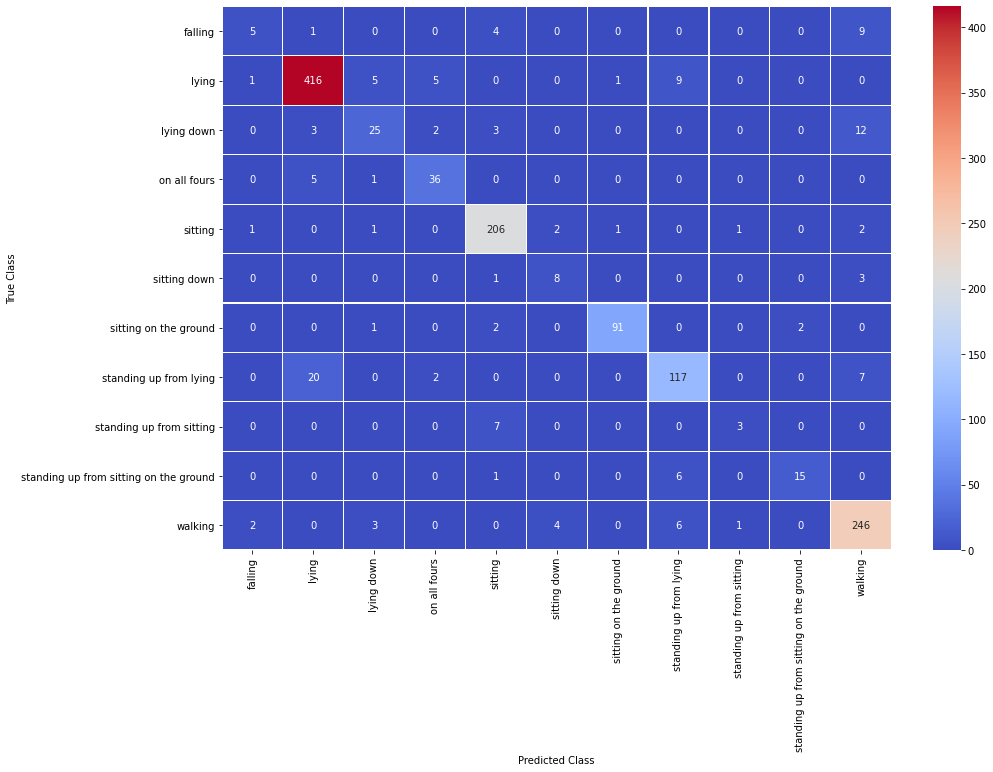

In [81]:
# 4.1. Adaboost - Referenece Attributes
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
n_estimators = [1000]
param_grid = {'n_estimators':n_estimators}
adb_RA = AdaBoostClassifier(DecisionTreeClassifier(max_depth=16), random_state=42)
adb_RA_cv = GridSearchCV(adb_RA, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
adb_RA_cv.fit(X_train_RA_scaled_smote, y_RA_smote)
print('Adaboost on Reference Attributes')
print('Cross Validation Accuracy:', adb_RA_cv.best_score_)
print('Best parameter from Cross Validation:', adb_RA_cv.best_params_)
X_test_RA_scaled = scaler_RA.transform(X_test_RA)
y_pred_RA_adb = adb_RA_cv.predict(X_test_RA_scaled)
print('Accuracy:', accuracy_score(y_test_RA, y_pred_RA_adb))
print('Precision for fall:', precision_score(y_test_RA, y_pred_RA_adb, average=None)[0])
print('Recall for fall:', recall_score(y_test_RA, y_pred_RA_adb, average=None)[0])
print('F1-score for fall:', f1_score(y_test_RA, y_pred_RA_adb, average=None)[0])
_ = plt.subplots(figsize= (15,10))
_ = sns.heatmap(confusion_matrix(y_test_RA, y_pred_RA_adb, labels=adb_RA_cv.classes_), 
            annot=True, fmt='d', xticklabels=adb_RA_cv.classes_, yticklabels=adb_RA_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

Adaboost on Body Attributes
Cross Validation Accuracy: 0.9873698820263707
Best parameter from Cross Validation: {'n_estimators': 1000}
Accuracy: 0.8996168582375479
Precision for fall: 0.6
Recall for fall: 0.3157894736842105
F1-score for fall: 0.41379310344827586


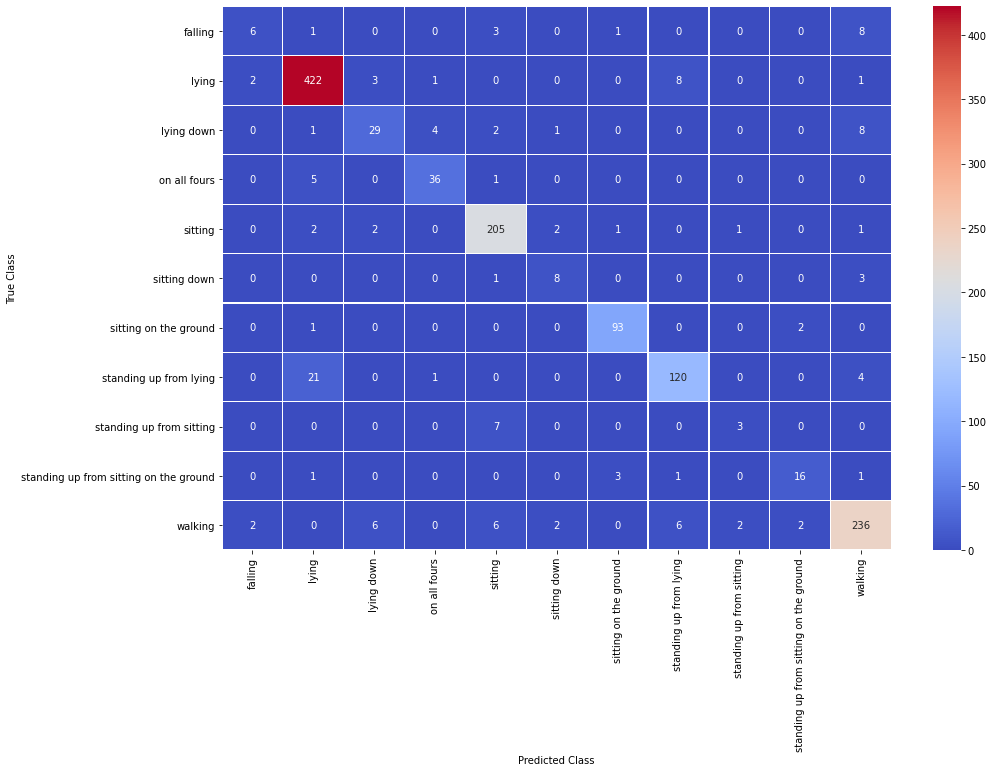

In [82]:
# 4.2. Adaboost - Body Attributes
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
n_estimators = [1000]
param_grid = {'n_estimators':n_estimators}
adb_BA = AdaBoostClassifier(DecisionTreeClassifier(max_depth=16), random_state=42)
adb_BA_cv = GridSearchCV(adb_BA, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
adb_BA_cv.fit(X_train_BA_scaled_smote, y_BA_smote)
print('Adaboost on Body Attributes')
print('Cross Validation Accuracy:', adb_BA_cv.best_score_)
print('Best parameter from Cross Validation:', adb_BA_cv.best_params_)
X_test_BA_scaled = scaler_BA.transform(X_test_BA)
y_pred_BA_adb = adb_BA_cv.predict(X_test_BA_scaled)
print('Accuracy:', accuracy_score(y_test_BA, y_pred_BA_adb))
print('Precision for fall:', precision_score(y_test_BA, y_pred_BA_adb, average=None)[0])
print('Recall for fall:', recall_score(y_test_BA, y_pred_BA_adb, average=None)[0])
print('F1-score for fall:', f1_score(y_test_BA, y_pred_BA_adb, average=None)[0])
_ = plt.subplots(figsize= (15,10))
_ = sns.heatmap(confusion_matrix(y_test_BA, y_pred_BA_adb, labels=adb_BA_cv.classes_), 
            annot=True, fmt='d', xticklabels=adb_BA_cv.classes_, yticklabels=adb_BA_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

Adaboost on Angle Attributes
Cross Validation Accuracy: 0.5088133240804996
Best parameter from Cross Validation: {'n_estimators': 1000}
Accuracy: 0.17471264367816092
Precision for fall: 0.027777777777777776
Recall for fall: 0.15789473684210525
F1-score for fall: 0.047244094488188976


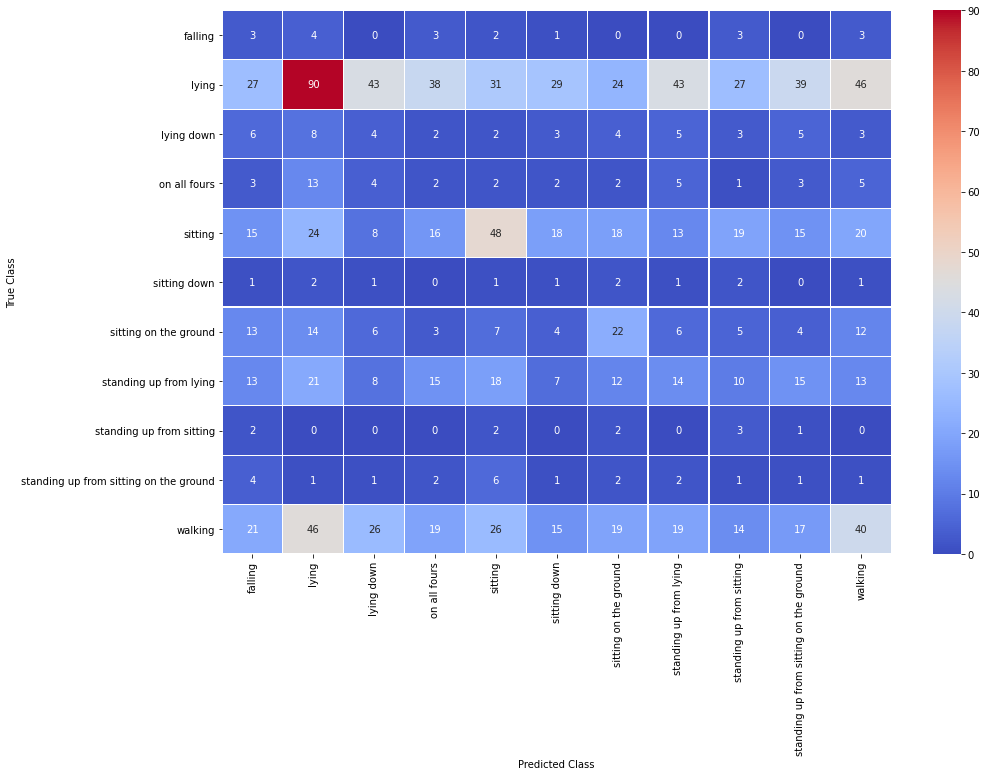

In [83]:
# 4.3. Adaboost - Angle Attributes
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
n_estimators = [1000]
param_grid = {'n_estimators':n_estimators}
adb_AA = AdaBoostClassifier(DecisionTreeClassifier(max_depth=16), random_state=42)
adb_AA_cv = GridSearchCV(adb_AA, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
adb_AA_cv.fit(X_train_AA_scaled_smote, y_AA_smote)
print('Adaboost on Angle Attributes')
print('Cross Validation Accuracy:', adb_AA_cv.best_score_)
print('Best parameter from Cross Validation:', adb_AA_cv.best_params_)
X_test_AA_scaled = scaler_AA.transform(X_test_AA)
y_pred_AA_adb = adb_AA_cv.predict(X_test_AA_scaled)
print('Accuracy:', accuracy_score(y_test_AA, y_pred_AA_adb))
print('Precision for fall:', precision_score(y_test_AA, y_pred_AA_adb, average=None)[0])
print('Recall for fall:', recall_score(y_test_AA, y_pred_AA_adb, average=None)[0])
print('F1-score for fall:', f1_score(y_test_AA, y_pred_AA_adb, average=None)[0])
_ = plt.subplots(figsize= (15,10))
_ = sns.heatmap(confusion_matrix(y_test_AA, y_pred_AA_adb, labels=adb_AA_cv.classes_), 
            annot=True, fmt='d', xticklabels=adb_AA_cv.classes_, yticklabels=adb_AA_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

Adaboost on Reference and Body Attributes
Cross Validation Accuracy: 0.9900763358778624
Best parameter from Cross Validation: {'n_estimators': 1000}
Accuracy: 0.9088122605363985
Precision for fall: 0.625
Recall for fall: 0.2631578947368421
F1-score for fall: 0.37037037037037035


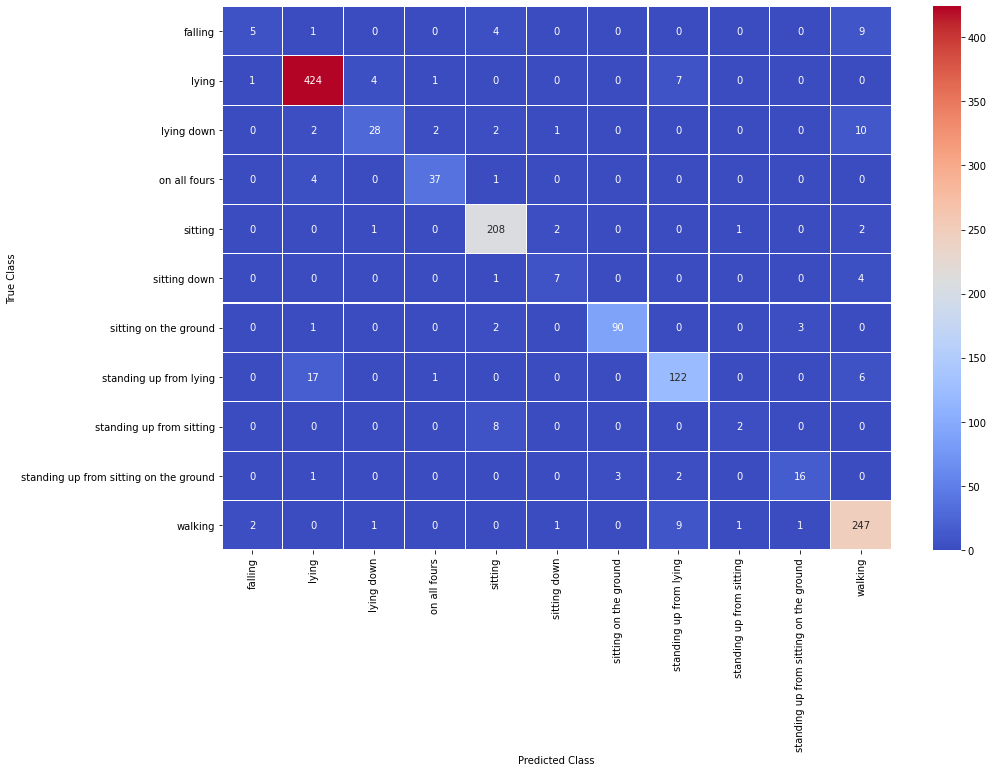

In [84]:
# 4.4. Adaboost - Reference+Body Attributes
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
n_estimators = [1000]
param_grid = {'n_estimators':n_estimators}
adb_RA_BA = AdaBoostClassifier(DecisionTreeClassifier(max_depth=16), random_state=42)
adb_RA_BA_cv = GridSearchCV(adb_RA_BA, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
adb_RA_BA_cv.fit(X_train_RA_BA_scaled_smote, y_RA_BA_smote)
print('Adaboost on Reference and Body Attributes')
print('Cross Validation Accuracy:', adb_RA_BA_cv.best_score_)
print('Best parameter from Cross Validation:', adb_RA_BA_cv.best_params_)
X_test_RA_BA_scaled = scaler_RA_BA.transform(X_test_RA_BA)
y_pred_RA_BA_adb = adb_RA_BA_cv.predict(X_test_RA_BA_scaled)
print('Accuracy:', accuracy_score(y_test_RA_BA, y_pred_RA_BA_adb))
print('Precision for fall:', precision_score(y_test_RA_BA, y_pred_RA_BA_adb, average=None)[0])
print('Recall for fall:', recall_score(y_test_RA_BA, y_pred_RA_BA_adb, average=None)[0])
print('F1-score for fall:', f1_score(y_test_RA_BA, y_pred_RA_BA_adb, average=None)[0])
_ = plt.subplots(figsize= (15,10))
_ = sns.heatmap(confusion_matrix(y_test_RA_BA, y_pred_RA_BA_adb, labels=adb_RA_BA_cv.classes_), 
            annot=True, fmt='d', xticklabels=adb_RA_BA_cv.classes_, yticklabels=adb_RA_BA_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

Adaboost on Reference and Angle Attributes
Cross Validation Accuracy: 0.9877168632893824
Best parameter from Cross Validation: {'n_estimators': 1000}
Accuracy: 0.9026819923371647
Precision for fall: 0.7142857142857143
Recall for fall: 0.2631578947368421
F1-score for fall: 0.3846153846153846


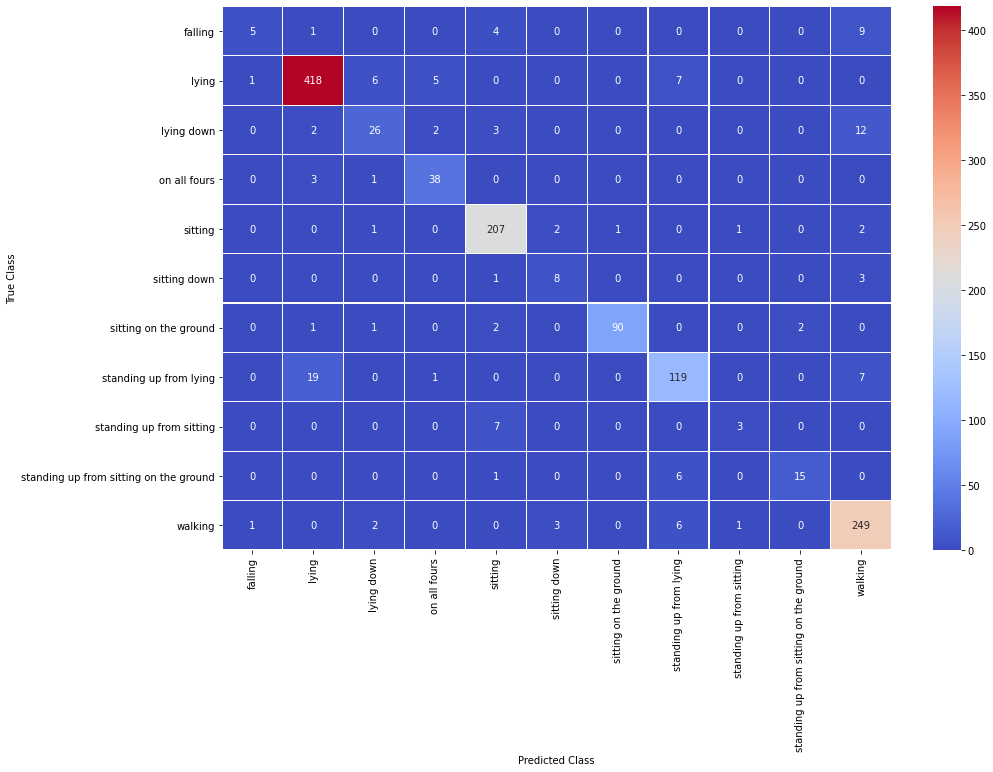

In [85]:
# 4.5. Adaboost - Reference+Angle Attributes
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
n_estimators = [1000]
param_grid = {'n_estimators':n_estimators}
adb_RA_AA = AdaBoostClassifier(DecisionTreeClassifier(max_depth=16), random_state=42)
adb_RA_AA_cv = GridSearchCV(adb_RA_AA, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
adb_RA_AA_cv.fit(X_train_RA_AA_scaled_smote, y_RA_AA_smote)
print('Adaboost on Reference and Angle Attributes')
print('Cross Validation Accuracy:', adb_RA_AA_cv.best_score_)
print('Best parameter from Cross Validation:', adb_RA_AA_cv.best_params_)
X_test_RA_AA_scaled = scaler_RA_AA.transform(X_test_RA_AA)
y_pred_RA_AA_adb = adb_RA_AA_cv.predict(X_test_RA_AA_scaled)
print('Accuracy:', accuracy_score(y_test_RA_AA, y_pred_RA_AA_adb))
print('Precision for fall:', precision_score(y_test_RA_AA, y_pred_RA_AA_adb, average=None)[0])
print('Recall for fall:', recall_score(y_test_RA_AA, y_pred_RA_AA_adb, average=None)[0])
print('F1-score for fall:', f1_score(y_test_RA_AA, y_pred_RA_AA_adb, average=None)[0])
_ = plt.subplots(figsize= (15,10))
_ = sns.heatmap(confusion_matrix(y_test_RA_AA, y_pred_RA_AA_adb, labels=adb_RA_AA_cv.classes_), 
            annot=True, fmt='d', xticklabels=adb_RA_AA_cv.classes_, yticklabels=adb_RA_AA_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

Adaboost on Body and Angle Attributes
Cross Validation Accuracy: 0.9882026370575989
Best parameter from Cross Validation: {'n_estimators': 1000}
Accuracy: 0.8988505747126436
Precision for fall: 0.6363636363636364
Recall for fall: 0.3684210526315789
F1-score for fall: 0.4666666666666667


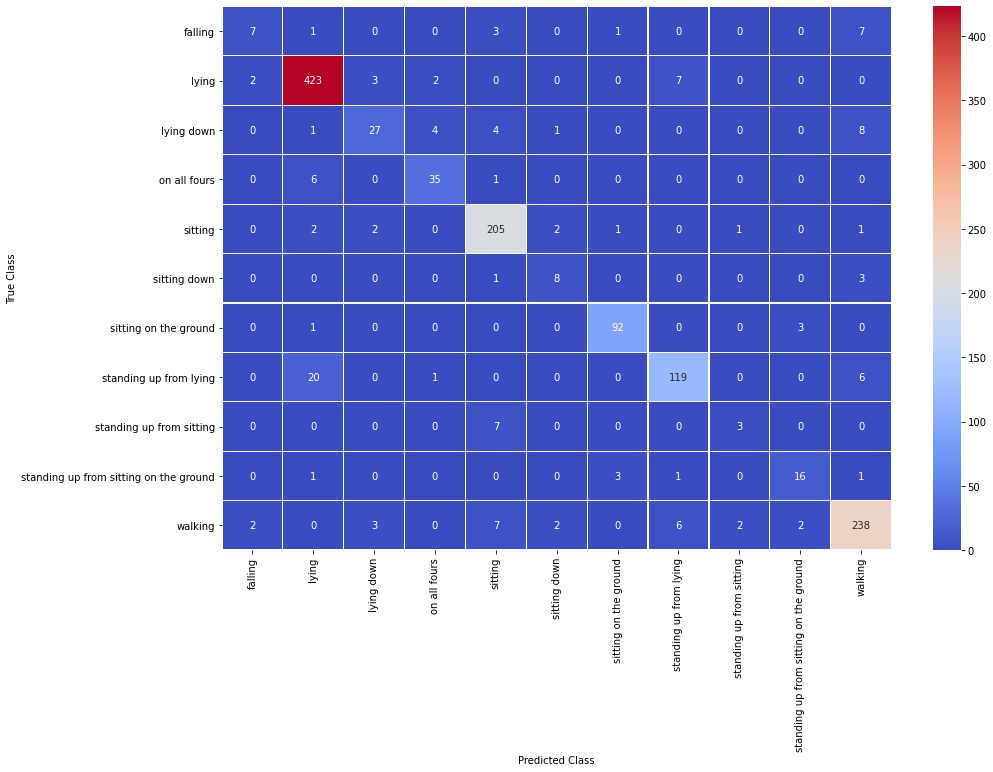

In [86]:
# 4.6. Adaboost - Body+Angle Attributes
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
n_estimators = [1000]
param_grid = {'n_estimators':n_estimators}
adb_BA_AA = AdaBoostClassifier(DecisionTreeClassifier(max_depth=16), random_state=42)
adb_BA_AA_cv = GridSearchCV(adb_BA_AA, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
adb_BA_AA_cv.fit(X_train_BA_AA_scaled_smote, y_BA_AA_smote)
print('Adaboost on Body and Angle Attributes')
print('Cross Validation Accuracy:', adb_BA_AA_cv.best_score_)
print('Best parameter from Cross Validation:', adb_BA_AA_cv.best_params_)
X_test_BA_AA_scaled = scaler_BA_AA.transform(X_test_BA_AA)
y_pred_BA_AA_adb = adb_BA_AA_cv.predict(X_test_BA_AA_scaled)
print('Accuracy:', accuracy_score(y_test_BA_AA, y_pred_BA_AA_adb))
print('Precision for fall:', precision_score(y_test_BA_AA, y_pred_BA_AA_adb, average=None)[0])
print('Recall for fall:', recall_score(y_test_BA_AA, y_pred_BA_AA_adb, average=None)[0])
print('F1-score for fall:', f1_score(y_test_BA_AA, y_pred_BA_AA_adb, average=None)[0])
_ = plt.subplots(figsize= (15,10))
_ = sns.heatmap(confusion_matrix(y_test_BA_AA, y_pred_BA_AA_adb, labels=adb_BA_AA_cv.classes_), 
            annot=True, fmt='d', xticklabels=adb_BA_AA_cv.classes_, yticklabels=adb_BA_AA_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

Adaboost on All Attributes
Cross Validation Accuracy: 0.9913948646773074
Best parameter from Cross Validation: {'n_estimators': 1000}
Accuracy: 0.9134099616858238
Precision for fall: 0.75
Recall for fall: 0.3157894736842105
F1-score for fall: 0.44444444444444436


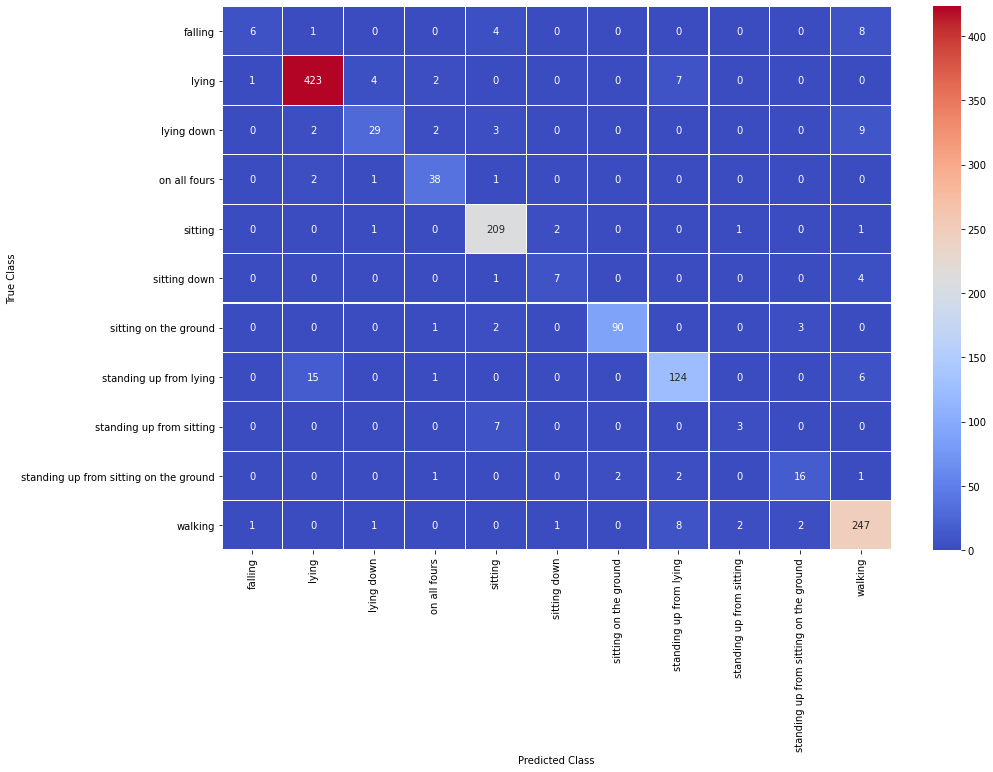

In [87]:
# 4.7. Adaboost - All Attributes
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
n_estimators = [1000]
param_grid = {'n_estimators':n_estimators}
adb_RA_BA_AA = AdaBoostClassifier(DecisionTreeClassifier(max_depth=16), random_state=42)
adb_RA_BA_AA_cv = GridSearchCV(adb_RA_BA_AA, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
adb_RA_BA_AA_cv.fit(X_train_RA_BA_AA_scaled_smote, y_RA_BA_AA_smote)
print('Adaboost on All Attributes')
print('Cross Validation Accuracy:', adb_RA_BA_AA_cv.best_score_)
print('Best parameter from Cross Validation:', adb_RA_BA_AA_cv.best_params_)
X_test_RA_BA_AA_scaled = scaler_RA_BA_AA.transform(X_test_RA_BA_AA)
y_pred_RA_BA_AA_adb = adb_RA_BA_AA_cv.predict(X_test_RA_BA_AA_scaled)
print('Accuracy:', accuracy_score(y_test_RA_BA_AA, y_pred_RA_BA_AA_adb))
print('Precision for fall:', precision_score(y_test_RA_BA_AA, y_pred_RA_BA_AA_adb, average=None)[0])
print('Recall for fall:', recall_score(y_test_RA_BA_AA, y_pred_RA_BA_AA_adb, average=None)[0])
print('F1-score for fall:', f1_score(y_test_RA_BA_AA, y_pred_RA_BA_AA_adb, average=None)[0])
_ = plt.subplots(figsize= (15,10))
_ = sns.heatmap(confusion_matrix(y_test_RA_BA_AA, y_pred_RA_BA_AA_adb, labels=adb_RA_BA_AA_cv.classes_), 
            annot=True, fmt='d', xticklabels=adb_RA_BA_AA_cv.classes_, yticklabels=adb_RA_BA_AA_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

## 5. XGBoost Classifier

XGBoost on Reference Attributes
Cross Validation Accuracy: 0.9825121443442054
Best parameter from Cross Validation: {'learning_rate': 0.1, 'max_depth': 7}
Accuracy: 0.8842911877394636
Precision for fall: 0.5454545454545454
Recall for fall: 0.3157894736842105
F1-score for fall: 0.39999999999999997


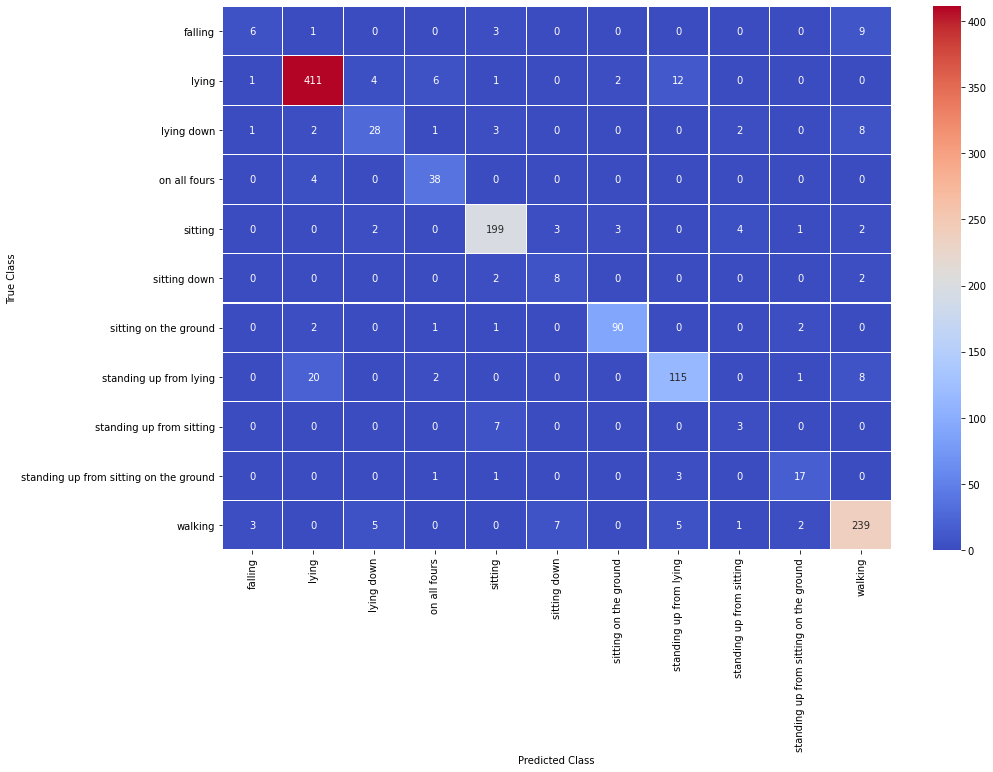

Wall time: 3h 6min 12s
Parser   : 140 ms


In [88]:
%%time
# 5.1. XGBoost - Referenece Attributes
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
learning_rate = [.01, 0.1, 1]
max_depth = [5, 6, 7]
param_grid = {'learning_rate':learning_rate, 'max_depth':max_depth}
xgb_RA = xgb.XGBClassifier(n_jobs=-1, n_estimators=1000, random_state=42)
xgb_RA_cv = GridSearchCV(xgb_RA, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
xgb_RA_cv.fit(X_train_RA_scaled_smote, y_RA_smote)
print('XGBoost on Reference Attributes')
print('Cross Validation Accuracy:', xgb_RA_cv.best_score_)
print('Best parameter from Cross Validation:', xgb_RA_cv.best_params_)
X_test_RA_scaled = scaler_RA.transform(X_test_RA)
y_pred_RA_xgb = xgb_RA_cv.predict(X_test_RA_scaled)
print('Accuracy:', accuracy_score(y_test_RA, y_pred_RA_xgb))
print('Precision for fall:', precision_score(y_test_RA, y_pred_RA_xgb, average=None)[0])
print('Recall for fall:', recall_score(y_test_RA, y_pred_RA_xgb, average=None)[0])
print('F1-score for fall:', f1_score(y_test_RA, y_pred_RA_xgb, average=None)[0])
_ = plt.subplots(figsize= (15,10))
_ = sns.heatmap(confusion_matrix(y_test_RA, y_pred_RA_xgb, labels=xgb_RA_cv.classes_), 
            annot=True, fmt='d', xticklabels=xgb_RA_cv.classes_, yticklabels=xgb_RA_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

XGBoost on Body Attributes
Cross Validation Accuracy: 0.9810548230395557
Best parameter from Cross Validation: {'learning_rate': 0.1, 'max_depth': 5}
Accuracy: 0.8704980842911877
Precision for fall: 0.6363636363636364
Recall for fall: 0.3684210526315789
F1-score for fall: 0.4666666666666667


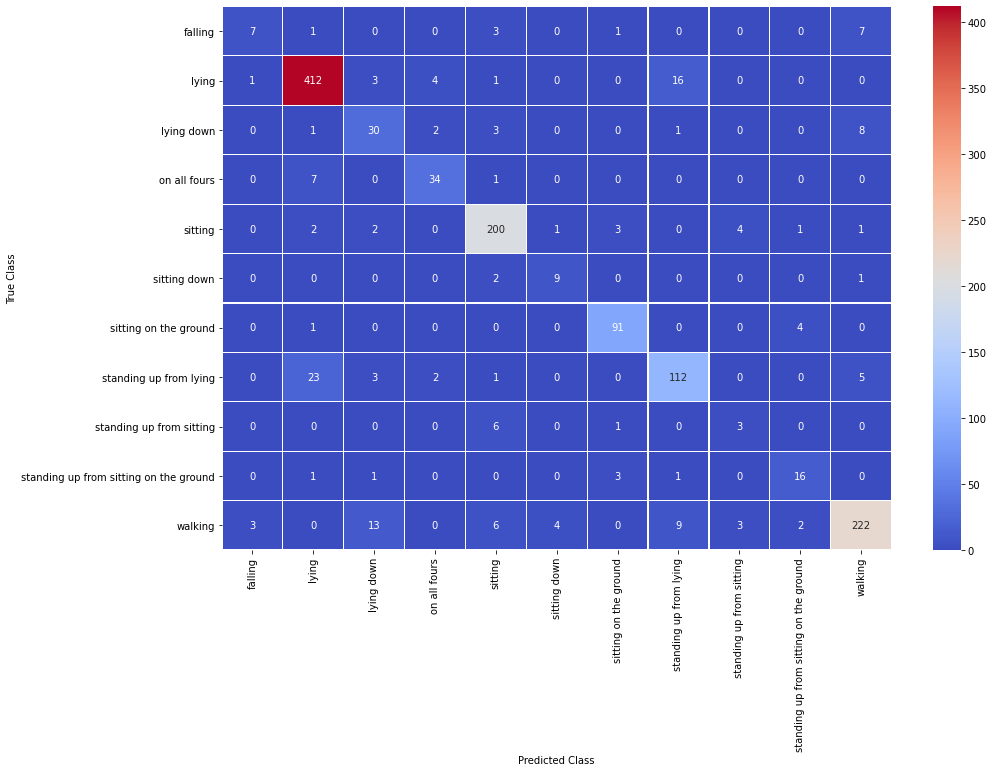

In [89]:
# 5.2. XGBoost - Body Attributes
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
learning_rate = [.01, 0.1, 1]
max_depth = [5, 6, 7]
param_grid = {'learning_rate':learning_rate, 'max_depth':max_depth}
xgb_BA = xgb.XGBClassifier(n_jobs=-1, n_estimators=1000, random_state=42)
xgb_BA_cv = GridSearchCV(xgb_BA, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
xgb_BA_cv.fit(X_train_BA_scaled_smote, y_BA_smote)
print('XGBoost on Body Attributes')
print('Cross Validation Accuracy:', xgb_BA_cv.best_score_)
print('Best parameter from Cross Validation:', xgb_BA_cv.best_params_)
X_test_BA_scaled = scaler_BA.transform(X_test_BA)
y_pred_BA_xgb = xgb_BA_cv.predict(X_test_BA_scaled)
print('Accuracy:', accuracy_score(y_test_BA, y_pred_BA_xgb))
print('Precision for fall:', precision_score(y_test_BA, y_pred_BA_xgb, average=None)[0])
print('Recall for fall:', recall_score(y_test_BA, y_pred_BA_xgb, average=None)[0])
print('F1-score for fall:', f1_score(y_test_BA, y_pred_BA_xgb, average=None)[0])
_ = plt.subplots(figsize= (15,10))
_ = sns.heatmap(confusion_matrix(y_test_BA, y_pred_BA_xgb, labels=xgb_BA_cv.classes_), 
            annot=True, fmt='d', xticklabels=xgb_BA_cv.classes_, yticklabels=xgb_BA_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

XGBoost on Angle Attributes
Cross Validation Accuracy: 0.4709229701596113
Best parameter from Cross Validation: {'learning_rate': 0.1, 'max_depth': 7}
Accuracy: 0.16168582375478927
Precision for fall: 0.021739130434782608
Recall for fall: 0.10526315789473684
F1-score for fall: 0.03603603603603604


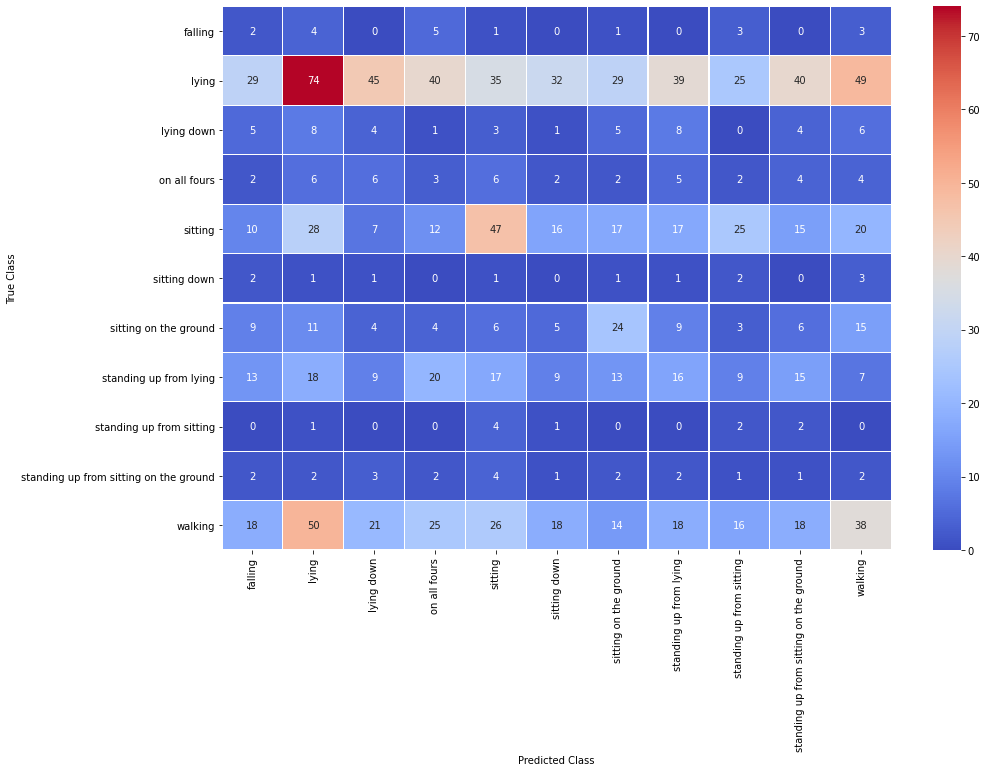

In [90]:
# 5.3. XGBoost - Angle Attributes
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
learning_rate = [.01, 0.1, 1]
max_depth = [5, 6, 7]
param_grid = {'learning_rate':learning_rate, 'max_depth':max_depth}
xgb_AA = xgb.XGBClassifier(n_jobs=-1, n_estimators=1000, random_state=42)
xgb_AA_cv = GridSearchCV(xgb_AA, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
xgb_AA_cv.fit(X_train_AA_scaled_smote, y_AA_smote)
print('XGBoost on Angle Attributes')
print('Cross Validation Accuracy:', xgb_AA_cv.best_score_)
print('Best parameter from Cross Validation:', xgb_AA_cv.best_params_)
X_test_AA_scaled = scaler_AA.transform(X_test_AA)
y_pred_AA_xgb = xgb_AA_cv.predict(X_test_AA_scaled)
print('Accuracy:', accuracy_score(y_test_AA, y_pred_AA_xgb))
print('Precision for fall:', precision_score(y_test_AA, y_pred_AA_xgb, average=None)[0])
print('Recall for fall:', recall_score(y_test_AA, y_pred_AA_xgb, average=None)[0])
print('F1-score for fall:', f1_score(y_test_AA, y_pred_AA_xgb, average=None)[0])
_ = plt.subplots(figsize= (15,10))
_ = sns.heatmap(confusion_matrix(y_test_AA, y_pred_AA_xgb, labels=xgb_AA_cv.classes_), 
            annot=True, fmt='d', xticklabels=xgb_AA_cv.classes_, yticklabels=xgb_AA_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

XGBoost on Reference and Body Attributes
Cross Validation Accuracy: 0.9859819569743233
Best parameter from Cross Validation: {'learning_rate': 0.1, 'max_depth': 6}
Accuracy: 0.9011494252873563
Precision for fall: 0.5333333333333333
Recall for fall: 0.42105263157894735
F1-score for fall: 0.47058823529411764


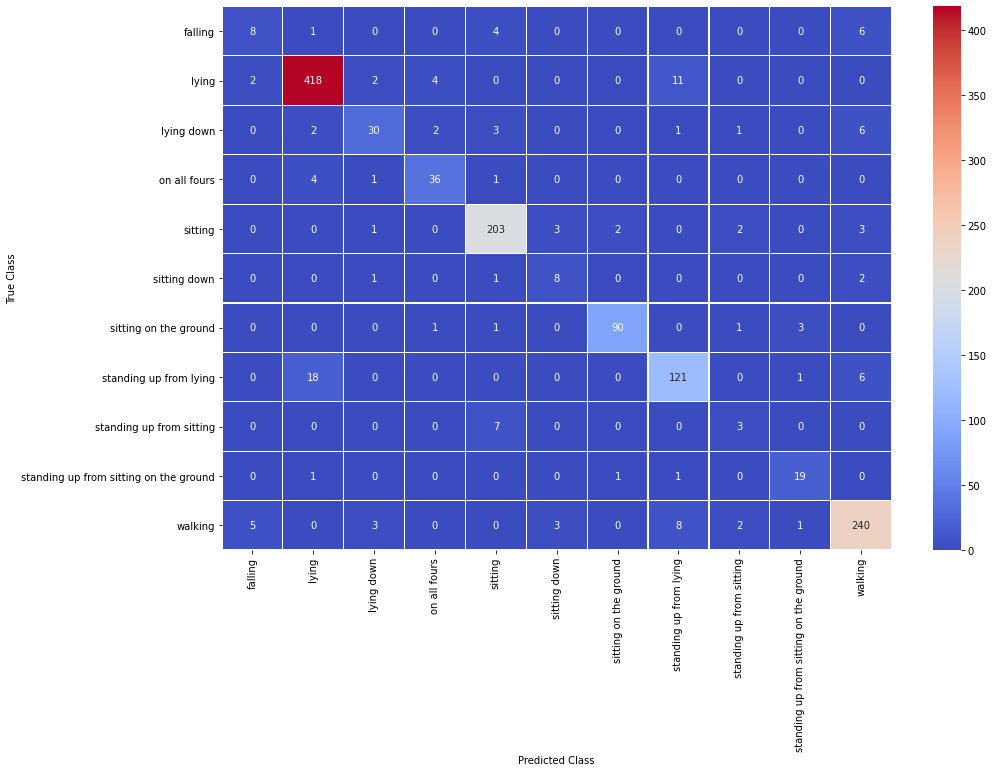

In [91]:
# 5.4. XGBoost - Reference+Body Attributes
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
learning_rate = [.01, 0.1, 1]
max_depth = [5, 6, 7]
param_grid = {'learning_rate':learning_rate, 'max_depth':max_depth}
xgb_RA_BA = xgb.XGBClassifier(n_jobs=-1, n_estimators=1000, random_state=42)
xgb_RA_BA_cv = GridSearchCV(xgb_RA_BA, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
xgb_RA_BA_cv.fit(X_train_RA_BA_scaled_smote, y_RA_BA_smote)
print('XGBoost on Reference and Body Attributes')
print('Cross Validation Accuracy:', xgb_RA_BA_cv.best_score_)
print('Best parameter from Cross Validation:', xgb_RA_BA_cv.best_params_)
X_test_RA_BA_scaled = scaler_RA_BA.transform(X_test_RA_BA)
y_pred_RA_BA_xgb = xgb_RA_BA_cv.predict(X_test_RA_BA_scaled)
print('Accuracy:', accuracy_score(y_test_RA_BA, y_pred_RA_BA_xgb))
print('Precision for fall:', precision_score(y_test_RA_BA, y_pred_RA_BA_xgb, average=None)[0])
print('Recall for fall:', recall_score(y_test_RA_BA, y_pred_RA_BA_xgb, average=None)[0])
print('F1-score for fall:', f1_score(y_test_RA_BA, y_pred_RA_BA_xgb, average=None)[0])
_ = plt.subplots(figsize= (15,10))
_ = sns.heatmap(confusion_matrix(y_test_RA_BA, y_pred_RA_BA_xgb, labels=xgb_RA_BA_cv.classes_), 
            annot=True, fmt='d', xticklabels=xgb_RA_BA_cv.classes_, yticklabels=xgb_RA_BA_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

XGBoost on Reference and Angle Attributes
Cross Validation Accuracy: 0.982997918112422
Best parameter from Cross Validation: {'learning_rate': 0.1, 'max_depth': 5}
Accuracy: 0.8804597701149425
Precision for fall: 0.3076923076923077
Recall for fall: 0.21052631578947367
F1-score for fall: 0.25


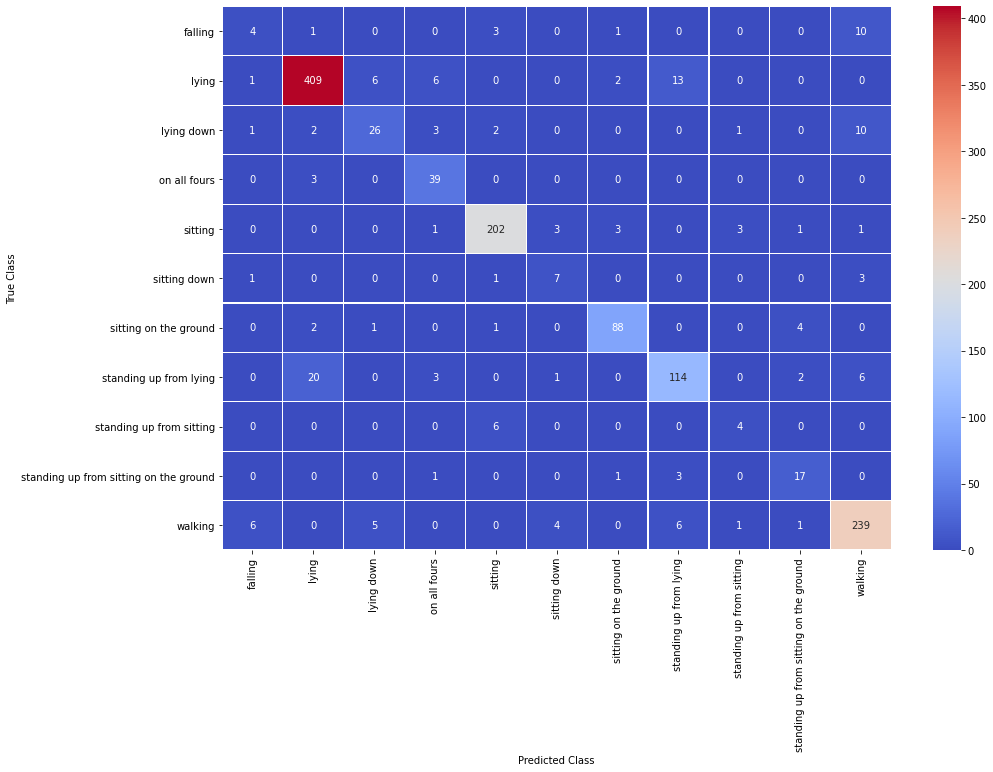

In [92]:
# 5.5. XGBoost - Reference+Angle Attributes
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
learning_rate = [.01, 0.1, 1]
max_depth = [5, 6, 7]
param_grid = {'learning_rate':learning_rate, 'max_depth':max_depth}
xgb_RA_AA = xgb.XGBClassifier(n_jobs=-1, n_estimators=1000, random_state=42)
xgb_RA_AA_cv = GridSearchCV(xgb_RA_AA, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
xgb_RA_AA_cv.fit(X_train_RA_AA_scaled_smote, y_RA_AA_smote)
print('XGBoost on Reference and Angle Attributes')
print('Cross Validation Accuracy:', xgb_RA_AA_cv.best_score_)
print('Best parameter from Cross Validation:', xgb_RA_AA_cv.best_params_)
X_test_RA_AA_scaled = scaler_RA_AA.transform(X_test_RA_AA)
y_pred_RA_AA_xgb = xgb_RA_AA_cv.predict(X_test_RA_AA_scaled)
print('Accuracy:', accuracy_score(y_test_RA_AA, y_pred_RA_AA_xgb))
print('Precision for fall:', precision_score(y_test_RA_AA, y_pred_RA_AA_xgb, average=None)[0])
print('Recall for fall:', recall_score(y_test_RA_AA, y_pred_RA_AA_xgb, average=None)[0])
print('F1-score for fall:', f1_score(y_test_RA_AA, y_pred_RA_AA_xgb, average=None)[0])
_ = plt.subplots(figsize= (15,10))
_ = sns.heatmap(confusion_matrix(y_test_RA_AA, y_pred_RA_AA_xgb, labels=xgb_RA_AA_cv.classes_), 
            annot=True, fmt='d', xticklabels=xgb_RA_AA_cv.classes_, yticklabels=xgb_RA_AA_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

XGBoost on Body and Angle Attributes
Cross Validation Accuracy: 0.9820957668285912
Best parameter from Cross Validation: {'learning_rate': 0.1, 'max_depth': 5}
Accuracy: 0.871264367816092
Precision for fall: 0.5833333333333334
Recall for fall: 0.3684210526315789
F1-score for fall: 0.4516129032258065


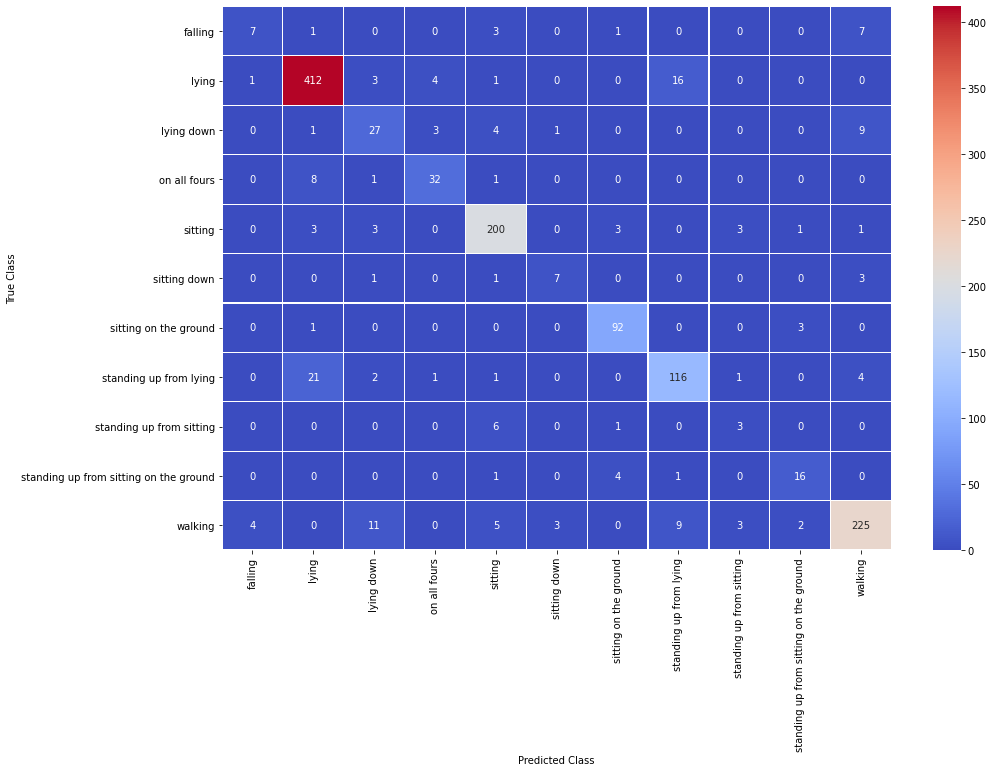

In [93]:
# 5.6. XGBoost - Body+Angle Attributes
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
learning_rate = [.01, 0.1, 1]
max_depth = [5, 6, 7]
param_grid = {'learning_rate':learning_rate, 'max_depth':max_depth}
xgb_BA_AA = xgb.XGBClassifier(n_jobs=-1, n_estimators=1000, random_state=42)
xgb_BA_AA_cv = GridSearchCV(xgb_BA_AA, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
xgb_BA_AA_cv.fit(X_train_BA_AA_scaled_smote, y_BA_AA_smote)
print('XGBoost on Body and Angle Attributes')
print('Cross Validation Accuracy:', xgb_BA_AA_cv.best_score_)
print('Best parameter from Cross Validation:', xgb_BA_AA_cv.best_params_)
X_test_BA_AA_scaled = scaler_BA_AA.transform(X_test_BA_AA)
y_pred_BA_AA_xgb = xgb_BA_AA_cv.predict(X_test_BA_AA_scaled)
print('Accuracy:', accuracy_score(y_test_BA_AA, y_pred_BA_AA_xgb))
print('Precision for fall:', precision_score(y_test_BA_AA, y_pred_BA_AA_xgb, average=None)[0])
print('Recall for fall:', recall_score(y_test_BA_AA, y_pred_BA_AA_xgb, average=None)[0])
print('F1-score for fall:', f1_score(y_test_BA_AA, y_pred_BA_AA_xgb, average=None)[0])
_ = plt.subplots(figsize= (15,10))
_ = sns.heatmap(confusion_matrix(y_test_BA_AA, y_pred_BA_AA_xgb, labels=xgb_BA_AA_cv.classes_), 
            annot=True, fmt='d', xticklabels=xgb_BA_AA_cv.classes_, yticklabels=xgb_BA_AA_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

XGBoost on All Attributes
Cross Validation Accuracy: 0.9859819569743233
Best parameter from Cross Validation: {'learning_rate': 0.1, 'max_depth': 5}
Accuracy: 0.8996168582375479
Precision for fall: 0.42857142857142855
Recall for fall: 0.3157894736842105
F1-score for fall: 0.36363636363636365


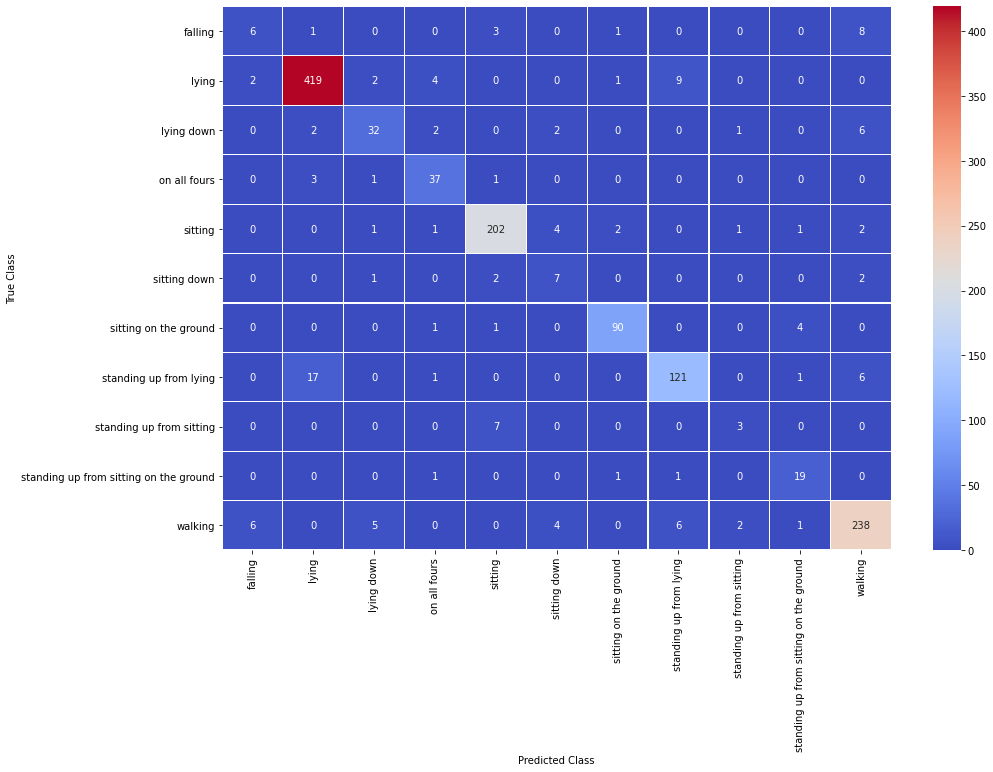

In [94]:
# 5.7. XGBoost - All Attributes
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
learning_rate = [.01, 0.1, 1]
max_depth = [5, 6, 7]
param_grid = {'learning_rate':learning_rate, 'max_depth':max_depth}
xgb_RA_BA_AA = xgb.XGBClassifier(n_jobs=-1, n_estimators=1000, random_state=42)
xgb_RA_BA_AA_cv = GridSearchCV(xgb_RA_BA_AA, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
xgb_RA_BA_AA_cv.fit(X_train_RA_BA_AA_scaled_smote, y_RA_BA_AA_smote)
print('XGBoost on All Attributes')
print('Cross Validation Accuracy:', xgb_RA_BA_AA_cv.best_score_)
print('Best parameter from Cross Validation:', xgb_RA_BA_AA_cv.best_params_)
X_test_RA_BA_AA_scaled = scaler_RA_BA_AA.transform(X_test_RA_BA_AA)
y_pred_RA_BA_AA_xgb = xgb_RA_BA_AA_cv.predict(X_test_RA_BA_AA_scaled)
print('Accuracy:', accuracy_score(y_test_RA_BA_AA, y_pred_RA_BA_AA_xgb))
print('Precision for fall:', precision_score(y_test_RA_BA_AA, y_pred_RA_BA_AA_xgb, average=None)[0])
print('Recall for fall:', recall_score(y_test_RA_BA_AA, y_pred_RA_BA_AA_xgb, average=None)[0])
print('F1-score for fall:', f1_score(y_test_RA_BA_AA, y_pred_RA_BA_AA_xgb, average=None)[0])
_ = plt.subplots(figsize= (15,10))
_ = sns.heatmap(confusion_matrix(y_test_RA_BA_AA, y_pred_RA_BA_AA_xgb, labels=xgb_RA_BA_AA_cv.classes_), 
            annot=True, fmt='d', xticklabels=xgb_RA_BA_AA_cv.classes_, yticklabels=xgb_RA_BA_AA_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [96]:
# 1. Saving the reference attributes
pd.DataFrame(X_train_RA_scaled, columns = RA.columns).to_csv('D:\\Springboard\\Technical Project\\7_Capstone Two\\data\\clean_training_test_data\\X_train_RA_scaled.csv')
pd.DataFrame(X_train_RA_scaled_smote, columns = RA.columns).to_csv('D:\\Springboard\\Technical Project\\7_Capstone Two\\data\\clean_training_test_data\\X_train_RA_scaled_smote.csv')
pd.DataFrame(y_train_RA, columns = ['activity']).to_csv('D:\\Springboard\\Technical Project\\7_Capstone Two\\data\\clean_training_test_data\\y_train_RA.csv')
pd.DataFrame(y_RA_smote, columns = ['activity']).to_csv('D:\\Springboard\\Technical Project\\7_Capstone Two\\data\\clean_training_test_data\\y_train_RA_smote.csv')
pd.DataFrame(X_test_RA_scaled, columns = RA.columns).to_csv('D:\\Springboard\\Technical Project\\7_Capstone Two\\data\\clean_training_test_data\\X_test_RA_scaled.csv')
pd.DataFrame(y_test_RA, columns = ['activity']).to_csv('D:\\Springboard\\Technical Project\\7_Capstone Two\\data\\clean_training_test_data\\y_test_RA.csv')

In [97]:
# 2. Saving the body attributes
pd.DataFrame(X_train_BA_scaled, columns = BA.columns).to_csv('D:\\Springboard\\Technical Project\\7_Capstone Two\\data\\clean_training_test_data\\X_train_BA_scaled.csv')
pd.DataFrame(X_train_BA_scaled_smote, columns = BA.columns).to_csv('D:\\Springboard\\Technical Project\\7_Capstone Two\\data\\clean_training_test_data\\X_train_BA_scaled_smote.csv')
pd.DataFrame(y_train_BA, columns = ['activity']).to_csv('D:\\Springboard\\Technical Project\\7_Capstone Two\\data\\clean_training_test_data\\y_train_BA.csv')
pd.DataFrame(y_BA_smote, columns = ['activity']).to_csv('D:\\Springboard\\Technical Project\\7_Capstone Two\\data\\clean_training_test_data\\y_train_BA_smote.csv')
pd.DataFrame(X_test_BA_scaled, columns = BA.columns).to_csv('D:\\Springboard\\Technical Project\\7_Capstone Two\\data\\clean_training_test_data\\X_test_BA_scaled.csv')
pd.DataFrame(y_test_BA, columns = ['activity']).to_csv('D:\\Springboard\\Technical Project\\7_Capstone Two\\data\\clean_training_test_data\\y_test_BA.csv')

In [98]:
# 3. Saving the angle attributes
pd.DataFrame(X_train_AA_scaled, columns = AA.columns).to_csv('D:\\Springboard\\Technical Project\\7_Capstone Two\\data\\clean_training_test_data\\X_train_AA_scaled.csv')
pd.DataFrame(X_train_AA_scaled_smote, columns = AA.columns).to_csv('D:\\Springboard\\Technical Project\\7_Capstone Two\\data\\clean_training_test_data\\X_train_AA_scaled_smote.csv')
pd.DataFrame(y_train_AA, columns = ['activity']).to_csv('D:\\Springboard\\Technical Project\\7_Capstone Two\\data\\clean_training_test_data\\y_train_AA.csv')
pd.DataFrame(y_AA_smote, columns = ['activity']).to_csv('D:\\Springboard\\Technical Project\\7_Capstone Two\\data\\clean_training_test_data\\y_train_AA_smote.csv')
pd.DataFrame(X_test_AA_scaled, columns = AA.columns).to_csv('D:\\Springboard\\Technical Project\\7_Capstone Two\\data\\clean_training_test_data\\X_test_AA_scaled.csv')
pd.DataFrame(y_test_AA, columns = ['activity']).to_csv('D:\\Springboard\\Technical Project\\7_Capstone Two\\data\\clean_training_test_data\\y_test_AA.csv')

In [99]:
# 4. Saving the reference+body attributes
pd.DataFrame(X_train_RA_BA_scaled, columns = RA_BA.columns).to_csv('D:\\Springboard\\Technical Project\\7_Capstone Two\\data\\clean_training_test_data\\X_train_RA_BA_scaled.csv')
pd.DataFrame(X_train_RA_BA_scaled_smote, columns = RA_BA.columns).to_csv('D:\\Springboard\\Technical Project\\7_Capstone Two\\data\\clean_training_test_data\\X_train_RA_BA_scaled_smote.csv')
pd.DataFrame(y_train_RA_BA, columns = ['activity']).to_csv('D:\\Springboard\\Technical Project\\7_Capstone Two\\data\\clean_training_test_data\\y_train_RA_BA.csv')
pd.DataFrame(y_RA_BA_smote, columns = ['activity']).to_csv('D:\\Springboard\\Technical Project\\7_Capstone Two\\data\\clean_training_test_data\\y_train_RA_BA_smote.csv')
pd.DataFrame(X_test_RA_BA_scaled, columns = RA_BA.columns).to_csv('D:\\Springboard\\Technical Project\\7_Capstone Two\\data\\clean_training_test_data\\X_test_RA_BA_scaled.csv')
pd.DataFrame(y_test_RA_BA, columns = ['activity']).to_csv('D:\\Springboard\\Technical Project\\7_Capstone Two\\data\\clean_training_test_data\\y_test_RA_BA.csv')

In [100]:
# 5. Saving the reference+angle attributes
pd.DataFrame(X_train_RA_AA_scaled, columns = RA_AA.columns).to_csv('D:\\Springboard\\Technical Project\\7_Capstone Two\\data\\clean_training_test_data\\X_train_RA_AA_scaled.csv')
pd.DataFrame(X_train_RA_AA_scaled_smote, columns = RA_AA.columns).to_csv('D:\\Springboard\\Technical Project\\7_Capstone Two\\data\\clean_training_test_data\\X_train_RA_AA_scaled_smote.csv')
pd.DataFrame(y_train_RA_AA, columns = ['activity']).to_csv('D:\\Springboard\\Technical Project\\7_Capstone Two\\data\\clean_training_test_data\\y_train_RA_AA.csv')
pd.DataFrame(y_RA_AA_smote, columns = ['activity']).to_csv('D:\\Springboard\\Technical Project\\7_Capstone Two\\data\\clean_training_test_data\\y_train_RA_AA_smote.csv')
pd.DataFrame(X_test_RA_AA_scaled, columns = RA_AA.columns).to_csv('D:\\Springboard\\Technical Project\\7_Capstone Two\\data\\clean_training_test_data\\X_test_RA_AA_scaled.csv')
pd.DataFrame(y_test_RA_AA, columns = ['activity']).to_csv('D:\\Springboard\\Technical Project\\7_Capstone Two\\data\\clean_training_test_data\\y_test_RA_AA.csv')

In [101]:
# 6. Saving the body+angle attributes
pd.DataFrame(X_train_BA_AA_scaled, columns = BA_AA.columns).to_csv('D:\\Springboard\\Technical Project\\7_Capstone Two\\data\\clean_training_test_data\\X_train_BA_AA_scaled.csv')
pd.DataFrame(X_train_BA_AA_scaled_smote, columns = BA_AA.columns).to_csv('D:\\Springboard\\Technical Project\\7_Capstone Two\\data\\clean_training_test_data\\X_train_BA_AA_scaled_smote.csv')
pd.DataFrame(y_train_BA_AA, columns = ['activity']).to_csv('D:\\Springboard\\Technical Project\\7_Capstone Two\\data\\clean_training_test_data\\y_train_BA_AA.csv')
pd.DataFrame(y_BA_AA_smote, columns = ['activity']).to_csv('D:\\Springboard\\Technical Project\\7_Capstone Two\\data\\clean_training_test_data\\y_train_BA_AA_smote.csv')
pd.DataFrame(X_test_BA_AA_scaled, columns = BA_AA.columns).to_csv('D:\\Springboard\\Technical Project\\7_Capstone Two\\data\\clean_training_test_data\\X_test_BA_AA_scaled.csv')
pd.DataFrame(y_test_BA_AA, columns = ['activity']).to_csv('D:\\Springboard\\Technical Project\\7_Capstone Two\\data\\clean_training_test_data\\y_test_BA_AA.csv')

In [102]:
# 7. Saving the all attributes
pd.DataFrame(X_train_RA_BA_AA_scaled, columns = RA_BA_AA.columns).to_csv('D:\\Springboard\\Technical Project\\7_Capstone Two\\data\\clean_training_test_data\\X_train_RA_BA_AA_scaled.csv')
pd.DataFrame(X_train_RA_BA_AA_scaled_smote, columns = RA_BA_AA.columns).to_csv('D:\\Springboard\\Technical Project\\7_Capstone Two\\data\\clean_training_test_data\\X_train_RA_BA_AA_scaled_smote.csv')
pd.DataFrame(y_train_RA_BA_AA, columns = ['activity']).to_csv('D:\\Springboard\\Technical Project\\7_Capstone Two\\data\\clean_training_test_data\\y_train_RA_BA_AA.csv')
pd.DataFrame(y_RA_BA_AA_smote, columns = ['activity']).to_csv('D:\\Springboard\\Technical Project\\7_Capstone Two\\data\\clean_training_test_data\\y_train_RA_BA_AA_smote.csv')
pd.DataFrame(X_test_RA_BA_AA_scaled, columns = RA_BA_AA.columns).to_csv('D:\\Springboard\\Technical Project\\7_Capstone Two\\data\\clean_training_test_data\\X_test_RA_BA_AA_scaled.csv')
pd.DataFrame(y_test_RA_BA_AA, columns = ['activity']).to_csv('D:\\Springboard\\Technical Project\\7_Capstone Two\\data\\clean_training_test_data\\y_test_RA_BA_AA.csv')

In [104]:
# 1. Saving DecisionTreeClassifier models
import joblib
joblib.dump(dtc_RA_cv, 'D:\\Springboard\\Technical Project\\7_Capstone Two\\models\\clean_data_models\\dtc_RA_cv.joblib')
joblib.dump(dtc_BA_cv, 'D:\\Springboard\\Technical Project\\7_Capstone Two\\models\\clean_data_models\\dtc_BA_cv.joblib')
joblib.dump(dtc_AA_cv, 'D:\\Springboard\\Technical Project\\7_Capstone Two\\models\\clean_data_models\\dtc_AA_cv.joblib')
joblib.dump(dtc_RA_BA_cv, 'D:\\Springboard\\Technical Project\\7_Capstone Two\\models\\clean_data_models\\dtc_RA_BA_cv.joblib')
joblib.dump(dtc_RA_AA_cv, 'D:\\Springboard\\Technical Project\\7_Capstone Two\\models\\clean_data_models\\dtc_RA_AA_cv.joblib')
joblib.dump(dtc_BA_AA_cv, 'D:\\Springboard\\Technical Project\\7_Capstone Two\\models\\clean_data_models\\dtc_BA_AA_cv.joblib')
joblib.dump(dtc_RA_BA_AA_cv, 'D:\\Springboard\\Technical Project\\7_Capstone Two\\models\\clean_data_models\\dtc_RA_BA_AA_cv.joblib')

['D:\\Springboard\\Technical Project\\7_Capstone Two\\models\\clean_data_models\\dtc_RA_BA_AA_cv.joblib']

In [105]:
# 2. Saving KNN models
import joblib
joblib.dump(knn_RA_cv, 'D:\\Springboard\\Technical Project\\7_Capstone Two\\models\\clean_data_models\\knn_RA_cv.joblib')
joblib.dump(knn_BA_cv, 'D:\\Springboard\\Technical Project\\7_Capstone Two\\models\\clean_data_models\\knn_BA_cv.joblib')
joblib.dump(knn_AA_cv, 'D:\\Springboard\\Technical Project\\7_Capstone Two\\models\\clean_data_models\\knn_AA_cv.joblib')
joblib.dump(knn_RA_BA_cv, 'D:\\Springboard\\Technical Project\\7_Capstone Two\\models\\clean_data_models\\knn_RA_BA_cv.joblib')
joblib.dump(knn_RA_AA_cv, 'D:\\Springboard\\Technical Project\\7_Capstone Two\\models\\clean_data_models\\knn_RA_AA_cv.joblib')
joblib.dump(knn_BA_AA_cv, 'D:\\Springboard\\Technical Project\\7_Capstone Two\\models\\clean_data_models\\knn_BA_AA_cv.joblib')
joblib.dump(knn_RA_BA_AA_cv, 'D:\\Springboard\\Technical Project\\7_Capstone Two\\models\\clean_data_models\\knn_RA_BA_AA_cv.joblib')

['D:\\Springboard\\Technical Project\\7_Capstone Two\\models\\clean_data_models\\knn_RA_BA_AA_cv.joblib']

In [106]:
# 3. Saving SVM models
import joblib
joblib.dump(svm_RA_cv, 'D:\\Springboard\\Technical Project\\7_Capstone Two\\models\\clean_data_models\\svm_RA_cv.joblib')
joblib.dump(svm_BA_cv, 'D:\\Springboard\\Technical Project\\7_Capstone Two\\models\\clean_data_models\\svm_BA_cv.joblib')
joblib.dump(svm_AA_cv, 'D:\\Springboard\\Technical Project\\7_Capstone Two\\models\\clean_data_models\\svm_AA_cv.joblib')
joblib.dump(svm_RA_BA_cv, 'D:\\Springboard\\Technical Project\\7_Capstone Two\\models\\clean_data_models\\svm_RA_BA_cv.joblib')
joblib.dump(svm_RA_AA_cv, 'D:\\Springboard\\Technical Project\\7_Capstone Two\\models\\clean_data_models\\svm_RA_AA_cv.joblib')
joblib.dump(svm_BA_AA_cv, 'D:\\Springboard\\Technical Project\\7_Capstone Two\\models\\clean_data_models\\svm_BA_AA_cv.joblib')
joblib.dump(svm_RA_BA_AA_cv, 'D:\\Springboard\\Technical Project\\7_Capstone Two\\models\\clean_data_models\\svm_RA_BA_AA_cv.joblib')

['D:\\Springboard\\Technical Project\\7_Capstone Two\\models\\clean_data_models\\svm_RA_BA_AA_cv.joblib']

In [107]:
# 4. Saving Adaboost models
import joblib
joblib.dump(adb_RA_cv, 'D:\\Springboard\\Technical Project\\7_Capstone Two\\models\\clean_data_models\\adb_RA_cv.joblib')
joblib.dump(adb_BA_cv, 'D:\\Springboard\\Technical Project\\7_Capstone Two\\models\\clean_data_models\\adb_BA_cv.joblib')
joblib.dump(adb_AA_cv, 'D:\\Springboard\\Technical Project\\7_Capstone Two\\models\\clean_data_models\\adb_AA_cv.joblib')
joblib.dump(adb_RA_BA_cv, 'D:\\Springboard\\Technical Project\\7_Capstone Two\\models\\clean_data_models\\adb_RA_BA_cv.joblib')
joblib.dump(adb_RA_AA_cv, 'D:\\Springboard\\Technical Project\\7_Capstone Two\\models\\clean_data_models\\adb_RA_AA_cv.joblib')
joblib.dump(adb_BA_AA_cv, 'D:\\Springboard\\Technical Project\\7_Capstone Two\\models\\clean_data_models\\adb_BA_AA_cv.joblib')
joblib.dump(adb_RA_BA_AA_cv, 'D:\\Springboard\\Technical Project\\7_Capstone Two\\models\\clean_data_models\\adb_RA_BA_AA_cv.joblib')

['D:\\Springboard\\Technical Project\\7_Capstone Two\\models\\clean_data_models\\adb_RA_BA_AA_cv.joblib']

In [108]:
# 5. Saving XGBoost models
import joblib
joblib.dump(xgb_RA_cv, 'D:\\Springboard\\Technical Project\\7_Capstone Two\\models\\clean_data_models\\xgb_RA_cv.joblib')
joblib.dump(xgb_BA_cv, 'D:\\Springboard\\Technical Project\\7_Capstone Two\\models\\clean_data_models\\xgb_BA_cv.joblib')
joblib.dump(xgb_AA_cv, 'D:\\Springboard\\Technical Project\\7_Capstone Two\\models\\clean_data_models\\xgb_AA_cv.joblib')
joblib.dump(xgb_RA_BA_cv, 'D:\\Springboard\\Technical Project\\7_Capstone Two\\models\\clean_data_models\\xgb_RA_BA_cv.joblib')
joblib.dump(xgb_RA_AA_cv, 'D:\\Springboard\\Technical Project\\7_Capstone Two\\models\\clean_data_models\\xgb_RA_AA_cv.joblib')
joblib.dump(xgb_BA_AA_cv, 'D:\\Springboard\\Technical Project\\7_Capstone Two\\models\\clean_data_models\\xgb_BA_AA_cv.joblib')
joblib.dump(xgb_RA_BA_AA_cv, 'D:\\Springboard\\Technical Project\\7_Capstone Two\\models\\clean_data_models\\xgb_RA_BA_AA_cv.joblib')

['D:\\Springboard\\Technical Project\\7_Capstone Two\\models\\clean_data_models\\xgb_RA_BA_AA_cv.joblib']